# Making Sense of Our Data!

In [1]:
!ls

first_ml_program.ipynb		pizza_categorical.txt
loss-and-gradients.png		pizza_multiple.txt
m7_character_recognition.ipynb	pizza.txt
m8_mnist_classifier.ipynb	README.md
matrix-multiplication.png	the-sigmoid.png
mnist				upgrading-gradient.png


In [1]:
import numpy as np
X, Y = np.loadtxt("pizza.txt", skiprows=1, unpack=True)

Shortcuts: Enter, Shift-Enter to execute, j and k to navigate, a and b to insert above and below, dd to delete

In [2]:
X

array([13.,  2., 14., 23., 13., 13.,  1., 18.,  7., 10., 26.,  3.,  3.,
       21., 22.,  2., 27.,  6., 10., 18., 15.,  9., 26.,  8., 15., 10.,
       21.,  5.,  6., 13.])

In [3]:
Y

array([33., 16., 32., 51., 27., 25., 16., 34., 22., 17., 29., 15., 15.,
       32., 37., 13., 44., 16., 21., 37., 30., 26., 34., 23., 39., 27.,
       37., 17., 18., 23.])

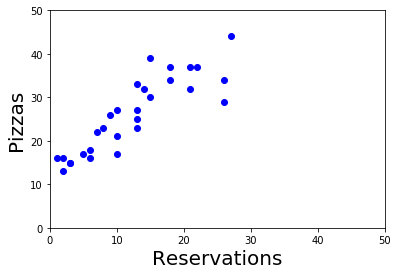

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel("Reservations", fontsize=20)
plt.ylabel("Pizzas", fontsize=20)
plt.axis([0, 50, 0, 50])
plt.plot(X, Y, "bo")
plt.show()

# Two Phases: Training and Prediction

## Prediction Phase

We will be using a line model represented by the equation:

y = w * x + b

w is the weight (determines the slope)

b is the bias (determines the y-intercept)

Note that prediction is similar to inference. See here: https://stats.stackexchange.com/questions/244017/what-is-the-difference-between-prediction-and-inference

First, we will assume values for weight and bias

In [5]:
def predict(X, w, b):
    return X * w + b

In [6]:
predict(14, 1.2, 12)

28.8

Example of broadcasting (a feature of numpy)

In [7]:
reservations = np.array([14, 5, 7])
predict(reservations, 1.2, 12)

array([28.8, 18. , 20.4])

## Training Phase

The training phase will help us find the parameters w and b.
We need to find the line with the lowest error (or loss).

The loss is equivalent to the mean squared error. This is calculated by:
* Subtract the actual values from the predictions
* Square them (similar to taking absolute values, because we don't care about negative values)
* Take the average of these values

In [8]:
def mean_squared_error(X, Y, w, b):
    predictions = predict(X, w, b)
    return np.average((predictions - Y) ** 2)

Let's rename this function

In [9]:
def loss(X, Y, w, b):
    predictions = predict(X, w, b)
    return np.average((predictions - Y) ** 2)

So if we provide a model to this function (w and b values, that represent a line), plus the examples, and returns the loss. We want to find the model with the lowest loss.

In [10]:
loss(X,Y, 1.2, 12)

23.778666666666677

### Iterative algorithm for finding loss

We will define a learning rate (value that we use to increment each guess). We will also define 

In [11]:
def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        current_loss = loss(X, Y, w, b)
        print("Iteration %4d => Loss %.6f" % (i, current_loss))
        
        if loss(X, Y, w - lr, b) < current_loss:
            w -= lr
        elif loss(X, Y, w + lr, b) < current_loss:
            w += lr
        elif loss(X, Y, w, b - lr) < current_loss:
            b -= lr
        elif loss(X, Y, w, b + lr) < current_loss:
            b += lr
        else:
            return w, b
        
    raise Exception("Couldn't find a result within %d iterations" % iterations)

### Running the training code

In [12]:
w, b = train(X, Y, 5000, .01)

Iteration    0 => Loss 812.866667
Iteration    1 => Loss 804.820547
Iteration    2 => Loss 796.818187
Iteration    3 => Loss 788.859587
Iteration    4 => Loss 780.944747
Iteration    5 => Loss 773.073667
Iteration    6 => Loss 765.246347
Iteration    7 => Loss 757.462787
Iteration    8 => Loss 749.722987
Iteration    9 => Loss 742.026947
Iteration   10 => Loss 734.374667
Iteration   11 => Loss 726.766147
Iteration   12 => Loss 719.201387
Iteration   13 => Loss 711.680387
Iteration   14 => Loss 704.203147
Iteration   15 => Loss 696.769667
Iteration   16 => Loss 689.379947
Iteration   17 => Loss 682.033987
Iteration   18 => Loss 674.731787
Iteration   19 => Loss 667.473347
Iteration   20 => Loss 660.258667
Iteration   21 => Loss 653.087747
Iteration   22 => Loss 645.960587
Iteration   23 => Loss 638.877187
Iteration   24 => Loss 631.837547
Iteration   25 => Loss 624.841667
Iteration   26 => Loss 617.889547
Iteration   27 => Loss 610.981187
Iteration   28 => Loss 604.116587
Iteration   29

Iteration 1413 => Loss 23.485853
Iteration 1414 => Loss 23.477420
Iteration 1415 => Loss 23.469187
Iteration 1416 => Loss 23.461153
Iteration 1417 => Loss 23.453320
Iteration 1418 => Loss 23.445687
Iteration 1419 => Loss 23.438253
Iteration 1420 => Loss 23.431020
Iteration 1421 => Loss 23.423987
Iteration 1422 => Loss 23.417153
Iteration 1423 => Loss 23.410520
Iteration 1424 => Loss 23.404087
Iteration 1425 => Loss 23.402447
Iteration 1426 => Loss 23.393680
Iteration 1427 => Loss 23.385113
Iteration 1428 => Loss 23.376747
Iteration 1429 => Loss 23.368580
Iteration 1430 => Loss 23.360613
Iteration 1431 => Loss 23.352847
Iteration 1432 => Loss 23.345280
Iteration 1433 => Loss 23.337913
Iteration 1434 => Loss 23.330747
Iteration 1435 => Loss 23.323780
Iteration 1436 => Loss 23.317013
Iteration 1437 => Loss 23.310447
Iteration 1438 => Loss 23.304080
Iteration 1439 => Loss 23.297913
Iteration 1440 => Loss 23.291947
Iteration 1441 => Loss 23.286180
Iteration 1442 => Loss 23.280613
Iteration 

In [13]:
w

1.1000000000000008

In [14]:
b

12.929999999999769

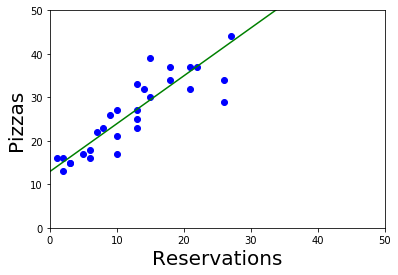

In [15]:
plt.xlabel("Reservations", fontsize=20)
plt.ylabel("Pizzas", fontsize=20)
plt.axis([0, 50, 0, 50])
plt.plot(X, Y, "bo")
plt.plot([0, 50], [b, predict(50, w, b)], color="g")
plt.show()

## Using the Prediction Model

In [16]:
reservations = 42
predict(reservations, w, b)

59.1299999999998

# Improving the Algorithm with Gradient Descent

Formula for the loss and loss gradients

<img src="loss-and-gradients.png" alt="Loss and Gradients" style="width: 500px;"/>

In [17]:
def gradient(X, Y, w, b):
    w_gradient = np.average(2 * X * (predict(X, w, b) - Y))
    b_gradient = np.average(2 * (predict(X, w, b) - Y))
    return (w_gradient, b_gradient)

Gradient of the loss at point 2, 3

In [18]:
gradient(X, Y, 2, 3)

(144.4, 2.933333333333333)

We will now modify our old train function to use gradient descent


In [19]:
def train(X, Y, iterations, lr):
    w = b = 0
    for i in range(iterations):
        print("Iteration %4d => Loss %.6f" % (i, loss(X, Y, w, b)))
        
        w_gradient, b_gradient = gradient(X, Y, w, b)
        w -= w_gradient * lr
        b -= b_gradient * lr
    return (w, b)

In [20]:
w, b = train(X, Y, 10000, 0.001)

Iteration    0 => Loss 812.866667
Iteration    1 => Loss 302.576956
Iteration    2 => Loss 141.984090
Iteration    3 => Loss 91.421377
Iteration    4 => Loss 75.479058
Iteration    5 => Loss 70.429883
Iteration    6 => Loss 68.808210
Iteration    7 => Loss 68.265016
Iteration    8 => Loss 68.061193
Iteration    9 => Loss 67.964188
Iteration   10 => Loss 67.900826
Iteration   11 => Loss 67.848085
Iteration   12 => Loss 67.798721
Iteration   13 => Loss 67.750454
Iteration   14 => Loss 67.702567
Iteration   15 => Loss 67.654834
Iteration   16 => Loss 67.607185
Iteration   17 => Loss 67.559597
Iteration   18 => Loss 67.512062
Iteration   19 => Loss 67.464579
Iteration   20 => Loss 67.417147
Iteration   21 => Loss 67.369765
Iteration   22 => Loss 67.322434
Iteration   23 => Loss 67.275153
Iteration   24 => Loss 67.227922
Iteration   25 => Loss 67.180742
Iteration   26 => Loss 67.133611
Iteration   27 => Loss 67.086531
Iteration   28 => Loss 67.039501
Iteration   29 => Loss 66.992521
Iterati

Iteration 1368 => Loss 33.470848
Iteration 1369 => Loss 33.459550
Iteration 1370 => Loss 33.448265
Iteration 1371 => Loss 33.436991
Iteration 1372 => Loss 33.425730
Iteration 1373 => Loss 33.414480
Iteration 1374 => Loss 33.403243
Iteration 1375 => Loss 33.392017
Iteration 1376 => Loss 33.380803
Iteration 1377 => Loss 33.369602
Iteration 1378 => Loss 33.358412
Iteration 1379 => Loss 33.347234
Iteration 1380 => Loss 33.336068
Iteration 1381 => Loss 33.324914
Iteration 1382 => Loss 33.313771
Iteration 1383 => Loss 33.302641
Iteration 1384 => Loss 33.291522
Iteration 1385 => Loss 33.280415
Iteration 1386 => Loss 33.269320
Iteration 1387 => Loss 33.258237
Iteration 1388 => Loss 33.247166
Iteration 1389 => Loss 33.236106
Iteration 1390 => Loss 33.225058
Iteration 1391 => Loss 33.214022
Iteration 1392 => Loss 33.202997
Iteration 1393 => Loss 33.191985
Iteration 1394 => Loss 33.180984
Iteration 1395 => Loss 33.169994
Iteration 1396 => Loss 33.159017
Iteration 1397 => Loss 33.148051
Iteration 

Iteration 2533 => Loss 25.921332
Iteration 2534 => Loss 25.918060
Iteration 2535 => Loss 25.914791
Iteration 2536 => Loss 25.911525
Iteration 2537 => Loss 25.908263
Iteration 2538 => Loss 25.905005
Iteration 2539 => Loss 25.901750
Iteration 2540 => Loss 25.898498
Iteration 2541 => Loss 25.895250
Iteration 2542 => Loss 25.892005
Iteration 2543 => Loss 25.888764
Iteration 2544 => Loss 25.885526
Iteration 2545 => Loss 25.882291
Iteration 2546 => Loss 25.879060
Iteration 2547 => Loss 25.875833
Iteration 2548 => Loss 25.872609
Iteration 2549 => Loss 25.869388
Iteration 2550 => Loss 25.866171
Iteration 2551 => Loss 25.862957
Iteration 2552 => Loss 25.859747
Iteration 2553 => Loss 25.856540
Iteration 2554 => Loss 25.853336
Iteration 2555 => Loss 25.850136
Iteration 2556 => Loss 25.846939
Iteration 2557 => Loss 25.843746
Iteration 2558 => Loss 25.840556
Iteration 2559 => Loss 25.837369
Iteration 2560 => Loss 25.834186
Iteration 2561 => Loss 25.831006
Iteration 2562 => Loss 25.827829
Iteration 

Iteration 3780 => Loss 23.660023
Iteration 3781 => Loss 23.659154
Iteration 3782 => Loss 23.658286
Iteration 3783 => Loss 23.657419
Iteration 3784 => Loss 23.656553
Iteration 3785 => Loss 23.655688
Iteration 3786 => Loss 23.654824
Iteration 3787 => Loss 23.653961
Iteration 3788 => Loss 23.653099
Iteration 3789 => Loss 23.652237
Iteration 3790 => Loss 23.651377
Iteration 3791 => Loss 23.650517
Iteration 3792 => Loss 23.649659
Iteration 3793 => Loss 23.648801
Iteration 3794 => Loss 23.647944
Iteration 3795 => Loss 23.647088
Iteration 3796 => Loss 23.646233
Iteration 3797 => Loss 23.645379
Iteration 3798 => Loss 23.644526
Iteration 3799 => Loss 23.643673
Iteration 3800 => Loss 23.642822
Iteration 3801 => Loss 23.641972
Iteration 3802 => Loss 23.641122
Iteration 3803 => Loss 23.640273
Iteration 3804 => Loss 23.639426
Iteration 3805 => Loss 23.638579
Iteration 3806 => Loss 23.637733
Iteration 3807 => Loss 23.636888
Iteration 3808 => Loss 23.636044
Iteration 3809 => Loss 23.635200
Iteration 

Iteration 4802 => Loss 23.118363
Iteration 4803 => Loss 23.118070
Iteration 4804 => Loss 23.117778
Iteration 4805 => Loss 23.117485
Iteration 4806 => Loss 23.117193
Iteration 4807 => Loss 23.116902
Iteration 4808 => Loss 23.116610
Iteration 4809 => Loss 23.116319
Iteration 4810 => Loss 23.116028
Iteration 4811 => Loss 23.115738
Iteration 4812 => Loss 23.115448
Iteration 4813 => Loss 23.115158
Iteration 4814 => Loss 23.114868
Iteration 4815 => Loss 23.114579
Iteration 4816 => Loss 23.114290
Iteration 4817 => Loss 23.114001
Iteration 4818 => Loss 23.113713
Iteration 4819 => Loss 23.113425
Iteration 4820 => Loss 23.113137
Iteration 4821 => Loss 23.112850
Iteration 4822 => Loss 23.112562
Iteration 4823 => Loss 23.112276
Iteration 4824 => Loss 23.111989
Iteration 4825 => Loss 23.111703
Iteration 4826 => Loss 23.111417
Iteration 4827 => Loss 23.111131
Iteration 4828 => Loss 23.110846
Iteration 4829 => Loss 23.110561
Iteration 4830 => Loss 23.110276
Iteration 4831 => Loss 23.109992
Iteration 

Iteration 5900 => Loss 22.928473
Iteration 5901 => Loss 22.928382
Iteration 5902 => Loss 22.928291
Iteration 5903 => Loss 22.928200
Iteration 5904 => Loss 22.928109
Iteration 5905 => Loss 22.928018
Iteration 5906 => Loss 22.927928
Iteration 5907 => Loss 22.927837
Iteration 5908 => Loss 22.927747
Iteration 5909 => Loss 22.927656
Iteration 5910 => Loss 22.927566
Iteration 5911 => Loss 22.927476
Iteration 5912 => Loss 22.927386
Iteration 5913 => Loss 22.927296
Iteration 5914 => Loss 22.927206
Iteration 5915 => Loss 22.927116
Iteration 5916 => Loss 22.927026
Iteration 5917 => Loss 22.926937
Iteration 5918 => Loss 22.926847
Iteration 5919 => Loss 22.926758
Iteration 5920 => Loss 22.926669
Iteration 5921 => Loss 22.926579
Iteration 5922 => Loss 22.926490
Iteration 5923 => Loss 22.926401
Iteration 5924 => Loss 22.926312
Iteration 5925 => Loss 22.926223
Iteration 5926 => Loss 22.926135
Iteration 5927 => Loss 22.926046
Iteration 5928 => Loss 22.925957
Iteration 5929 => Loss 22.925869
Iteration 

Iteration 7049 => Loss 22.867998
Iteration 7050 => Loss 22.867971
Iteration 7051 => Loss 22.867944
Iteration 7052 => Loss 22.867917
Iteration 7053 => Loss 22.867891
Iteration 7054 => Loss 22.867864
Iteration 7055 => Loss 22.867837
Iteration 7056 => Loss 22.867810
Iteration 7057 => Loss 22.867784
Iteration 7058 => Loss 22.867757
Iteration 7059 => Loss 22.867731
Iteration 7060 => Loss 22.867704
Iteration 7061 => Loss 22.867677
Iteration 7062 => Loss 22.867651
Iteration 7063 => Loss 22.867624
Iteration 7064 => Loss 22.867598
Iteration 7065 => Loss 22.867572
Iteration 7066 => Loss 22.867545
Iteration 7067 => Loss 22.867519
Iteration 7068 => Loss 22.867492
Iteration 7069 => Loss 22.867466
Iteration 7070 => Loss 22.867440
Iteration 7071 => Loss 22.867414
Iteration 7072 => Loss 22.867387
Iteration 7073 => Loss 22.867361
Iteration 7074 => Loss 22.867335
Iteration 7075 => Loss 22.867309
Iteration 7076 => Loss 22.867283
Iteration 7077 => Loss 22.867257
Iteration 7078 => Loss 22.867231
Iteration 

Iteration 8186 => Loss 22.850275
Iteration 8187 => Loss 22.850267
Iteration 8188 => Loss 22.850259
Iteration 8189 => Loss 22.850251
Iteration 8190 => Loss 22.850243
Iteration 8191 => Loss 22.850235
Iteration 8192 => Loss 22.850227
Iteration 8193 => Loss 22.850219
Iteration 8194 => Loss 22.850211
Iteration 8195 => Loss 22.850203
Iteration 8196 => Loss 22.850195
Iteration 8197 => Loss 22.850187
Iteration 8198 => Loss 22.850180
Iteration 8199 => Loss 22.850172
Iteration 8200 => Loss 22.850164
Iteration 8201 => Loss 22.850156
Iteration 8202 => Loss 22.850148
Iteration 8203 => Loss 22.850140
Iteration 8204 => Loss 22.850132
Iteration 8205 => Loss 22.850124
Iteration 8206 => Loss 22.850117
Iteration 8207 => Loss 22.850109
Iteration 8208 => Loss 22.850101
Iteration 8209 => Loss 22.850093
Iteration 8210 => Loss 22.850085
Iteration 8211 => Loss 22.850077
Iteration 8212 => Loss 22.850070
Iteration 8213 => Loss 22.850062
Iteration 8214 => Loss 22.850054
Iteration 8215 => Loss 22.850046
Iteration 

Iteration 9188 => Loss 22.845334
Iteration 9189 => Loss 22.845331
Iteration 9190 => Loss 22.845328
Iteration 9191 => Loss 22.845325
Iteration 9192 => Loss 22.845323
Iteration 9193 => Loss 22.845320
Iteration 9194 => Loss 22.845317
Iteration 9195 => Loss 22.845314
Iteration 9196 => Loss 22.845312
Iteration 9197 => Loss 22.845309
Iteration 9198 => Loss 22.845306
Iteration 9199 => Loss 22.845303
Iteration 9200 => Loss 22.845301
Iteration 9201 => Loss 22.845298
Iteration 9202 => Loss 22.845295
Iteration 9203 => Loss 22.845293
Iteration 9204 => Loss 22.845290
Iteration 9205 => Loss 22.845287
Iteration 9206 => Loss 22.845284
Iteration 9207 => Loss 22.845282
Iteration 9208 => Loss 22.845279
Iteration 9209 => Loss 22.845276
Iteration 9210 => Loss 22.845274
Iteration 9211 => Loss 22.845271
Iteration 9212 => Loss 22.845268
Iteration 9213 => Loss 22.845266
Iteration 9214 => Loss 22.845263
Iteration 9215 => Loss 22.845260
Iteration 9216 => Loss 22.845258
Iteration 9217 => Loss 22.845255
Iteration 

In [21]:
w

1.0848258524488616

In [22]:
b

13.108507160092502

In [23]:
reservations = 20
predict(reservations, w, b)

34.805024209069735

Note that the loss we got here, is lower than before. This algorithm is more precise and faster than previous.

## Multiple Regression

Here we will be using a model to make predictions based on multiple inputs.

For two inputs, we will be using a plane model represented by the equation:

y = w1 * x1 + w2 * x2 + b

w is the weight (determines the slope of the plane)

b is the bias (determines the y-intercept)

After two inputs, we will be modeling a hyper-plane (cannot be visualized).

The new model will now look like this:

y = w0x0 + w1x1 + w2x2 ...

where x0 = 1 (for the bias)

### Quick Summary of functions
Below, we will be updating each of the following functions for multiple input variable support:

predict

loss

gradient

train


### Moving from Arrays to Matrices

X will not be an array anymore, it will become a matrix with a column for each input variable (plus an additional column full of ones for the bias)

So for three input variables we will have four columns.

The value of w will also have four columns.


<img src="matrix-multiplication.png" alt="Matrix Multiplication" style="width: 500px;"/>

In [24]:
# Before:
# def predict(X, w, b):
#    return X * w + b

# Matrix multiplication will work as long as X is a matrix with each row representing
# all input variables, and w being one column with height equal to X width.
# The result will be one column with height equal to X width.
def predict(X, w):
    return np.matmul(X, w)

In [46]:
x1, x2, x3, y = np.loadtxt("pizza_multiple.txt", skiprows=1, unpack=True)

# If you look at the source file, you can see what each input represents:
# x1: reservations, x2: temperature, x3: tourists
#
# Reshape X into a matrix
X = np.column_stack((x1, x2, x3))
# Add the bias
X = np.column_stack((np.ones(x1.size), x1, x2, x3))
# Reshape y into a one column matrix (-1 for as many rows as necessary, 1 column)
Y = y.reshape(-1, 1)

In [26]:
X

array([[ 1., 13., 33.,  9.],
       [ 1.,  2., 16.,  6.],
       [ 1., 14., 32.,  3.],
       [ 1., 23., 25.,  9.],
       [ 1., 13., 23.,  8.],
       [ 1., 13., 51.,  9.],
       [ 1.,  1., 27.,  7.],
       [ 1., 18., 16.,  2.],
       [ 1.,  7., 34.,  3.],
       [ 1., 10., 22.,  3.],
       [ 1., 26., 17.,  7.],
       [ 1.,  3., 21.,  1.],
       [ 1.,  3., 12.,  4.],
       [ 1., 21., 26.,  2.],
       [ 1., 22., 15.,  4.],
       [ 1.,  2., 21.,  7.],
       [ 1., 27., 18.,  3.],
       [ 1.,  6., 26.,  8.],
       [ 1., 10., 20.,  6.],
       [ 1., 18., 25.,  9.],
       [ 1., 15., 21., 10.],
       [ 1.,  9., 22.,  7.],
       [ 1., 26., 20.,  2.],
       [ 1.,  8., 21.,  1.],
       [ 1., 15., 12.,  7.],
       [ 1., 10., 14.,  9.],
       [ 1., 21., 19.,  4.],
       [ 1.,  5., 20.,  3.],
       [ 1.,  6., 18.,  3.],
       [ 1., 13., 23.,  4.]])

In [27]:
Y

array([[52.],
       [17.],
       [46.],
       [70.],
       [43.],
       [60.],
       [23.],
       [43.],
       [28.],
       [31.],
       [65.],
       [15.],
       [15.],
       [59.],
       [52.],
       [22.],
       [68.],
       [34.],
       [30.],
       [56.],
       [50.],
       [36.],
       [68.],
       [25.],
       [38.],
       [30.],
       [56.],
       [19.],
       [19.],
       [41.]])

We will now reshape w and update the train function.

In [30]:
def train(X, Y, iterations, lr):
    w = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        print("Iteration %4d => Loss %.6f" % (i, loss(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return w

Let's now update loss and gradient functions.

Updating the loss is straight forward; just remove references to b.

The formula for gradient is a bit different. The T in the formula below stands for matrix transposition.

In [31]:
def loss(X, Y, w):
    predictions = predict(X, w)
    return np.average((predictions - Y) ** 2)

<img src="upgrading-gradient.png" alt="Upgrading Gradient" style="width: 500px;"/>

In [32]:
def gradient(X, Y, w):
    return 2 * np.matmul(X.T, (predict(X, w) - Y)) / X.shape[0]

In [35]:
# The iterations and learning rate are called hyperparameters (the parameters of the train function)
# The parameters (w) are the model's parameters
w = train(X, Y, iterations=100000, lr=0.001)

Iteration    0 => Loss 1922.300000
Iteration    1 => Loss 541.165203
Iteration    2 => Loss 194.938497
Iteration    3 => Loss 99.083411
Iteration    4 => Loss 65.899709
Iteration    5 => Loss 49.997123
Iteration    6 => Loss 40.028633
Iteration    7 => Loss 32.876292
Iteration    8 => Loss 27.476756
Iteration    9 => Loss 23.329364
Iteration   10 => Loss 20.124094
Iteration   11 => Loss 17.639999
Iteration   12 => Loss 15.711029
Iteration   13 => Loss 14.210169
Iteration   14 => Loss 13.039725
Iteration   15 => Loss 12.124422
Iteration   16 => Loss 11.406223
Iteration   17 => Loss 10.840375
Iteration   18 => Loss 10.392362
Iteration   19 => Loss 10.035560
Iteration   20 => Loss 9.749433
Iteration   21 => Loss 9.518135
Iteration   22 => Loss 9.329441
Iteration   23 => Loss 9.173913
Iteration   24 => Loss 9.044266
Iteration   25 => Loss 8.934872
Iteration   26 => Loss 8.841385
Iteration   27 => Loss 8.760442
Iteration   28 => Loss 8.689445
Iteration   29 => Loss 8.626380
Iteration   30 =

Iteration 1195 => Loss 6.833067
Iteration 1196 => Loss 6.832727
Iteration 1197 => Loss 6.832388
Iteration 1198 => Loss 6.832048
Iteration 1199 => Loss 6.831709
Iteration 1200 => Loss 6.831370
Iteration 1201 => Loss 6.831031
Iteration 1202 => Loss 6.830692
Iteration 1203 => Loss 6.830353
Iteration 1204 => Loss 6.830014
Iteration 1205 => Loss 6.829676
Iteration 1206 => Loss 6.829337
Iteration 1207 => Loss 6.828998
Iteration 1208 => Loss 6.828660
Iteration 1209 => Loss 6.828322
Iteration 1210 => Loss 6.827983
Iteration 1211 => Loss 6.827645
Iteration 1212 => Loss 6.827307
Iteration 1213 => Loss 6.826969
Iteration 1214 => Loss 6.826631
Iteration 1215 => Loss 6.826293
Iteration 1216 => Loss 6.825956
Iteration 1217 => Loss 6.825618
Iteration 1218 => Loss 6.825281
Iteration 1219 => Loss 6.824943
Iteration 1220 => Loss 6.824606
Iteration 1221 => Loss 6.824269
Iteration 1222 => Loss 6.823932
Iteration 1223 => Loss 6.823595
Iteration 1224 => Loss 6.823258
Iteration 1225 => Loss 6.822921
Iteratio

Iteration 2156 => Loss 6.546279
Iteration 2157 => Loss 6.546018
Iteration 2158 => Loss 6.545758
Iteration 2159 => Loss 6.545497
Iteration 2160 => Loss 6.545237
Iteration 2161 => Loss 6.544976
Iteration 2162 => Loss 6.544716
Iteration 2163 => Loss 6.544456
Iteration 2164 => Loss 6.544196
Iteration 2165 => Loss 6.543936
Iteration 2166 => Loss 6.543676
Iteration 2167 => Loss 6.543416
Iteration 2168 => Loss 6.543156
Iteration 2169 => Loss 6.542896
Iteration 2170 => Loss 6.542636
Iteration 2171 => Loss 6.542376
Iteration 2172 => Loss 6.542117
Iteration 2173 => Loss 6.541857
Iteration 2174 => Loss 6.541598
Iteration 2175 => Loss 6.541338
Iteration 2176 => Loss 6.541079
Iteration 2177 => Loss 6.540820
Iteration 2178 => Loss 6.540561
Iteration 2179 => Loss 6.540301
Iteration 2180 => Loss 6.540042
Iteration 2181 => Loss 6.539783
Iteration 2182 => Loss 6.539525
Iteration 2183 => Loss 6.539266
Iteration 2184 => Loss 6.539007
Iteration 2185 => Loss 6.538748
Iteration 2186 => Loss 6.538490
Iteratio

Iteration 3011 => Loss 6.347633
Iteration 3012 => Loss 6.347427
Iteration 3013 => Loss 6.347221
Iteration 3014 => Loss 6.347015
Iteration 3015 => Loss 6.346809
Iteration 3016 => Loss 6.346603
Iteration 3017 => Loss 6.346397
Iteration 3018 => Loss 6.346192
Iteration 3019 => Loss 6.345986
Iteration 3020 => Loss 6.345780
Iteration 3021 => Loss 6.345575
Iteration 3022 => Loss 6.345369
Iteration 3023 => Loss 6.345164
Iteration 3024 => Loss 6.344959
Iteration 3025 => Loss 6.344753
Iteration 3026 => Loss 6.344548
Iteration 3027 => Loss 6.344343
Iteration 3028 => Loss 6.344138
Iteration 3029 => Loss 6.343933
Iteration 3030 => Loss 6.343727
Iteration 3031 => Loss 6.343522
Iteration 3032 => Loss 6.343318
Iteration 3033 => Loss 6.343113
Iteration 3034 => Loss 6.342908
Iteration 3035 => Loss 6.342703
Iteration 3036 => Loss 6.342498
Iteration 3037 => Loss 6.342294
Iteration 3038 => Loss 6.342089
Iteration 3039 => Loss 6.341885
Iteration 3040 => Loss 6.341680
Iteration 3041 => Loss 6.341476
Iteratio

Iteration 3947 => Loss 6.177565
Iteration 3948 => Loss 6.177406
Iteration 3949 => Loss 6.177247
Iteration 3950 => Loss 6.177087
Iteration 3951 => Loss 6.176928
Iteration 3952 => Loss 6.176769
Iteration 3953 => Loss 6.176610
Iteration 3954 => Loss 6.176451
Iteration 3955 => Loss 6.176292
Iteration 3956 => Loss 6.176133
Iteration 3957 => Loss 6.175974
Iteration 3958 => Loss 6.175815
Iteration 3959 => Loss 6.175657
Iteration 3960 => Loss 6.175498
Iteration 3961 => Loss 6.175339
Iteration 3962 => Loss 6.175180
Iteration 3963 => Loss 6.175022
Iteration 3964 => Loss 6.174863
Iteration 3965 => Loss 6.174705
Iteration 3966 => Loss 6.174546
Iteration 3967 => Loss 6.174388
Iteration 3968 => Loss 6.174229
Iteration 3969 => Loss 6.174071
Iteration 3970 => Loss 6.173913
Iteration 3971 => Loss 6.173754
Iteration 3972 => Loss 6.173596
Iteration 3973 => Loss 6.173438
Iteration 3974 => Loss 6.173280
Iteration 3975 => Loss 6.173122
Iteration 3976 => Loss 6.172963
Iteration 3977 => Loss 6.172805
Iteratio

Iteration 4761 => Loss 6.061377
Iteration 4762 => Loss 6.061250
Iteration 4763 => Loss 6.061123
Iteration 4764 => Loss 6.060995
Iteration 4765 => Loss 6.060868
Iteration 4766 => Loss 6.060741
Iteration 4767 => Loss 6.060614
Iteration 4768 => Loss 6.060487
Iteration 4769 => Loss 6.060359
Iteration 4770 => Loss 6.060232
Iteration 4771 => Loss 6.060105
Iteration 4772 => Loss 6.059978
Iteration 4773 => Loss 6.059851
Iteration 4774 => Loss 6.059725
Iteration 4775 => Loss 6.059598
Iteration 4776 => Loss 6.059471
Iteration 4777 => Loss 6.059344
Iteration 4778 => Loss 6.059217
Iteration 4779 => Loss 6.059090
Iteration 4780 => Loss 6.058964
Iteration 4781 => Loss 6.058837
Iteration 4782 => Loss 6.058710
Iteration 4783 => Loss 6.058584
Iteration 4784 => Loss 6.058457
Iteration 4785 => Loss 6.058331
Iteration 4786 => Loss 6.058204
Iteration 4787 => Loss 6.058078
Iteration 4788 => Loss 6.057951
Iteration 4789 => Loss 6.057825
Iteration 4790 => Loss 6.057699
Iteration 4791 => Loss 6.057572
Iteratio

Iteration 5867 => Loss 5.939930
Iteration 5868 => Loss 5.939836
Iteration 5869 => Loss 5.939742
Iteration 5870 => Loss 5.939648
Iteration 5871 => Loss 5.939554
Iteration 5872 => Loss 5.939461
Iteration 5873 => Loss 5.939367
Iteration 5874 => Loss 5.939273
Iteration 5875 => Loss 5.939179
Iteration 5876 => Loss 5.939086
Iteration 5877 => Loss 5.938992
Iteration 5878 => Loss 5.938898
Iteration 5879 => Loss 5.938805
Iteration 5880 => Loss 5.938711
Iteration 5881 => Loss 5.938617
Iteration 5882 => Loss 5.938524
Iteration 5883 => Loss 5.938430
Iteration 5884 => Loss 5.938337
Iteration 5885 => Loss 5.938243
Iteration 5886 => Loss 5.938150
Iteration 5887 => Loss 5.938056
Iteration 5888 => Loss 5.937963
Iteration 5889 => Loss 5.937869
Iteration 5890 => Loss 5.937776
Iteration 5891 => Loss 5.937683
Iteration 5892 => Loss 5.937589
Iteration 5893 => Loss 5.937496
Iteration 5894 => Loss 5.937403
Iteration 5895 => Loss 5.937310
Iteration 5896 => Loss 5.937216
Iteration 5897 => Loss 5.937123
Iteratio

Iteration 6865 => Loss 5.857934
Iteration 6866 => Loss 5.857863
Iteration 6867 => Loss 5.857791
Iteration 6868 => Loss 5.857720
Iteration 6869 => Loss 5.857649
Iteration 6870 => Loss 5.857577
Iteration 6871 => Loss 5.857506
Iteration 6872 => Loss 5.857435
Iteration 6873 => Loss 5.857364
Iteration 6874 => Loss 5.857292
Iteration 6875 => Loss 5.857221
Iteration 6876 => Loss 5.857150
Iteration 6877 => Loss 5.857079
Iteration 6878 => Loss 5.857008
Iteration 6879 => Loss 5.856937
Iteration 6880 => Loss 5.856865
Iteration 6881 => Loss 5.856794
Iteration 6882 => Loss 5.856723
Iteration 6883 => Loss 5.856652
Iteration 6884 => Loss 5.856581
Iteration 6885 => Loss 5.856510
Iteration 6886 => Loss 5.856439
Iteration 6887 => Loss 5.856368
Iteration 6888 => Loss 5.856297
Iteration 6889 => Loss 5.856226
Iteration 6890 => Loss 5.856155
Iteration 6891 => Loss 5.856084
Iteration 6892 => Loss 5.856014
Iteration 6893 => Loss 5.855943
Iteration 6894 => Loss 5.855872
Iteration 6895 => Loss 5.855801
Iteratio

Iteration 7755 => Loss 5.801569
Iteration 7756 => Loss 5.801513
Iteration 7757 => Loss 5.801457
Iteration 7758 => Loss 5.801401
Iteration 7759 => Loss 5.801345
Iteration 7760 => Loss 5.801289
Iteration 7761 => Loss 5.801234
Iteration 7762 => Loss 5.801178
Iteration 7763 => Loss 5.801122
Iteration 7764 => Loss 5.801066
Iteration 7765 => Loss 5.801011
Iteration 7766 => Loss 5.800955
Iteration 7767 => Loss 5.800899
Iteration 7768 => Loss 5.800843
Iteration 7769 => Loss 5.800788
Iteration 7770 => Loss 5.800732
Iteration 7771 => Loss 5.800676
Iteration 7772 => Loss 5.800621
Iteration 7773 => Loss 5.800565
Iteration 7774 => Loss 5.800510
Iteration 7775 => Loss 5.800454
Iteration 7776 => Loss 5.800398
Iteration 7777 => Loss 5.800343
Iteration 7778 => Loss 5.800287
Iteration 7779 => Loss 5.800232
Iteration 7780 => Loss 5.800176
Iteration 7781 => Loss 5.800121
Iteration 7782 => Loss 5.800065
Iteration 7783 => Loss 5.800010
Iteration 7784 => Loss 5.799954
Iteration 7785 => Loss 5.799899
Iteratio

Iteration 8579 => Loss 5.760356
Iteration 8580 => Loss 5.760312
Iteration 8581 => Loss 5.760267
Iteration 8582 => Loss 5.760223
Iteration 8583 => Loss 5.760178
Iteration 8584 => Loss 5.760134
Iteration 8585 => Loss 5.760089
Iteration 8586 => Loss 5.760045
Iteration 8587 => Loss 5.760000
Iteration 8588 => Loss 5.759956
Iteration 8589 => Loss 5.759911
Iteration 8590 => Loss 5.759867
Iteration 8591 => Loss 5.759823
Iteration 8592 => Loss 5.759778
Iteration 8593 => Loss 5.759734
Iteration 8594 => Loss 5.759689
Iteration 8595 => Loss 5.759645
Iteration 8596 => Loss 5.759601
Iteration 8597 => Loss 5.759556
Iteration 8598 => Loss 5.759512
Iteration 8599 => Loss 5.759468
Iteration 8600 => Loss 5.759423
Iteration 8601 => Loss 5.759379
Iteration 8602 => Loss 5.759335
Iteration 8603 => Loss 5.759290
Iteration 8604 => Loss 5.759246
Iteration 8605 => Loss 5.759202
Iteration 8606 => Loss 5.759158
Iteration 8607 => Loss 5.759113
Iteration 8608 => Loss 5.759069
Iteration 8609 => Loss 5.759025
Iteratio

Iteration 9569 => Loss 5.721737
Iteration 9570 => Loss 5.721703
Iteration 9571 => Loss 5.721669
Iteration 9572 => Loss 5.721635
Iteration 9573 => Loss 5.721601
Iteration 9574 => Loss 5.721567
Iteration 9575 => Loss 5.721533
Iteration 9576 => Loss 5.721500
Iteration 9577 => Loss 5.721466
Iteration 9578 => Loss 5.721432
Iteration 9579 => Loss 5.721398
Iteration 9580 => Loss 5.721364
Iteration 9581 => Loss 5.721330
Iteration 9582 => Loss 5.721296
Iteration 9583 => Loss 5.721263
Iteration 9584 => Loss 5.721229
Iteration 9585 => Loss 5.721195
Iteration 9586 => Loss 5.721161
Iteration 9587 => Loss 5.721127
Iteration 9588 => Loss 5.721094
Iteration 9589 => Loss 5.721060
Iteration 9590 => Loss 5.721026
Iteration 9591 => Loss 5.720992
Iteration 9592 => Loss 5.720959
Iteration 9593 => Loss 5.720925
Iteration 9594 => Loss 5.720891
Iteration 9595 => Loss 5.720858
Iteration 9596 => Loss 5.720824
Iteration 9597 => Loss 5.720790
Iteration 9598 => Loss 5.720757
Iteration 9599 => Loss 5.720723
Iteratio

Iteration 10657 => Loss 5.689824
Iteration 10658 => Loss 5.689798
Iteration 10659 => Loss 5.689773
Iteration 10660 => Loss 5.689748
Iteration 10661 => Loss 5.689723
Iteration 10662 => Loss 5.689698
Iteration 10663 => Loss 5.689673
Iteration 10664 => Loss 5.689648
Iteration 10665 => Loss 5.689622
Iteration 10666 => Loss 5.689597
Iteration 10667 => Loss 5.689572
Iteration 10668 => Loss 5.689547
Iteration 10669 => Loss 5.689522
Iteration 10670 => Loss 5.689497
Iteration 10671 => Loss 5.689472
Iteration 10672 => Loss 5.689447
Iteration 10673 => Loss 5.689422
Iteration 10674 => Loss 5.689397
Iteration 10675 => Loss 5.689372
Iteration 10676 => Loss 5.689347
Iteration 10677 => Loss 5.689322
Iteration 10678 => Loss 5.689297
Iteration 10679 => Loss 5.689272
Iteration 10680 => Loss 5.689247
Iteration 10681 => Loss 5.689222
Iteration 10682 => Loss 5.689197
Iteration 10683 => Loss 5.689172
Iteration 10684 => Loss 5.689147
Iteration 10685 => Loss 5.689122
Iteration 10686 => Loss 5.689097
Iteration 

Iteration 11528 => Loss 5.670335
Iteration 11529 => Loss 5.670315
Iteration 11530 => Loss 5.670295
Iteration 11531 => Loss 5.670276
Iteration 11532 => Loss 5.670256
Iteration 11533 => Loss 5.670236
Iteration 11534 => Loss 5.670216
Iteration 11535 => Loss 5.670196
Iteration 11536 => Loss 5.670177
Iteration 11537 => Loss 5.670157
Iteration 11538 => Loss 5.670137
Iteration 11539 => Loss 5.670117
Iteration 11540 => Loss 5.670098
Iteration 11541 => Loss 5.670078
Iteration 11542 => Loss 5.670058
Iteration 11543 => Loss 5.670039
Iteration 11544 => Loss 5.670019
Iteration 11545 => Loss 5.669999
Iteration 11546 => Loss 5.669979
Iteration 11547 => Loss 5.669960
Iteration 11548 => Loss 5.669940
Iteration 11549 => Loss 5.669920
Iteration 11550 => Loss 5.669901
Iteration 11551 => Loss 5.669881
Iteration 11552 => Loss 5.669861
Iteration 11553 => Loss 5.669842
Iteration 11554 => Loss 5.669822
Iteration 11555 => Loss 5.669802
Iteration 11556 => Loss 5.669783
Iteration 11557 => Loss 5.669763
Iteration 

Iteration 12389 => Loss 5.655154
Iteration 12390 => Loss 5.655138
Iteration 12391 => Loss 5.655123
Iteration 12392 => Loss 5.655107
Iteration 12393 => Loss 5.655092
Iteration 12394 => Loss 5.655076
Iteration 12395 => Loss 5.655060
Iteration 12396 => Loss 5.655045
Iteration 12397 => Loss 5.655029
Iteration 12398 => Loss 5.655014
Iteration 12399 => Loss 5.654998
Iteration 12400 => Loss 5.654982
Iteration 12401 => Loss 5.654967
Iteration 12402 => Loss 5.654951
Iteration 12403 => Loss 5.654936
Iteration 12404 => Loss 5.654920
Iteration 12405 => Loss 5.654905
Iteration 12406 => Loss 5.654889
Iteration 12407 => Loss 5.654873
Iteration 12408 => Loss 5.654858
Iteration 12409 => Loss 5.654842
Iteration 12410 => Loss 5.654827
Iteration 12411 => Loss 5.654811
Iteration 12412 => Loss 5.654796
Iteration 12413 => Loss 5.654780
Iteration 12414 => Loss 5.654765
Iteration 12415 => Loss 5.654749
Iteration 12416 => Loss 5.654734
Iteration 12417 => Loss 5.654718
Iteration 12418 => Loss 5.654703
Iteration 

Iteration 13285 => Loss 5.642745
Iteration 13286 => Loss 5.642732
Iteration 13287 => Loss 5.642720
Iteration 13288 => Loss 5.642708
Iteration 13289 => Loss 5.642696
Iteration 13290 => Loss 5.642684
Iteration 13291 => Loss 5.642671
Iteration 13292 => Loss 5.642659
Iteration 13293 => Loss 5.642647
Iteration 13294 => Loss 5.642635
Iteration 13295 => Loss 5.642623
Iteration 13296 => Loss 5.642610
Iteration 13297 => Loss 5.642598
Iteration 13298 => Loss 5.642586
Iteration 13299 => Loss 5.642574
Iteration 13300 => Loss 5.642562
Iteration 13301 => Loss 5.642550
Iteration 13302 => Loss 5.642537
Iteration 13303 => Loss 5.642525
Iteration 13304 => Loss 5.642513
Iteration 13305 => Loss 5.642501
Iteration 13306 => Loss 5.642489
Iteration 13307 => Loss 5.642477
Iteration 13308 => Loss 5.642465
Iteration 13309 => Loss 5.642452
Iteration 13310 => Loss 5.642440
Iteration 13311 => Loss 5.642428
Iteration 13312 => Loss 5.642416
Iteration 13313 => Loss 5.642404
Iteration 13314 => Loss 5.642392
Iteration 

Iteration 14350 => Loss 5.631469
Iteration 14351 => Loss 5.631460
Iteration 14352 => Loss 5.631451
Iteration 14353 => Loss 5.631442
Iteration 14354 => Loss 5.631433
Iteration 14355 => Loss 5.631424
Iteration 14356 => Loss 5.631415
Iteration 14357 => Loss 5.631406
Iteration 14358 => Loss 5.631397
Iteration 14359 => Loss 5.631387
Iteration 14360 => Loss 5.631378
Iteration 14361 => Loss 5.631369
Iteration 14362 => Loss 5.631360
Iteration 14363 => Loss 5.631351
Iteration 14364 => Loss 5.631342
Iteration 14365 => Loss 5.631333
Iteration 14366 => Loss 5.631324
Iteration 14367 => Loss 5.631315
Iteration 14368 => Loss 5.631306
Iteration 14369 => Loss 5.631297
Iteration 14370 => Loss 5.631288
Iteration 14371 => Loss 5.631279
Iteration 14372 => Loss 5.631269
Iteration 14373 => Loss 5.631260
Iteration 14374 => Loss 5.631251
Iteration 14375 => Loss 5.631242
Iteration 14376 => Loss 5.631233
Iteration 14377 => Loss 5.631224
Iteration 14378 => Loss 5.631215
Iteration 14379 => Loss 5.631206
Iteration 

Iteration 15257 => Loss 5.624155
Iteration 15258 => Loss 5.624148
Iteration 15259 => Loss 5.624141
Iteration 15260 => Loss 5.624134
Iteration 15261 => Loss 5.624127
Iteration 15262 => Loss 5.624119
Iteration 15263 => Loss 5.624112
Iteration 15264 => Loss 5.624105
Iteration 15265 => Loss 5.624098
Iteration 15266 => Loss 5.624091
Iteration 15267 => Loss 5.624084
Iteration 15268 => Loss 5.624077
Iteration 15269 => Loss 5.624070
Iteration 15270 => Loss 5.624063
Iteration 15271 => Loss 5.624056
Iteration 15272 => Loss 5.624049
Iteration 15273 => Loss 5.624042
Iteration 15274 => Loss 5.624034
Iteration 15275 => Loss 5.624027
Iteration 15276 => Loss 5.624020
Iteration 15277 => Loss 5.624013
Iteration 15278 => Loss 5.624006
Iteration 15279 => Loss 5.623999
Iteration 15280 => Loss 5.623992
Iteration 15281 => Loss 5.623985
Iteration 15282 => Loss 5.623978
Iteration 15283 => Loss 5.623971
Iteration 15284 => Loss 5.623964
Iteration 15285 => Loss 5.623957
Iteration 15286 => Loss 5.623950
Iteration 

Iteration 16014 => Loss 5.619303
Iteration 16015 => Loss 5.619297
Iteration 16016 => Loss 5.619291
Iteration 16017 => Loss 5.619285
Iteration 16018 => Loss 5.619280
Iteration 16019 => Loss 5.619274
Iteration 16020 => Loss 5.619268
Iteration 16021 => Loss 5.619262
Iteration 16022 => Loss 5.619257
Iteration 16023 => Loss 5.619251
Iteration 16024 => Loss 5.619245
Iteration 16025 => Loss 5.619239
Iteration 16026 => Loss 5.619234
Iteration 16027 => Loss 5.619228
Iteration 16028 => Loss 5.619222
Iteration 16029 => Loss 5.619216
Iteration 16030 => Loss 5.619211
Iteration 16031 => Loss 5.619205
Iteration 16032 => Loss 5.619199
Iteration 16033 => Loss 5.619193
Iteration 16034 => Loss 5.619188
Iteration 16035 => Loss 5.619182
Iteration 16036 => Loss 5.619176
Iteration 16037 => Loss 5.619170
Iteration 16038 => Loss 5.619165
Iteration 16039 => Loss 5.619159
Iteration 16040 => Loss 5.619153
Iteration 16041 => Loss 5.619148
Iteration 16042 => Loss 5.619142
Iteration 16043 => Loss 5.619136
Iteration 

Iteration 17096 => Loss 5.613907
Iteration 17097 => Loss 5.613902
Iteration 17098 => Loss 5.613898
Iteration 17099 => Loss 5.613894
Iteration 17100 => Loss 5.613890
Iteration 17101 => Loss 5.613885
Iteration 17102 => Loss 5.613881
Iteration 17103 => Loss 5.613877
Iteration 17104 => Loss 5.613872
Iteration 17105 => Loss 5.613868
Iteration 17106 => Loss 5.613864
Iteration 17107 => Loss 5.613860
Iteration 17108 => Loss 5.613855
Iteration 17109 => Loss 5.613851
Iteration 17110 => Loss 5.613847
Iteration 17111 => Loss 5.613843
Iteration 17112 => Loss 5.613838
Iteration 17113 => Loss 5.613834
Iteration 17114 => Loss 5.613830
Iteration 17115 => Loss 5.613826
Iteration 17116 => Loss 5.613821
Iteration 17117 => Loss 5.613817
Iteration 17118 => Loss 5.613813
Iteration 17119 => Loss 5.613809
Iteration 17120 => Loss 5.613804
Iteration 17121 => Loss 5.613800
Iteration 17122 => Loss 5.613796
Iteration 17123 => Loss 5.613792
Iteration 17124 => Loss 5.613787
Iteration 17125 => Loss 5.613783
Iteration 

Iteration 18121 => Loss 5.610082
Iteration 18122 => Loss 5.610079
Iteration 18123 => Loss 5.610076
Iteration 18124 => Loss 5.610073
Iteration 18125 => Loss 5.610069
Iteration 18126 => Loss 5.610066
Iteration 18127 => Loss 5.610063
Iteration 18128 => Loss 5.610060
Iteration 18129 => Loss 5.610057
Iteration 18130 => Loss 5.610053
Iteration 18131 => Loss 5.610050
Iteration 18132 => Loss 5.610047
Iteration 18133 => Loss 5.610044
Iteration 18134 => Loss 5.610040
Iteration 18135 => Loss 5.610037
Iteration 18136 => Loss 5.610034
Iteration 18137 => Loss 5.610031
Iteration 18138 => Loss 5.610028
Iteration 18139 => Loss 5.610024
Iteration 18140 => Loss 5.610021
Iteration 18141 => Loss 5.610018
Iteration 18142 => Loss 5.610015
Iteration 18143 => Loss 5.610012
Iteration 18144 => Loss 5.610008
Iteration 18145 => Loss 5.610005
Iteration 18146 => Loss 5.610002
Iteration 18147 => Loss 5.609999
Iteration 18148 => Loss 5.609995
Iteration 18149 => Loss 5.609992
Iteration 18150 => Loss 5.609989
Iteration 

Iteration 19046 => Loss 5.607445
Iteration 19047 => Loss 5.607442
Iteration 19048 => Loss 5.607440
Iteration 19049 => Loss 5.607437
Iteration 19050 => Loss 5.607435
Iteration 19051 => Loss 5.607432
Iteration 19052 => Loss 5.607430
Iteration 19053 => Loss 5.607427
Iteration 19054 => Loss 5.607425
Iteration 19055 => Loss 5.607422
Iteration 19056 => Loss 5.607420
Iteration 19057 => Loss 5.607417
Iteration 19058 => Loss 5.607415
Iteration 19059 => Loss 5.607412
Iteration 19060 => Loss 5.607410
Iteration 19061 => Loss 5.607407
Iteration 19062 => Loss 5.607405
Iteration 19063 => Loss 5.607402
Iteration 19064 => Loss 5.607400
Iteration 19065 => Loss 5.607397
Iteration 19066 => Loss 5.607395
Iteration 19067 => Loss 5.607392
Iteration 19068 => Loss 5.607390
Iteration 19069 => Loss 5.607387
Iteration 19070 => Loss 5.607385
Iteration 19071 => Loss 5.607382
Iteration 19072 => Loss 5.607380
Iteration 19073 => Loss 5.607377
Iteration 19074 => Loss 5.607375
Iteration 19075 => Loss 5.607372
Iteration 

Iteration 19861 => Loss 5.605616
Iteration 19862 => Loss 5.605614
Iteration 19863 => Loss 5.605612
Iteration 19864 => Loss 5.605610
Iteration 19865 => Loss 5.605608
Iteration 19866 => Loss 5.605606
Iteration 19867 => Loss 5.605604
Iteration 19868 => Loss 5.605602
Iteration 19869 => Loss 5.605600
Iteration 19870 => Loss 5.605598
Iteration 19871 => Loss 5.605596
Iteration 19872 => Loss 5.605594
Iteration 19873 => Loss 5.605592
Iteration 19874 => Loss 5.605590
Iteration 19875 => Loss 5.605588
Iteration 19876 => Loss 5.605586
Iteration 19877 => Loss 5.605584
Iteration 19878 => Loss 5.605582
Iteration 19879 => Loss 5.605580
Iteration 19880 => Loss 5.605578
Iteration 19881 => Loss 5.605576
Iteration 19882 => Loss 5.605574
Iteration 19883 => Loss 5.605572
Iteration 19884 => Loss 5.605570
Iteration 19885 => Loss 5.605568
Iteration 19886 => Loss 5.605566
Iteration 19887 => Loss 5.605564
Iteration 19888 => Loss 5.605562
Iteration 19889 => Loss 5.605560
Iteration 19890 => Loss 5.605558
Iteration 

Iteration 20851 => Loss 5.603882
Iteration 20852 => Loss 5.603880
Iteration 20853 => Loss 5.603879
Iteration 20854 => Loss 5.603877
Iteration 20855 => Loss 5.603875
Iteration 20856 => Loss 5.603874
Iteration 20857 => Loss 5.603872
Iteration 20858 => Loss 5.603871
Iteration 20859 => Loss 5.603869
Iteration 20860 => Loss 5.603868
Iteration 20861 => Loss 5.603866
Iteration 20862 => Loss 5.603865
Iteration 20863 => Loss 5.603863
Iteration 20864 => Loss 5.603862
Iteration 20865 => Loss 5.603860
Iteration 20866 => Loss 5.603859
Iteration 20867 => Loss 5.603857
Iteration 20868 => Loss 5.603856
Iteration 20869 => Loss 5.603854
Iteration 20870 => Loss 5.603853
Iteration 20871 => Loss 5.603851
Iteration 20872 => Loss 5.603850
Iteration 20873 => Loss 5.603848
Iteration 20874 => Loss 5.603847
Iteration 20875 => Loss 5.603845
Iteration 20876 => Loss 5.603844
Iteration 20877 => Loss 5.603842
Iteration 20878 => Loss 5.603841
Iteration 20879 => Loss 5.603839
Iteration 20880 => Loss 5.603838
Iteration 

Iteration 21905 => Loss 5.602487
Iteration 21906 => Loss 5.602486
Iteration 21907 => Loss 5.602485
Iteration 21908 => Loss 5.602483
Iteration 21909 => Loss 5.602482
Iteration 21910 => Loss 5.602481
Iteration 21911 => Loss 5.602480
Iteration 21912 => Loss 5.602479
Iteration 21913 => Loss 5.602478
Iteration 21914 => Loss 5.602477
Iteration 21915 => Loss 5.602475
Iteration 21916 => Loss 5.602474
Iteration 21917 => Loss 5.602473
Iteration 21918 => Loss 5.602472
Iteration 21919 => Loss 5.602471
Iteration 21920 => Loss 5.602470
Iteration 21921 => Loss 5.602469
Iteration 21922 => Loss 5.602468
Iteration 21923 => Loss 5.602466
Iteration 21924 => Loss 5.602465
Iteration 21925 => Loss 5.602464
Iteration 21926 => Loss 5.602463
Iteration 21927 => Loss 5.602462
Iteration 21928 => Loss 5.602461
Iteration 21929 => Loss 5.602460
Iteration 21930 => Loss 5.602458
Iteration 21931 => Loss 5.602457
Iteration 21932 => Loss 5.602456
Iteration 21933 => Loss 5.602455
Iteration 21934 => Loss 5.602454
Iteration 

Iteration 22920 => Loss 5.601477
Iteration 22921 => Loss 5.601476
Iteration 22922 => Loss 5.601475
Iteration 22923 => Loss 5.601474
Iteration 22924 => Loss 5.601473
Iteration 22925 => Loss 5.601472
Iteration 22926 => Loss 5.601471
Iteration 22927 => Loss 5.601471
Iteration 22928 => Loss 5.601470
Iteration 22929 => Loss 5.601469
Iteration 22930 => Loss 5.601468
Iteration 22931 => Loss 5.601467
Iteration 22932 => Loss 5.601466
Iteration 22933 => Loss 5.601465
Iteration 22934 => Loss 5.601465
Iteration 22935 => Loss 5.601464
Iteration 22936 => Loss 5.601463
Iteration 22937 => Loss 5.601462
Iteration 22938 => Loss 5.601461
Iteration 22939 => Loss 5.601460
Iteration 22940 => Loss 5.601459
Iteration 22941 => Loss 5.601459
Iteration 22942 => Loss 5.601458
Iteration 22943 => Loss 5.601457
Iteration 22944 => Loss 5.601456
Iteration 22945 => Loss 5.601455
Iteration 22946 => Loss 5.601454
Iteration 22947 => Loss 5.601453
Iteration 22948 => Loss 5.601453
Iteration 22949 => Loss 5.601452
Iteration 

Iteration 23731 => Loss 5.600849
Iteration 23732 => Loss 5.600849
Iteration 23733 => Loss 5.600848
Iteration 23734 => Loss 5.600847
Iteration 23735 => Loss 5.600847
Iteration 23736 => Loss 5.600846
Iteration 23737 => Loss 5.600845
Iteration 23738 => Loss 5.600845
Iteration 23739 => Loss 5.600844
Iteration 23740 => Loss 5.600843
Iteration 23741 => Loss 5.600842
Iteration 23742 => Loss 5.600842
Iteration 23743 => Loss 5.600841
Iteration 23744 => Loss 5.600840
Iteration 23745 => Loss 5.600840
Iteration 23746 => Loss 5.600839
Iteration 23747 => Loss 5.600838
Iteration 23748 => Loss 5.600838
Iteration 23749 => Loss 5.600837
Iteration 23750 => Loss 5.600836
Iteration 23751 => Loss 5.600836
Iteration 23752 => Loss 5.600835
Iteration 23753 => Loss 5.600834
Iteration 23754 => Loss 5.600834
Iteration 23755 => Loss 5.600833
Iteration 23756 => Loss 5.600832
Iteration 23757 => Loss 5.600831
Iteration 23758 => Loss 5.600831
Iteration 23759 => Loss 5.600830
Iteration 23760 => Loss 5.600829
Iteration 

Iteration 24807 => Loss 5.600206
Iteration 24808 => Loss 5.600206
Iteration 24809 => Loss 5.600205
Iteration 24810 => Loss 5.600205
Iteration 24811 => Loss 5.600204
Iteration 24812 => Loss 5.600204
Iteration 24813 => Loss 5.600203
Iteration 24814 => Loss 5.600203
Iteration 24815 => Loss 5.600202
Iteration 24816 => Loss 5.600202
Iteration 24817 => Loss 5.600201
Iteration 24818 => Loss 5.600201
Iteration 24819 => Loss 5.600200
Iteration 24820 => Loss 5.600200
Iteration 24821 => Loss 5.600199
Iteration 24822 => Loss 5.600199
Iteration 24823 => Loss 5.600198
Iteration 24824 => Loss 5.600198
Iteration 24825 => Loss 5.600197
Iteration 24826 => Loss 5.600197
Iteration 24827 => Loss 5.600196
Iteration 24828 => Loss 5.600196
Iteration 24829 => Loss 5.600195
Iteration 24830 => Loss 5.600195
Iteration 24831 => Loss 5.600194
Iteration 24832 => Loss 5.600194
Iteration 24833 => Loss 5.600193
Iteration 24834 => Loss 5.600193
Iteration 24835 => Loss 5.600192
Iteration 24836 => Loss 5.600192
Iteration 

Iteration 25690 => Loss 5.599804
Iteration 25691 => Loss 5.599803
Iteration 25692 => Loss 5.599803
Iteration 25693 => Loss 5.599803
Iteration 25694 => Loss 5.599802
Iteration 25695 => Loss 5.599802
Iteration 25696 => Loss 5.599801
Iteration 25697 => Loss 5.599801
Iteration 25698 => Loss 5.599801
Iteration 25699 => Loss 5.599800
Iteration 25700 => Loss 5.599800
Iteration 25701 => Loss 5.599799
Iteration 25702 => Loss 5.599799
Iteration 25703 => Loss 5.599799
Iteration 25704 => Loss 5.599798
Iteration 25705 => Loss 5.599798
Iteration 25706 => Loss 5.599797
Iteration 25707 => Loss 5.599797
Iteration 25708 => Loss 5.599797
Iteration 25709 => Loss 5.599796
Iteration 25710 => Loss 5.599796
Iteration 25711 => Loss 5.599795
Iteration 25712 => Loss 5.599795
Iteration 25713 => Loss 5.599795
Iteration 25714 => Loss 5.599794
Iteration 25715 => Loss 5.599794
Iteration 25716 => Loss 5.599793
Iteration 25717 => Loss 5.599793
Iteration 25718 => Loss 5.599793
Iteration 25719 => Loss 5.599792
Iteration 

Iteration 26624 => Loss 5.599472
Iteration 26625 => Loss 5.599472
Iteration 26626 => Loss 5.599471
Iteration 26627 => Loss 5.599471
Iteration 26628 => Loss 5.599471
Iteration 26629 => Loss 5.599470
Iteration 26630 => Loss 5.599470
Iteration 26631 => Loss 5.599470
Iteration 26632 => Loss 5.599470
Iteration 26633 => Loss 5.599469
Iteration 26634 => Loss 5.599469
Iteration 26635 => Loss 5.599469
Iteration 26636 => Loss 5.599468
Iteration 26637 => Loss 5.599468
Iteration 26638 => Loss 5.599468
Iteration 26639 => Loss 5.599467
Iteration 26640 => Loss 5.599467
Iteration 26641 => Loss 5.599467
Iteration 26642 => Loss 5.599466
Iteration 26643 => Loss 5.599466
Iteration 26644 => Loss 5.599466
Iteration 26645 => Loss 5.599466
Iteration 26646 => Loss 5.599465
Iteration 26647 => Loss 5.599465
Iteration 26648 => Loss 5.599465
Iteration 26649 => Loss 5.599464
Iteration 26650 => Loss 5.599464
Iteration 26651 => Loss 5.599464
Iteration 26652 => Loss 5.599463
Iteration 26653 => Loss 5.599463
Iteration 

Iteration 27491 => Loss 5.599232
Iteration 27492 => Loss 5.599231
Iteration 27493 => Loss 5.599231
Iteration 27494 => Loss 5.599231
Iteration 27495 => Loss 5.599231
Iteration 27496 => Loss 5.599231
Iteration 27497 => Loss 5.599230
Iteration 27498 => Loss 5.599230
Iteration 27499 => Loss 5.599230
Iteration 27500 => Loss 5.599230
Iteration 27501 => Loss 5.599229
Iteration 27502 => Loss 5.599229
Iteration 27503 => Loss 5.599229
Iteration 27504 => Loss 5.599229
Iteration 27505 => Loss 5.599228
Iteration 27506 => Loss 5.599228
Iteration 27507 => Loss 5.599228
Iteration 27508 => Loss 5.599228
Iteration 27509 => Loss 5.599227
Iteration 27510 => Loss 5.599227
Iteration 27511 => Loss 5.599227
Iteration 27512 => Loss 5.599227
Iteration 27513 => Loss 5.599226
Iteration 27514 => Loss 5.599226
Iteration 27515 => Loss 5.599226
Iteration 27516 => Loss 5.599226
Iteration 27517 => Loss 5.599225
Iteration 27518 => Loss 5.599225
Iteration 27519 => Loss 5.599225
Iteration 27520 => Loss 5.599225
Iteration 

Iteration 28439 => Loss 5.599027
Iteration 28440 => Loss 5.599027
Iteration 28441 => Loss 5.599027
Iteration 28442 => Loss 5.599026
Iteration 28443 => Loss 5.599026
Iteration 28444 => Loss 5.599026
Iteration 28445 => Loss 5.599026
Iteration 28446 => Loss 5.599026
Iteration 28447 => Loss 5.599025
Iteration 28448 => Loss 5.599025
Iteration 28449 => Loss 5.599025
Iteration 28450 => Loss 5.599025
Iteration 28451 => Loss 5.599025
Iteration 28452 => Loss 5.599024
Iteration 28453 => Loss 5.599024
Iteration 28454 => Loss 5.599024
Iteration 28455 => Loss 5.599024
Iteration 28456 => Loss 5.599024
Iteration 28457 => Loss 5.599024
Iteration 28458 => Loss 5.599023
Iteration 28459 => Loss 5.599023
Iteration 28460 => Loss 5.599023
Iteration 28461 => Loss 5.599023
Iteration 28462 => Loss 5.599023
Iteration 28463 => Loss 5.599022
Iteration 28464 => Loss 5.599022
Iteration 28465 => Loss 5.599022
Iteration 28466 => Loss 5.599022
Iteration 28467 => Loss 5.599022
Iteration 28468 => Loss 5.599021
Iteration 

Iteration 29551 => Loss 5.598846
Iteration 29552 => Loss 5.598846
Iteration 29553 => Loss 5.598845
Iteration 29554 => Loss 5.598845
Iteration 29555 => Loss 5.598845
Iteration 29556 => Loss 5.598845
Iteration 29557 => Loss 5.598845
Iteration 29558 => Loss 5.598845
Iteration 29559 => Loss 5.598845
Iteration 29560 => Loss 5.598844
Iteration 29561 => Loss 5.598844
Iteration 29562 => Loss 5.598844
Iteration 29563 => Loss 5.598844
Iteration 29564 => Loss 5.598844
Iteration 29565 => Loss 5.598844
Iteration 29566 => Loss 5.598844
Iteration 29567 => Loss 5.598844
Iteration 29568 => Loss 5.598843
Iteration 29569 => Loss 5.598843
Iteration 29570 => Loss 5.598843
Iteration 29571 => Loss 5.598843
Iteration 29572 => Loss 5.598843
Iteration 29573 => Loss 5.598843
Iteration 29574 => Loss 5.598843
Iteration 29575 => Loss 5.598842
Iteration 29576 => Loss 5.598842
Iteration 29577 => Loss 5.598842
Iteration 29578 => Loss 5.598842
Iteration 29579 => Loss 5.598842
Iteration 29580 => Loss 5.598842
Iteration 

Iteration 30420 => Loss 5.598738
Iteration 30421 => Loss 5.598738
Iteration 30422 => Loss 5.598738
Iteration 30423 => Loss 5.598738
Iteration 30424 => Loss 5.598738
Iteration 30425 => Loss 5.598738
Iteration 30426 => Loss 5.598737
Iteration 30427 => Loss 5.598737
Iteration 30428 => Loss 5.598737
Iteration 30429 => Loss 5.598737
Iteration 30430 => Loss 5.598737
Iteration 30431 => Loss 5.598737
Iteration 30432 => Loss 5.598737
Iteration 30433 => Loss 5.598737
Iteration 30434 => Loss 5.598737
Iteration 30435 => Loss 5.598736
Iteration 30436 => Loss 5.598736
Iteration 30437 => Loss 5.598736
Iteration 30438 => Loss 5.598736
Iteration 30439 => Loss 5.598736
Iteration 30440 => Loss 5.598736
Iteration 30441 => Loss 5.598736
Iteration 30442 => Loss 5.598736
Iteration 30443 => Loss 5.598736
Iteration 30444 => Loss 5.598735
Iteration 30445 => Loss 5.598735
Iteration 30446 => Loss 5.598735
Iteration 30447 => Loss 5.598735
Iteration 30448 => Loss 5.598735
Iteration 30449 => Loss 5.598735
Iteration 

Iteration 31262 => Loss 5.598656
Iteration 31263 => Loss 5.598656
Iteration 31264 => Loss 5.598655
Iteration 31265 => Loss 5.598655
Iteration 31266 => Loss 5.598655
Iteration 31267 => Loss 5.598655
Iteration 31268 => Loss 5.598655
Iteration 31269 => Loss 5.598655
Iteration 31270 => Loss 5.598655
Iteration 31271 => Loss 5.598655
Iteration 31272 => Loss 5.598655
Iteration 31273 => Loss 5.598655
Iteration 31274 => Loss 5.598655
Iteration 31275 => Loss 5.598655
Iteration 31276 => Loss 5.598654
Iteration 31277 => Loss 5.598654
Iteration 31278 => Loss 5.598654
Iteration 31279 => Loss 5.598654
Iteration 31280 => Loss 5.598654
Iteration 31281 => Loss 5.598654
Iteration 31282 => Loss 5.598654
Iteration 31283 => Loss 5.598654
Iteration 31284 => Loss 5.598654
Iteration 31285 => Loss 5.598654
Iteration 31286 => Loss 5.598654
Iteration 31287 => Loss 5.598653
Iteration 31288 => Loss 5.598653
Iteration 31289 => Loss 5.598653
Iteration 31290 => Loss 5.598653
Iteration 31291 => Loss 5.598653
Iteration 

Iteration 32175 => Loss 5.598585
Iteration 32176 => Loss 5.598585
Iteration 32177 => Loss 5.598585
Iteration 32178 => Loss 5.598585
Iteration 32179 => Loss 5.598585
Iteration 32180 => Loss 5.598585
Iteration 32181 => Loss 5.598585
Iteration 32182 => Loss 5.598585
Iteration 32183 => Loss 5.598585
Iteration 32184 => Loss 5.598585
Iteration 32185 => Loss 5.598585
Iteration 32186 => Loss 5.598585
Iteration 32187 => Loss 5.598585
Iteration 32188 => Loss 5.598585
Iteration 32189 => Loss 5.598584
Iteration 32190 => Loss 5.598584
Iteration 32191 => Loss 5.598584
Iteration 32192 => Loss 5.598584
Iteration 32193 => Loss 5.598584
Iteration 32194 => Loss 5.598584
Iteration 32195 => Loss 5.598584
Iteration 32196 => Loss 5.598584
Iteration 32197 => Loss 5.598584
Iteration 32198 => Loss 5.598584
Iteration 32199 => Loss 5.598584
Iteration 32200 => Loss 5.598584
Iteration 32201 => Loss 5.598584
Iteration 32202 => Loss 5.598584
Iteration 32203 => Loss 5.598584
Iteration 32204 => Loss 5.598583
Iteration 

Iteration 33279 => Loss 5.598521
Iteration 33280 => Loss 5.598521
Iteration 33281 => Loss 5.598521
Iteration 33282 => Loss 5.598521
Iteration 33283 => Loss 5.598521
Iteration 33284 => Loss 5.598521
Iteration 33285 => Loss 5.598521
Iteration 33286 => Loss 5.598521
Iteration 33287 => Loss 5.598521
Iteration 33288 => Loss 5.598521
Iteration 33289 => Loss 5.598520
Iteration 33290 => Loss 5.598520
Iteration 33291 => Loss 5.598520
Iteration 33292 => Loss 5.598520
Iteration 33293 => Loss 5.598520
Iteration 33294 => Loss 5.598520
Iteration 33295 => Loss 5.598520
Iteration 33296 => Loss 5.598520
Iteration 33297 => Loss 5.598520
Iteration 33298 => Loss 5.598520
Iteration 33299 => Loss 5.598520
Iteration 33300 => Loss 5.598520
Iteration 33301 => Loss 5.598520
Iteration 33302 => Loss 5.598520
Iteration 33303 => Loss 5.598520
Iteration 33304 => Loss 5.598520
Iteration 33305 => Loss 5.598520
Iteration 33306 => Loss 5.598520
Iteration 33307 => Loss 5.598520
Iteration 33308 => Loss 5.598520
Iteration 

Iteration 34207 => Loss 5.598480
Iteration 34208 => Loss 5.598480
Iteration 34209 => Loss 5.598480
Iteration 34210 => Loss 5.598480
Iteration 34211 => Loss 5.598480
Iteration 34212 => Loss 5.598480
Iteration 34213 => Loss 5.598480
Iteration 34214 => Loss 5.598480
Iteration 34215 => Loss 5.598480
Iteration 34216 => Loss 5.598480
Iteration 34217 => Loss 5.598480
Iteration 34218 => Loss 5.598480
Iteration 34219 => Loss 5.598480
Iteration 34220 => Loss 5.598480
Iteration 34221 => Loss 5.598480
Iteration 34222 => Loss 5.598479
Iteration 34223 => Loss 5.598479
Iteration 34224 => Loss 5.598479
Iteration 34225 => Loss 5.598479
Iteration 34226 => Loss 5.598479
Iteration 34227 => Loss 5.598479
Iteration 34228 => Loss 5.598479
Iteration 34229 => Loss 5.598479
Iteration 34230 => Loss 5.598479
Iteration 34231 => Loss 5.598479
Iteration 34232 => Loss 5.598479
Iteration 34233 => Loss 5.598479
Iteration 34234 => Loss 5.598479
Iteration 34235 => Loss 5.598479
Iteration 34236 => Loss 5.598479
Iteration 

Iteration 34931 => Loss 5.598455
Iteration 34932 => Loss 5.598455
Iteration 34933 => Loss 5.598455
Iteration 34934 => Loss 5.598455
Iteration 34935 => Loss 5.598455
Iteration 34936 => Loss 5.598455
Iteration 34937 => Loss 5.598454
Iteration 34938 => Loss 5.598454
Iteration 34939 => Loss 5.598454
Iteration 34940 => Loss 5.598454
Iteration 34941 => Loss 5.598454
Iteration 34942 => Loss 5.598454
Iteration 34943 => Loss 5.598454
Iteration 34944 => Loss 5.598454
Iteration 34945 => Loss 5.598454
Iteration 34946 => Loss 5.598454
Iteration 34947 => Loss 5.598454
Iteration 34948 => Loss 5.598454
Iteration 34949 => Loss 5.598454
Iteration 34950 => Loss 5.598454
Iteration 34951 => Loss 5.598454
Iteration 34952 => Loss 5.598454
Iteration 34953 => Loss 5.598454
Iteration 34954 => Loss 5.598454
Iteration 34955 => Loss 5.598454
Iteration 34956 => Loss 5.598454
Iteration 34957 => Loss 5.598454
Iteration 34958 => Loss 5.598454
Iteration 34959 => Loss 5.598454
Iteration 34960 => Loss 5.598454
Iteration 

Iteration 36129 => Loss 5.598422
Iteration 36130 => Loss 5.598422
Iteration 36131 => Loss 5.598422
Iteration 36132 => Loss 5.598422
Iteration 36133 => Loss 5.598422
Iteration 36134 => Loss 5.598422
Iteration 36135 => Loss 5.598422
Iteration 36136 => Loss 5.598422
Iteration 36137 => Loss 5.598422
Iteration 36138 => Loss 5.598422
Iteration 36139 => Loss 5.598422
Iteration 36140 => Loss 5.598422
Iteration 36141 => Loss 5.598422
Iteration 36142 => Loss 5.598422
Iteration 36143 => Loss 5.598422
Iteration 36144 => Loss 5.598422
Iteration 36145 => Loss 5.598422
Iteration 36146 => Loss 5.598422
Iteration 36147 => Loss 5.598422
Iteration 36148 => Loss 5.598422
Iteration 36149 => Loss 5.598422
Iteration 36150 => Loss 5.598422
Iteration 36151 => Loss 5.598422
Iteration 36152 => Loss 5.598422
Iteration 36153 => Loss 5.598422
Iteration 36154 => Loss 5.598422
Iteration 36155 => Loss 5.598422
Iteration 36156 => Loss 5.598422
Iteration 36157 => Loss 5.598422
Iteration 36158 => Loss 5.598422
Iteration 

Iteration 37159 => Loss 5.598402
Iteration 37160 => Loss 5.598402
Iteration 37161 => Loss 5.598402
Iteration 37162 => Loss 5.598402
Iteration 37163 => Loss 5.598402
Iteration 37164 => Loss 5.598402
Iteration 37165 => Loss 5.598402
Iteration 37166 => Loss 5.598402
Iteration 37167 => Loss 5.598402
Iteration 37168 => Loss 5.598402
Iteration 37169 => Loss 5.598402
Iteration 37170 => Loss 5.598402
Iteration 37171 => Loss 5.598402
Iteration 37172 => Loss 5.598402
Iteration 37173 => Loss 5.598402
Iteration 37174 => Loss 5.598402
Iteration 37175 => Loss 5.598402
Iteration 37176 => Loss 5.598402
Iteration 37177 => Loss 5.598402
Iteration 37178 => Loss 5.598402
Iteration 37179 => Loss 5.598401
Iteration 37180 => Loss 5.598401
Iteration 37181 => Loss 5.598401
Iteration 37182 => Loss 5.598401
Iteration 37183 => Loss 5.598401
Iteration 37184 => Loss 5.598401
Iteration 37185 => Loss 5.598401
Iteration 37186 => Loss 5.598401
Iteration 37187 => Loss 5.598401
Iteration 37188 => Loss 5.598401
Iteration 

Iteration 38026 => Loss 5.598389
Iteration 38027 => Loss 5.598389
Iteration 38028 => Loss 5.598389
Iteration 38029 => Loss 5.598389
Iteration 38030 => Loss 5.598389
Iteration 38031 => Loss 5.598389
Iteration 38032 => Loss 5.598388
Iteration 38033 => Loss 5.598388
Iteration 38034 => Loss 5.598388
Iteration 38035 => Loss 5.598388
Iteration 38036 => Loss 5.598388
Iteration 38037 => Loss 5.598388
Iteration 38038 => Loss 5.598388
Iteration 38039 => Loss 5.598388
Iteration 38040 => Loss 5.598388
Iteration 38041 => Loss 5.598388
Iteration 38042 => Loss 5.598388
Iteration 38043 => Loss 5.598388
Iteration 38044 => Loss 5.598388
Iteration 38045 => Loss 5.598388
Iteration 38046 => Loss 5.598388
Iteration 38047 => Loss 5.598388
Iteration 38048 => Loss 5.598388
Iteration 38049 => Loss 5.598388
Iteration 38050 => Loss 5.598388
Iteration 38051 => Loss 5.598388
Iteration 38052 => Loss 5.598388
Iteration 38053 => Loss 5.598388
Iteration 38054 => Loss 5.598388
Iteration 38055 => Loss 5.598388
Iteration 

Iteration 38714 => Loss 5.598380
Iteration 38715 => Loss 5.598380
Iteration 38716 => Loss 5.598380
Iteration 38717 => Loss 5.598380
Iteration 38718 => Loss 5.598380
Iteration 38719 => Loss 5.598380
Iteration 38720 => Loss 5.598380
Iteration 38721 => Loss 5.598380
Iteration 38722 => Loss 5.598380
Iteration 38723 => Loss 5.598380
Iteration 38724 => Loss 5.598380
Iteration 38725 => Loss 5.598380
Iteration 38726 => Loss 5.598380
Iteration 38727 => Loss 5.598380
Iteration 38728 => Loss 5.598380
Iteration 38729 => Loss 5.598380
Iteration 38730 => Loss 5.598380
Iteration 38731 => Loss 5.598380
Iteration 38732 => Loss 5.598380
Iteration 38733 => Loss 5.598380
Iteration 38734 => Loss 5.598380
Iteration 38735 => Loss 5.598380
Iteration 38736 => Loss 5.598380
Iteration 38737 => Loss 5.598380
Iteration 38738 => Loss 5.598380
Iteration 38739 => Loss 5.598380
Iteration 38740 => Loss 5.598380
Iteration 38741 => Loss 5.598380
Iteration 38742 => Loss 5.598380
Iteration 38743 => Loss 5.598380
Iteration 

Iteration 39689 => Loss 5.598371
Iteration 39690 => Loss 5.598371
Iteration 39691 => Loss 5.598370
Iteration 39692 => Loss 5.598370
Iteration 39693 => Loss 5.598370
Iteration 39694 => Loss 5.598370
Iteration 39695 => Loss 5.598370
Iteration 39696 => Loss 5.598370
Iteration 39697 => Loss 5.598370
Iteration 39698 => Loss 5.598370
Iteration 39699 => Loss 5.598370
Iteration 39700 => Loss 5.598370
Iteration 39701 => Loss 5.598370
Iteration 39702 => Loss 5.598370
Iteration 39703 => Loss 5.598370
Iteration 39704 => Loss 5.598370
Iteration 39705 => Loss 5.598370
Iteration 39706 => Loss 5.598370
Iteration 39707 => Loss 5.598370
Iteration 39708 => Loss 5.598370
Iteration 39709 => Loss 5.598370
Iteration 39710 => Loss 5.598370
Iteration 39711 => Loss 5.598370
Iteration 39712 => Loss 5.598370
Iteration 39713 => Loss 5.598370
Iteration 39714 => Loss 5.598370
Iteration 39715 => Loss 5.598370
Iteration 39716 => Loss 5.598370
Iteration 39717 => Loss 5.598370
Iteration 39718 => Loss 5.598370
Iteration 

Iteration 40638 => Loss 5.598363
Iteration 40639 => Loss 5.598363
Iteration 40640 => Loss 5.598363
Iteration 40641 => Loss 5.598363
Iteration 40642 => Loss 5.598363
Iteration 40643 => Loss 5.598363
Iteration 40644 => Loss 5.598363
Iteration 40645 => Loss 5.598363
Iteration 40646 => Loss 5.598363
Iteration 40647 => Loss 5.598363
Iteration 40648 => Loss 5.598363
Iteration 40649 => Loss 5.598363
Iteration 40650 => Loss 5.598363
Iteration 40651 => Loss 5.598363
Iteration 40652 => Loss 5.598363
Iteration 40653 => Loss 5.598363
Iteration 40654 => Loss 5.598363
Iteration 40655 => Loss 5.598363
Iteration 40656 => Loss 5.598363
Iteration 40657 => Loss 5.598363
Iteration 40658 => Loss 5.598363
Iteration 40659 => Loss 5.598363
Iteration 40660 => Loss 5.598363
Iteration 40661 => Loss 5.598363
Iteration 40662 => Loss 5.598363
Iteration 40663 => Loss 5.598363
Iteration 40664 => Loss 5.598363
Iteration 40665 => Loss 5.598363
Iteration 40666 => Loss 5.598363
Iteration 40667 => Loss 5.598363
Iteration 

Iteration 41505 => Loss 5.598358
Iteration 41506 => Loss 5.598358
Iteration 41507 => Loss 5.598358
Iteration 41508 => Loss 5.598358
Iteration 41509 => Loss 5.598358
Iteration 41510 => Loss 5.598358
Iteration 41511 => Loss 5.598358
Iteration 41512 => Loss 5.598358
Iteration 41513 => Loss 5.598358
Iteration 41514 => Loss 5.598358
Iteration 41515 => Loss 5.598358
Iteration 41516 => Loss 5.598358
Iteration 41517 => Loss 5.598358
Iteration 41518 => Loss 5.598358
Iteration 41519 => Loss 5.598358
Iteration 41520 => Loss 5.598358
Iteration 41521 => Loss 5.598358
Iteration 41522 => Loss 5.598358
Iteration 41523 => Loss 5.598358
Iteration 41524 => Loss 5.598358
Iteration 41525 => Loss 5.598358
Iteration 41526 => Loss 5.598358
Iteration 41527 => Loss 5.598358
Iteration 41528 => Loss 5.598358
Iteration 41529 => Loss 5.598358
Iteration 41530 => Loss 5.598358
Iteration 41531 => Loss 5.598358
Iteration 41532 => Loss 5.598358
Iteration 41533 => Loss 5.598358
Iteration 41534 => Loss 5.598358
Iteration 

Iteration 42593 => Loss 5.598353
Iteration 42594 => Loss 5.598353
Iteration 42595 => Loss 5.598353
Iteration 42596 => Loss 5.598353
Iteration 42597 => Loss 5.598353
Iteration 42598 => Loss 5.598353
Iteration 42599 => Loss 5.598353
Iteration 42600 => Loss 5.598353
Iteration 42601 => Loss 5.598353
Iteration 42602 => Loss 5.598353
Iteration 42603 => Loss 5.598353
Iteration 42604 => Loss 5.598353
Iteration 42605 => Loss 5.598353
Iteration 42606 => Loss 5.598353
Iteration 42607 => Loss 5.598353
Iteration 42608 => Loss 5.598353
Iteration 42609 => Loss 5.598353
Iteration 42610 => Loss 5.598353
Iteration 42611 => Loss 5.598353
Iteration 42612 => Loss 5.598353
Iteration 42613 => Loss 5.598353
Iteration 42614 => Loss 5.598353
Iteration 42615 => Loss 5.598353
Iteration 42616 => Loss 5.598353
Iteration 42617 => Loss 5.598353
Iteration 42618 => Loss 5.598353
Iteration 42619 => Loss 5.598353
Iteration 42620 => Loss 5.598353
Iteration 42621 => Loss 5.598353
Iteration 42622 => Loss 5.598353
Iteration 

Iteration 43470 => Loss 5.598350
Iteration 43471 => Loss 5.598350
Iteration 43472 => Loss 5.598350
Iteration 43473 => Loss 5.598350
Iteration 43474 => Loss 5.598350
Iteration 43475 => Loss 5.598350
Iteration 43476 => Loss 5.598350
Iteration 43477 => Loss 5.598350
Iteration 43478 => Loss 5.598350
Iteration 43479 => Loss 5.598350
Iteration 43480 => Loss 5.598350
Iteration 43481 => Loss 5.598350
Iteration 43482 => Loss 5.598350
Iteration 43483 => Loss 5.598350
Iteration 43484 => Loss 5.598350
Iteration 43485 => Loss 5.598350
Iteration 43486 => Loss 5.598350
Iteration 43487 => Loss 5.598350
Iteration 43488 => Loss 5.598350
Iteration 43489 => Loss 5.598350
Iteration 43490 => Loss 5.598350
Iteration 43491 => Loss 5.598350
Iteration 43492 => Loss 5.598350
Iteration 43493 => Loss 5.598350
Iteration 43494 => Loss 5.598350
Iteration 43495 => Loss 5.598350
Iteration 43496 => Loss 5.598350
Iteration 43497 => Loss 5.598350
Iteration 43498 => Loss 5.598350
Iteration 43499 => Loss 5.598350
Iteration 

Iteration 44185 => Loss 5.598348
Iteration 44186 => Loss 5.598348
Iteration 44187 => Loss 5.598348
Iteration 44188 => Loss 5.598348
Iteration 44189 => Loss 5.598348
Iteration 44190 => Loss 5.598348
Iteration 44191 => Loss 5.598348
Iteration 44192 => Loss 5.598348
Iteration 44193 => Loss 5.598348
Iteration 44194 => Loss 5.598348
Iteration 44195 => Loss 5.598348
Iteration 44196 => Loss 5.598348
Iteration 44197 => Loss 5.598348
Iteration 44198 => Loss 5.598348
Iteration 44199 => Loss 5.598348
Iteration 44200 => Loss 5.598348
Iteration 44201 => Loss 5.598348
Iteration 44202 => Loss 5.598348
Iteration 44203 => Loss 5.598348
Iteration 44204 => Loss 5.598348
Iteration 44205 => Loss 5.598348
Iteration 44206 => Loss 5.598348
Iteration 44207 => Loss 5.598348
Iteration 44208 => Loss 5.598348
Iteration 44209 => Loss 5.598348
Iteration 44210 => Loss 5.598348
Iteration 44211 => Loss 5.598348
Iteration 44212 => Loss 5.598348
Iteration 44213 => Loss 5.598348
Iteration 44214 => Loss 5.598348
Iteration 

Iteration 45380 => Loss 5.598346
Iteration 45381 => Loss 5.598346
Iteration 45382 => Loss 5.598346
Iteration 45383 => Loss 5.598346
Iteration 45384 => Loss 5.598346
Iteration 45385 => Loss 5.598346
Iteration 45386 => Loss 5.598346
Iteration 45387 => Loss 5.598346
Iteration 45388 => Loss 5.598346
Iteration 45389 => Loss 5.598346
Iteration 45390 => Loss 5.598346
Iteration 45391 => Loss 5.598346
Iteration 45392 => Loss 5.598346
Iteration 45393 => Loss 5.598346
Iteration 45394 => Loss 5.598346
Iteration 45395 => Loss 5.598346
Iteration 45396 => Loss 5.598346
Iteration 45397 => Loss 5.598346
Iteration 45398 => Loss 5.598346
Iteration 45399 => Loss 5.598346
Iteration 45400 => Loss 5.598346
Iteration 45401 => Loss 5.598346
Iteration 45402 => Loss 5.598346
Iteration 45403 => Loss 5.598346
Iteration 45404 => Loss 5.598346
Iteration 45405 => Loss 5.598346
Iteration 45406 => Loss 5.598346
Iteration 45407 => Loss 5.598346
Iteration 45408 => Loss 5.598346
Iteration 45409 => Loss 5.598346
Iteration 

Iteration 46329 => Loss 5.598344
Iteration 46330 => Loss 5.598344
Iteration 46331 => Loss 5.598344
Iteration 46332 => Loss 5.598344
Iteration 46333 => Loss 5.598344
Iteration 46334 => Loss 5.598344
Iteration 46335 => Loss 5.598344
Iteration 46336 => Loss 5.598344
Iteration 46337 => Loss 5.598344
Iteration 46338 => Loss 5.598344
Iteration 46339 => Loss 5.598344
Iteration 46340 => Loss 5.598344
Iteration 46341 => Loss 5.598344
Iteration 46342 => Loss 5.598344
Iteration 46343 => Loss 5.598344
Iteration 46344 => Loss 5.598344
Iteration 46345 => Loss 5.598344
Iteration 46346 => Loss 5.598344
Iteration 46347 => Loss 5.598344
Iteration 46348 => Loss 5.598344
Iteration 46349 => Loss 5.598344
Iteration 46350 => Loss 5.598344
Iteration 46351 => Loss 5.598344
Iteration 46352 => Loss 5.598344
Iteration 46353 => Loss 5.598344
Iteration 46354 => Loss 5.598344
Iteration 46355 => Loss 5.598344
Iteration 46356 => Loss 5.598344
Iteration 46357 => Loss 5.598344
Iteration 46358 => Loss 5.598344
Iteration 

Iteration 47235 => Loss 5.598343
Iteration 47236 => Loss 5.598343
Iteration 47237 => Loss 5.598343
Iteration 47238 => Loss 5.598343
Iteration 47239 => Loss 5.598343
Iteration 47240 => Loss 5.598343
Iteration 47241 => Loss 5.598343
Iteration 47242 => Loss 5.598343
Iteration 47243 => Loss 5.598343
Iteration 47244 => Loss 5.598343
Iteration 47245 => Loss 5.598343
Iteration 47246 => Loss 5.598343
Iteration 47247 => Loss 5.598343
Iteration 47248 => Loss 5.598343
Iteration 47249 => Loss 5.598343
Iteration 47250 => Loss 5.598343
Iteration 47251 => Loss 5.598343
Iteration 47252 => Loss 5.598343
Iteration 47253 => Loss 5.598343
Iteration 47254 => Loss 5.598343
Iteration 47255 => Loss 5.598343
Iteration 47256 => Loss 5.598343
Iteration 47257 => Loss 5.598343
Iteration 47258 => Loss 5.598343
Iteration 47259 => Loss 5.598343
Iteration 47260 => Loss 5.598343
Iteration 47261 => Loss 5.598343
Iteration 47262 => Loss 5.598343
Iteration 47263 => Loss 5.598343
Iteration 47264 => Loss 5.598343
Iteration 

Iteration 47966 => Loss 5.598343
Iteration 47967 => Loss 5.598343
Iteration 47968 => Loss 5.598343
Iteration 47969 => Loss 5.598343
Iteration 47970 => Loss 5.598343
Iteration 47971 => Loss 5.598343
Iteration 47972 => Loss 5.598343
Iteration 47973 => Loss 5.598343
Iteration 47974 => Loss 5.598343
Iteration 47975 => Loss 5.598343
Iteration 47976 => Loss 5.598343
Iteration 47977 => Loss 5.598343
Iteration 47978 => Loss 5.598343
Iteration 47979 => Loss 5.598343
Iteration 47980 => Loss 5.598343
Iteration 47981 => Loss 5.598343
Iteration 47982 => Loss 5.598343
Iteration 47983 => Loss 5.598343
Iteration 47984 => Loss 5.598343
Iteration 47985 => Loss 5.598343
Iteration 47986 => Loss 5.598343
Iteration 47987 => Loss 5.598343
Iteration 47988 => Loss 5.598343
Iteration 47989 => Loss 5.598343
Iteration 47990 => Loss 5.598343
Iteration 47991 => Loss 5.598343
Iteration 47992 => Loss 5.598343
Iteration 47993 => Loss 5.598343
Iteration 47994 => Loss 5.598343
Iteration 47995 => Loss 5.598343
Iteration 

Iteration 49019 => Loss 5.598342
Iteration 49020 => Loss 5.598342
Iteration 49021 => Loss 5.598342
Iteration 49022 => Loss 5.598342
Iteration 49023 => Loss 5.598342
Iteration 49024 => Loss 5.598342
Iteration 49025 => Loss 5.598342
Iteration 49026 => Loss 5.598342
Iteration 49027 => Loss 5.598342
Iteration 49028 => Loss 5.598342
Iteration 49029 => Loss 5.598342
Iteration 49030 => Loss 5.598342
Iteration 49031 => Loss 5.598342
Iteration 49032 => Loss 5.598342
Iteration 49033 => Loss 5.598342
Iteration 49034 => Loss 5.598342
Iteration 49035 => Loss 5.598342
Iteration 49036 => Loss 5.598342
Iteration 49037 => Loss 5.598342
Iteration 49038 => Loss 5.598342
Iteration 49039 => Loss 5.598342
Iteration 49040 => Loss 5.598342
Iteration 49041 => Loss 5.598342
Iteration 49042 => Loss 5.598342
Iteration 49043 => Loss 5.598342
Iteration 49044 => Loss 5.598342
Iteration 49045 => Loss 5.598342
Iteration 49046 => Loss 5.598342
Iteration 49047 => Loss 5.598342
Iteration 49048 => Loss 5.598342
Iteration 

Iteration 50118 => Loss 5.598341
Iteration 50119 => Loss 5.598341
Iteration 50120 => Loss 5.598341
Iteration 50121 => Loss 5.598341
Iteration 50122 => Loss 5.598341
Iteration 50123 => Loss 5.598341
Iteration 50124 => Loss 5.598341
Iteration 50125 => Loss 5.598341
Iteration 50126 => Loss 5.598341
Iteration 50127 => Loss 5.598341
Iteration 50128 => Loss 5.598341
Iteration 50129 => Loss 5.598341
Iteration 50130 => Loss 5.598341
Iteration 50131 => Loss 5.598341
Iteration 50132 => Loss 5.598341
Iteration 50133 => Loss 5.598341
Iteration 50134 => Loss 5.598341
Iteration 50135 => Loss 5.598341
Iteration 50136 => Loss 5.598341
Iteration 50137 => Loss 5.598341
Iteration 50138 => Loss 5.598341
Iteration 50139 => Loss 5.598341
Iteration 50140 => Loss 5.598341
Iteration 50141 => Loss 5.598341
Iteration 50142 => Loss 5.598341
Iteration 50143 => Loss 5.598341
Iteration 50144 => Loss 5.598341
Iteration 50145 => Loss 5.598341
Iteration 50146 => Loss 5.598341
Iteration 50147 => Loss 5.598341
Iteration 

Iteration 50928 => Loss 5.598341
Iteration 50929 => Loss 5.598341
Iteration 50930 => Loss 5.598341
Iteration 50931 => Loss 5.598341
Iteration 50932 => Loss 5.598341
Iteration 50933 => Loss 5.598341
Iteration 50934 => Loss 5.598341
Iteration 50935 => Loss 5.598341
Iteration 50936 => Loss 5.598341
Iteration 50937 => Loss 5.598341
Iteration 50938 => Loss 5.598341
Iteration 50939 => Loss 5.598341
Iteration 50940 => Loss 5.598341
Iteration 50941 => Loss 5.598341
Iteration 50942 => Loss 5.598341
Iteration 50943 => Loss 5.598341
Iteration 50944 => Loss 5.598341
Iteration 50945 => Loss 5.598341
Iteration 50946 => Loss 5.598341
Iteration 50947 => Loss 5.598341
Iteration 50948 => Loss 5.598341
Iteration 50949 => Loss 5.598341
Iteration 50950 => Loss 5.598341
Iteration 50951 => Loss 5.598341
Iteration 50952 => Loss 5.598341
Iteration 50953 => Loss 5.598341
Iteration 50954 => Loss 5.598341
Iteration 50955 => Loss 5.598341
Iteration 50956 => Loss 5.598341
Iteration 50957 => Loss 5.598341
Iteration 

Iteration 51792 => Loss 5.598340
Iteration 51793 => Loss 5.598340
Iteration 51794 => Loss 5.598340
Iteration 51795 => Loss 5.598340
Iteration 51796 => Loss 5.598340
Iteration 51797 => Loss 5.598340
Iteration 51798 => Loss 5.598340
Iteration 51799 => Loss 5.598340
Iteration 51800 => Loss 5.598340
Iteration 51801 => Loss 5.598340
Iteration 51802 => Loss 5.598340
Iteration 51803 => Loss 5.598340
Iteration 51804 => Loss 5.598340
Iteration 51805 => Loss 5.598340
Iteration 51806 => Loss 5.598340
Iteration 51807 => Loss 5.598340
Iteration 51808 => Loss 5.598340
Iteration 51809 => Loss 5.598340
Iteration 51810 => Loss 5.598340
Iteration 51811 => Loss 5.598340
Iteration 51812 => Loss 5.598340
Iteration 51813 => Loss 5.598340
Iteration 51814 => Loss 5.598340
Iteration 51815 => Loss 5.598340
Iteration 51816 => Loss 5.598340
Iteration 51817 => Loss 5.598340
Iteration 51818 => Loss 5.598340
Iteration 51819 => Loss 5.598340
Iteration 51820 => Loss 5.598340
Iteration 51821 => Loss 5.598340
Iteration 

Iteration 52807 => Loss 5.598340
Iteration 52808 => Loss 5.598340
Iteration 52809 => Loss 5.598340
Iteration 52810 => Loss 5.598340
Iteration 52811 => Loss 5.598340
Iteration 52812 => Loss 5.598340
Iteration 52813 => Loss 5.598340
Iteration 52814 => Loss 5.598340
Iteration 52815 => Loss 5.598340
Iteration 52816 => Loss 5.598340
Iteration 52817 => Loss 5.598340
Iteration 52818 => Loss 5.598340
Iteration 52819 => Loss 5.598340
Iteration 52820 => Loss 5.598340
Iteration 52821 => Loss 5.598340
Iteration 52822 => Loss 5.598340
Iteration 52823 => Loss 5.598340
Iteration 52824 => Loss 5.598340
Iteration 52825 => Loss 5.598340
Iteration 52826 => Loss 5.598340
Iteration 52827 => Loss 5.598340
Iteration 52828 => Loss 5.598340
Iteration 52829 => Loss 5.598340
Iteration 52830 => Loss 5.598340
Iteration 52831 => Loss 5.598340
Iteration 52832 => Loss 5.598340
Iteration 52833 => Loss 5.598340
Iteration 52834 => Loss 5.598340
Iteration 52835 => Loss 5.598340
Iteration 52836 => Loss 5.598340
Iteration 

Iteration 53790 => Loss 5.598340
Iteration 53791 => Loss 5.598340
Iteration 53792 => Loss 5.598340
Iteration 53793 => Loss 5.598340
Iteration 53794 => Loss 5.598340
Iteration 53795 => Loss 5.598340
Iteration 53796 => Loss 5.598340
Iteration 53797 => Loss 5.598340
Iteration 53798 => Loss 5.598340
Iteration 53799 => Loss 5.598340
Iteration 53800 => Loss 5.598340
Iteration 53801 => Loss 5.598340
Iteration 53802 => Loss 5.598340
Iteration 53803 => Loss 5.598340
Iteration 53804 => Loss 5.598340
Iteration 53805 => Loss 5.598340
Iteration 53806 => Loss 5.598340
Iteration 53807 => Loss 5.598340
Iteration 53808 => Loss 5.598340
Iteration 53809 => Loss 5.598340
Iteration 53810 => Loss 5.598340
Iteration 53811 => Loss 5.598340
Iteration 53812 => Loss 5.598340
Iteration 53813 => Loss 5.598340
Iteration 53814 => Loss 5.598340
Iteration 53815 => Loss 5.598340
Iteration 53816 => Loss 5.598340
Iteration 53817 => Loss 5.598340
Iteration 53818 => Loss 5.598340
Iteration 53819 => Loss 5.598340
Iteration 

Iteration 54785 => Loss 5.598340
Iteration 54786 => Loss 5.598340
Iteration 54787 => Loss 5.598340
Iteration 54788 => Loss 5.598340
Iteration 54789 => Loss 5.598340
Iteration 54790 => Loss 5.598340
Iteration 54791 => Loss 5.598340
Iteration 54792 => Loss 5.598340
Iteration 54793 => Loss 5.598340
Iteration 54794 => Loss 5.598340
Iteration 54795 => Loss 5.598340
Iteration 54796 => Loss 5.598340
Iteration 54797 => Loss 5.598340
Iteration 54798 => Loss 5.598340
Iteration 54799 => Loss 5.598340
Iteration 54800 => Loss 5.598340
Iteration 54801 => Loss 5.598340
Iteration 54802 => Loss 5.598340
Iteration 54803 => Loss 5.598340
Iteration 54804 => Loss 5.598340
Iteration 54805 => Loss 5.598340
Iteration 54806 => Loss 5.598340
Iteration 54807 => Loss 5.598340
Iteration 54808 => Loss 5.598340
Iteration 54809 => Loss 5.598340
Iteration 54810 => Loss 5.598340
Iteration 54811 => Loss 5.598340
Iteration 54812 => Loss 5.598340
Iteration 54813 => Loss 5.598340
Iteration 54814 => Loss 5.598340
Iteration 

Iteration 55553 => Loss 5.598340
Iteration 55554 => Loss 5.598340
Iteration 55555 => Loss 5.598340
Iteration 55556 => Loss 5.598340
Iteration 55557 => Loss 5.598340
Iteration 55558 => Loss 5.598340
Iteration 55559 => Loss 5.598340
Iteration 55560 => Loss 5.598340
Iteration 55561 => Loss 5.598340
Iteration 55562 => Loss 5.598340
Iteration 55563 => Loss 5.598340
Iteration 55564 => Loss 5.598340
Iteration 55565 => Loss 5.598340
Iteration 55566 => Loss 5.598340
Iteration 55567 => Loss 5.598340
Iteration 55568 => Loss 5.598340
Iteration 55569 => Loss 5.598340
Iteration 55570 => Loss 5.598340
Iteration 55571 => Loss 5.598340
Iteration 55572 => Loss 5.598340
Iteration 55573 => Loss 5.598340
Iteration 55574 => Loss 5.598340
Iteration 55575 => Loss 5.598340
Iteration 55576 => Loss 5.598340
Iteration 55577 => Loss 5.598340
Iteration 55578 => Loss 5.598340
Iteration 55579 => Loss 5.598340
Iteration 55580 => Loss 5.598340
Iteration 55581 => Loss 5.598340
Iteration 55582 => Loss 5.598340
Iteration 

Iteration 56296 => Loss 5.598340
Iteration 56297 => Loss 5.598340
Iteration 56298 => Loss 5.598340
Iteration 56299 => Loss 5.598340
Iteration 56300 => Loss 5.598340
Iteration 56301 => Loss 5.598340
Iteration 56302 => Loss 5.598340
Iteration 56303 => Loss 5.598340
Iteration 56304 => Loss 5.598340
Iteration 56305 => Loss 5.598340
Iteration 56306 => Loss 5.598340
Iteration 56307 => Loss 5.598340
Iteration 56308 => Loss 5.598340
Iteration 56309 => Loss 5.598340
Iteration 56310 => Loss 5.598340
Iteration 56311 => Loss 5.598340
Iteration 56312 => Loss 5.598340
Iteration 56313 => Loss 5.598340
Iteration 56314 => Loss 5.598340
Iteration 56315 => Loss 5.598340
Iteration 56316 => Loss 5.598340
Iteration 56317 => Loss 5.598340
Iteration 56318 => Loss 5.598340
Iteration 56319 => Loss 5.598340
Iteration 56320 => Loss 5.598340
Iteration 56321 => Loss 5.598340
Iteration 56322 => Loss 5.598340
Iteration 56323 => Loss 5.598340
Iteration 56324 => Loss 5.598340
Iteration 56325 => Loss 5.598340
Iteration 

Iteration 57532 => Loss 5.598340
Iteration 57533 => Loss 5.598340
Iteration 57534 => Loss 5.598340
Iteration 57535 => Loss 5.598340
Iteration 57536 => Loss 5.598340
Iteration 57537 => Loss 5.598340
Iteration 57538 => Loss 5.598340
Iteration 57539 => Loss 5.598340
Iteration 57540 => Loss 5.598340
Iteration 57541 => Loss 5.598340
Iteration 57542 => Loss 5.598340
Iteration 57543 => Loss 5.598340
Iteration 57544 => Loss 5.598340
Iteration 57545 => Loss 5.598340
Iteration 57546 => Loss 5.598340
Iteration 57547 => Loss 5.598340
Iteration 57548 => Loss 5.598340
Iteration 57549 => Loss 5.598340
Iteration 57550 => Loss 5.598340
Iteration 57551 => Loss 5.598340
Iteration 57552 => Loss 5.598340
Iteration 57553 => Loss 5.598340
Iteration 57554 => Loss 5.598340
Iteration 57555 => Loss 5.598340
Iteration 57556 => Loss 5.598340
Iteration 57557 => Loss 5.598340
Iteration 57558 => Loss 5.598340
Iteration 57559 => Loss 5.598340
Iteration 57560 => Loss 5.598340
Iteration 57561 => Loss 5.598340
Iteration 

Iteration 58403 => Loss 5.598340
Iteration 58404 => Loss 5.598340
Iteration 58405 => Loss 5.598340
Iteration 58406 => Loss 5.598340
Iteration 58407 => Loss 5.598340
Iteration 58408 => Loss 5.598340
Iteration 58409 => Loss 5.598340
Iteration 58410 => Loss 5.598340
Iteration 58411 => Loss 5.598340
Iteration 58412 => Loss 5.598340
Iteration 58413 => Loss 5.598340
Iteration 58414 => Loss 5.598340
Iteration 58415 => Loss 5.598340
Iteration 58416 => Loss 5.598340
Iteration 58417 => Loss 5.598340
Iteration 58418 => Loss 5.598340
Iteration 58419 => Loss 5.598340
Iteration 58420 => Loss 5.598340
Iteration 58421 => Loss 5.598340
Iteration 58422 => Loss 5.598340
Iteration 58423 => Loss 5.598340
Iteration 58424 => Loss 5.598340
Iteration 58425 => Loss 5.598340
Iteration 58426 => Loss 5.598340
Iteration 58427 => Loss 5.598340
Iteration 58428 => Loss 5.598340
Iteration 58429 => Loss 5.598340
Iteration 58430 => Loss 5.598340
Iteration 58431 => Loss 5.598340
Iteration 58432 => Loss 5.598340
Iteration 

Iteration 59291 => Loss 5.598340
Iteration 59292 => Loss 5.598340
Iteration 59293 => Loss 5.598340
Iteration 59294 => Loss 5.598340
Iteration 59295 => Loss 5.598340
Iteration 59296 => Loss 5.598340
Iteration 59297 => Loss 5.598340
Iteration 59298 => Loss 5.598340
Iteration 59299 => Loss 5.598340
Iteration 59300 => Loss 5.598340
Iteration 59301 => Loss 5.598340
Iteration 59302 => Loss 5.598340
Iteration 59303 => Loss 5.598340
Iteration 59304 => Loss 5.598340
Iteration 59305 => Loss 5.598340
Iteration 59306 => Loss 5.598340
Iteration 59307 => Loss 5.598340
Iteration 59308 => Loss 5.598340
Iteration 59309 => Loss 5.598340
Iteration 59310 => Loss 5.598340
Iteration 59311 => Loss 5.598340
Iteration 59312 => Loss 5.598339
Iteration 59313 => Loss 5.598339
Iteration 59314 => Loss 5.598339
Iteration 59315 => Loss 5.598339
Iteration 59316 => Loss 5.598339
Iteration 59317 => Loss 5.598339
Iteration 59318 => Loss 5.598339
Iteration 59319 => Loss 5.598339
Iteration 59320 => Loss 5.598339
Iteration 

Iteration 60142 => Loss 5.598339
Iteration 60143 => Loss 5.598339
Iteration 60144 => Loss 5.598339
Iteration 60145 => Loss 5.598339
Iteration 60146 => Loss 5.598339
Iteration 60147 => Loss 5.598339
Iteration 60148 => Loss 5.598339
Iteration 60149 => Loss 5.598339
Iteration 60150 => Loss 5.598339
Iteration 60151 => Loss 5.598339
Iteration 60152 => Loss 5.598339
Iteration 60153 => Loss 5.598339
Iteration 60154 => Loss 5.598339
Iteration 60155 => Loss 5.598339
Iteration 60156 => Loss 5.598339
Iteration 60157 => Loss 5.598339
Iteration 60158 => Loss 5.598339
Iteration 60159 => Loss 5.598339
Iteration 60160 => Loss 5.598339
Iteration 60161 => Loss 5.598339
Iteration 60162 => Loss 5.598339
Iteration 60163 => Loss 5.598339
Iteration 60164 => Loss 5.598339
Iteration 60165 => Loss 5.598339
Iteration 60166 => Loss 5.598339
Iteration 60167 => Loss 5.598339
Iteration 60168 => Loss 5.598339
Iteration 60169 => Loss 5.598339
Iteration 60170 => Loss 5.598339
Iteration 60171 => Loss 5.598339
Iteration 

Iteration 61174 => Loss 5.598339
Iteration 61175 => Loss 5.598339
Iteration 61176 => Loss 5.598339
Iteration 61177 => Loss 5.598339
Iteration 61178 => Loss 5.598339
Iteration 61179 => Loss 5.598339
Iteration 61180 => Loss 5.598339
Iteration 61181 => Loss 5.598339
Iteration 61182 => Loss 5.598339
Iteration 61183 => Loss 5.598339
Iteration 61184 => Loss 5.598339
Iteration 61185 => Loss 5.598339
Iteration 61186 => Loss 5.598339
Iteration 61187 => Loss 5.598339
Iteration 61188 => Loss 5.598339
Iteration 61189 => Loss 5.598339
Iteration 61190 => Loss 5.598339
Iteration 61191 => Loss 5.598339
Iteration 61192 => Loss 5.598339
Iteration 61193 => Loss 5.598339
Iteration 61194 => Loss 5.598339
Iteration 61195 => Loss 5.598339
Iteration 61196 => Loss 5.598339
Iteration 61197 => Loss 5.598339
Iteration 61198 => Loss 5.598339
Iteration 61199 => Loss 5.598339
Iteration 61200 => Loss 5.598339
Iteration 61201 => Loss 5.598339
Iteration 61202 => Loss 5.598339
Iteration 61203 => Loss 5.598339
Iteration 

Iteration 62226 => Loss 5.598339
Iteration 62227 => Loss 5.598339
Iteration 62228 => Loss 5.598339
Iteration 62229 => Loss 5.598339
Iteration 62230 => Loss 5.598339
Iteration 62231 => Loss 5.598339
Iteration 62232 => Loss 5.598339
Iteration 62233 => Loss 5.598339
Iteration 62234 => Loss 5.598339
Iteration 62235 => Loss 5.598339
Iteration 62236 => Loss 5.598339
Iteration 62237 => Loss 5.598339
Iteration 62238 => Loss 5.598339
Iteration 62239 => Loss 5.598339
Iteration 62240 => Loss 5.598339
Iteration 62241 => Loss 5.598339
Iteration 62242 => Loss 5.598339
Iteration 62243 => Loss 5.598339
Iteration 62244 => Loss 5.598339
Iteration 62245 => Loss 5.598339
Iteration 62246 => Loss 5.598339
Iteration 62247 => Loss 5.598339
Iteration 62248 => Loss 5.598339
Iteration 62249 => Loss 5.598339
Iteration 62250 => Loss 5.598339
Iteration 62251 => Loss 5.598339
Iteration 62252 => Loss 5.598339
Iteration 62253 => Loss 5.598339
Iteration 62254 => Loss 5.598339
Iteration 62255 => Loss 5.598339
Iteration 

Iteration 63150 => Loss 5.598339
Iteration 63151 => Loss 5.598339
Iteration 63152 => Loss 5.598339
Iteration 63153 => Loss 5.598339
Iteration 63154 => Loss 5.598339
Iteration 63155 => Loss 5.598339
Iteration 63156 => Loss 5.598339
Iteration 63157 => Loss 5.598339
Iteration 63158 => Loss 5.598339
Iteration 63159 => Loss 5.598339
Iteration 63160 => Loss 5.598339
Iteration 63161 => Loss 5.598339
Iteration 63162 => Loss 5.598339
Iteration 63163 => Loss 5.598339
Iteration 63164 => Loss 5.598339
Iteration 63165 => Loss 5.598339
Iteration 63166 => Loss 5.598339
Iteration 63167 => Loss 5.598339
Iteration 63168 => Loss 5.598339
Iteration 63169 => Loss 5.598339
Iteration 63170 => Loss 5.598339
Iteration 63171 => Loss 5.598339
Iteration 63172 => Loss 5.598339
Iteration 63173 => Loss 5.598339
Iteration 63174 => Loss 5.598339
Iteration 63175 => Loss 5.598339
Iteration 63176 => Loss 5.598339
Iteration 63177 => Loss 5.598339
Iteration 63178 => Loss 5.598339
Iteration 63179 => Loss 5.598339
Iteration 

Iteration 63951 => Loss 5.598339
Iteration 63952 => Loss 5.598339
Iteration 63953 => Loss 5.598339
Iteration 63954 => Loss 5.598339
Iteration 63955 => Loss 5.598339
Iteration 63956 => Loss 5.598339
Iteration 63957 => Loss 5.598339
Iteration 63958 => Loss 5.598339
Iteration 63959 => Loss 5.598339
Iteration 63960 => Loss 5.598339
Iteration 63961 => Loss 5.598339
Iteration 63962 => Loss 5.598339
Iteration 63963 => Loss 5.598339
Iteration 63964 => Loss 5.598339
Iteration 63965 => Loss 5.598339
Iteration 63966 => Loss 5.598339
Iteration 63967 => Loss 5.598339
Iteration 63968 => Loss 5.598339
Iteration 63969 => Loss 5.598339
Iteration 63970 => Loss 5.598339
Iteration 63971 => Loss 5.598339
Iteration 63972 => Loss 5.598339
Iteration 63973 => Loss 5.598339
Iteration 63974 => Loss 5.598339
Iteration 63975 => Loss 5.598339
Iteration 63976 => Loss 5.598339
Iteration 63977 => Loss 5.598339
Iteration 63978 => Loss 5.598339
Iteration 63979 => Loss 5.598339
Iteration 63980 => Loss 5.598339
Iteration 

Iteration 65081 => Loss 5.598339
Iteration 65082 => Loss 5.598339
Iteration 65083 => Loss 5.598339
Iteration 65084 => Loss 5.598339
Iteration 65085 => Loss 5.598339
Iteration 65086 => Loss 5.598339
Iteration 65087 => Loss 5.598339
Iteration 65088 => Loss 5.598339
Iteration 65089 => Loss 5.598339
Iteration 65090 => Loss 5.598339
Iteration 65091 => Loss 5.598339
Iteration 65092 => Loss 5.598339
Iteration 65093 => Loss 5.598339
Iteration 65094 => Loss 5.598339
Iteration 65095 => Loss 5.598339
Iteration 65096 => Loss 5.598339
Iteration 65097 => Loss 5.598339
Iteration 65098 => Loss 5.598339
Iteration 65099 => Loss 5.598339
Iteration 65100 => Loss 5.598339
Iteration 65101 => Loss 5.598339
Iteration 65102 => Loss 5.598339
Iteration 65103 => Loss 5.598339
Iteration 65104 => Loss 5.598339
Iteration 65105 => Loss 5.598339
Iteration 65106 => Loss 5.598339
Iteration 65107 => Loss 5.598339
Iteration 65108 => Loss 5.598339
Iteration 65109 => Loss 5.598339
Iteration 65110 => Loss 5.598339
Iteration 

Iteration 65986 => Loss 5.598339
Iteration 65987 => Loss 5.598339
Iteration 65988 => Loss 5.598339
Iteration 65989 => Loss 5.598339
Iteration 65990 => Loss 5.598339
Iteration 65991 => Loss 5.598339
Iteration 65992 => Loss 5.598339
Iteration 65993 => Loss 5.598339
Iteration 65994 => Loss 5.598339
Iteration 65995 => Loss 5.598339
Iteration 65996 => Loss 5.598339
Iteration 65997 => Loss 5.598339
Iteration 65998 => Loss 5.598339
Iteration 65999 => Loss 5.598339
Iteration 66000 => Loss 5.598339
Iteration 66001 => Loss 5.598339
Iteration 66002 => Loss 5.598339
Iteration 66003 => Loss 5.598339
Iteration 66004 => Loss 5.598339
Iteration 66005 => Loss 5.598339
Iteration 66006 => Loss 5.598339
Iteration 66007 => Loss 5.598339
Iteration 66008 => Loss 5.598339
Iteration 66009 => Loss 5.598339
Iteration 66010 => Loss 5.598339
Iteration 66011 => Loss 5.598339
Iteration 66012 => Loss 5.598339
Iteration 66013 => Loss 5.598339
Iteration 66014 => Loss 5.598339
Iteration 66015 => Loss 5.598339
Iteration 

Iteration 66868 => Loss 5.598339
Iteration 66869 => Loss 5.598339
Iteration 66870 => Loss 5.598339
Iteration 66871 => Loss 5.598339
Iteration 66872 => Loss 5.598339
Iteration 66873 => Loss 5.598339
Iteration 66874 => Loss 5.598339
Iteration 66875 => Loss 5.598339
Iteration 66876 => Loss 5.598339
Iteration 66877 => Loss 5.598339
Iteration 66878 => Loss 5.598339
Iteration 66879 => Loss 5.598339
Iteration 66880 => Loss 5.598339
Iteration 66881 => Loss 5.598339
Iteration 66882 => Loss 5.598339
Iteration 66883 => Loss 5.598339
Iteration 66884 => Loss 5.598339
Iteration 66885 => Loss 5.598339
Iteration 66886 => Loss 5.598339
Iteration 66887 => Loss 5.598339
Iteration 66888 => Loss 5.598339
Iteration 66889 => Loss 5.598339
Iteration 66890 => Loss 5.598339
Iteration 66891 => Loss 5.598339
Iteration 66892 => Loss 5.598339
Iteration 66893 => Loss 5.598339
Iteration 66894 => Loss 5.598339
Iteration 66895 => Loss 5.598339
Iteration 66896 => Loss 5.598339
Iteration 66897 => Loss 5.598339
Iteration 

Iteration 67671 => Loss 5.598339
Iteration 67672 => Loss 5.598339
Iteration 67673 => Loss 5.598339
Iteration 67674 => Loss 5.598339
Iteration 67675 => Loss 5.598339
Iteration 67676 => Loss 5.598339
Iteration 67677 => Loss 5.598339
Iteration 67678 => Loss 5.598339
Iteration 67679 => Loss 5.598339
Iteration 67680 => Loss 5.598339
Iteration 67681 => Loss 5.598339
Iteration 67682 => Loss 5.598339
Iteration 67683 => Loss 5.598339
Iteration 67684 => Loss 5.598339
Iteration 67685 => Loss 5.598339
Iteration 67686 => Loss 5.598339
Iteration 67687 => Loss 5.598339
Iteration 67688 => Loss 5.598339
Iteration 67689 => Loss 5.598339
Iteration 67690 => Loss 5.598339
Iteration 67691 => Loss 5.598339
Iteration 67692 => Loss 5.598339
Iteration 67693 => Loss 5.598339
Iteration 67694 => Loss 5.598339
Iteration 67695 => Loss 5.598339
Iteration 67696 => Loss 5.598339
Iteration 67697 => Loss 5.598339
Iteration 67698 => Loss 5.598339
Iteration 67699 => Loss 5.598339
Iteration 67700 => Loss 5.598339
Iteration 

Iteration 68772 => Loss 5.598339
Iteration 68773 => Loss 5.598339
Iteration 68774 => Loss 5.598339
Iteration 68775 => Loss 5.598339
Iteration 68776 => Loss 5.598339
Iteration 68777 => Loss 5.598339
Iteration 68778 => Loss 5.598339
Iteration 68779 => Loss 5.598339
Iteration 68780 => Loss 5.598339
Iteration 68781 => Loss 5.598339
Iteration 68782 => Loss 5.598339
Iteration 68783 => Loss 5.598339
Iteration 68784 => Loss 5.598339
Iteration 68785 => Loss 5.598339
Iteration 68786 => Loss 5.598339
Iteration 68787 => Loss 5.598339
Iteration 68788 => Loss 5.598339
Iteration 68789 => Loss 5.598339
Iteration 68790 => Loss 5.598339
Iteration 68791 => Loss 5.598339
Iteration 68792 => Loss 5.598339
Iteration 68793 => Loss 5.598339
Iteration 68794 => Loss 5.598339
Iteration 68795 => Loss 5.598339
Iteration 68796 => Loss 5.598339
Iteration 68797 => Loss 5.598339
Iteration 68798 => Loss 5.598339
Iteration 68799 => Loss 5.598339
Iteration 68800 => Loss 5.598339
Iteration 68801 => Loss 5.598339
Iteration 

Iteration 69746 => Loss 5.598339
Iteration 69747 => Loss 5.598339
Iteration 69748 => Loss 5.598339
Iteration 69749 => Loss 5.598339
Iteration 69750 => Loss 5.598339
Iteration 69751 => Loss 5.598339
Iteration 69752 => Loss 5.598339
Iteration 69753 => Loss 5.598339
Iteration 69754 => Loss 5.598339
Iteration 69755 => Loss 5.598339
Iteration 69756 => Loss 5.598339
Iteration 69757 => Loss 5.598339
Iteration 69758 => Loss 5.598339
Iteration 69759 => Loss 5.598339
Iteration 69760 => Loss 5.598339
Iteration 69761 => Loss 5.598339
Iteration 69762 => Loss 5.598339
Iteration 69763 => Loss 5.598339
Iteration 69764 => Loss 5.598339
Iteration 69765 => Loss 5.598339
Iteration 69766 => Loss 5.598339
Iteration 69767 => Loss 5.598339
Iteration 69768 => Loss 5.598339
Iteration 69769 => Loss 5.598339
Iteration 69770 => Loss 5.598339
Iteration 69771 => Loss 5.598339
Iteration 69772 => Loss 5.598339
Iteration 69773 => Loss 5.598339
Iteration 69774 => Loss 5.598339
Iteration 69775 => Loss 5.598339
Iteration 

Iteration 70613 => Loss 5.598339
Iteration 70614 => Loss 5.598339
Iteration 70615 => Loss 5.598339
Iteration 70616 => Loss 5.598339
Iteration 70617 => Loss 5.598339
Iteration 70618 => Loss 5.598339
Iteration 70619 => Loss 5.598339
Iteration 70620 => Loss 5.598339
Iteration 70621 => Loss 5.598339
Iteration 70622 => Loss 5.598339
Iteration 70623 => Loss 5.598339
Iteration 70624 => Loss 5.598339
Iteration 70625 => Loss 5.598339
Iteration 70626 => Loss 5.598339
Iteration 70627 => Loss 5.598339
Iteration 70628 => Loss 5.598339
Iteration 70629 => Loss 5.598339
Iteration 70630 => Loss 5.598339
Iteration 70631 => Loss 5.598339
Iteration 70632 => Loss 5.598339
Iteration 70633 => Loss 5.598339
Iteration 70634 => Loss 5.598339
Iteration 70635 => Loss 5.598339
Iteration 70636 => Loss 5.598339
Iteration 70637 => Loss 5.598339
Iteration 70638 => Loss 5.598339
Iteration 70639 => Loss 5.598339
Iteration 70640 => Loss 5.598339
Iteration 70641 => Loss 5.598339
Iteration 70642 => Loss 5.598339
Iteration 

Iteration 71502 => Loss 5.598339
Iteration 71503 => Loss 5.598339
Iteration 71504 => Loss 5.598339
Iteration 71505 => Loss 5.598339
Iteration 71506 => Loss 5.598339
Iteration 71507 => Loss 5.598339
Iteration 71508 => Loss 5.598339
Iteration 71509 => Loss 5.598339
Iteration 71510 => Loss 5.598339
Iteration 71511 => Loss 5.598339
Iteration 71512 => Loss 5.598339
Iteration 71513 => Loss 5.598339
Iteration 71514 => Loss 5.598339
Iteration 71515 => Loss 5.598339
Iteration 71516 => Loss 5.598339
Iteration 71517 => Loss 5.598339
Iteration 71518 => Loss 5.598339
Iteration 71519 => Loss 5.598339
Iteration 71520 => Loss 5.598339
Iteration 71521 => Loss 5.598339
Iteration 71522 => Loss 5.598339
Iteration 71523 => Loss 5.598339
Iteration 71524 => Loss 5.598339
Iteration 71525 => Loss 5.598339
Iteration 71526 => Loss 5.598339
Iteration 71527 => Loss 5.598339
Iteration 71528 => Loss 5.598339
Iteration 71529 => Loss 5.598339
Iteration 71530 => Loss 5.598339
Iteration 71531 => Loss 5.598339
Iteration 

Iteration 72378 => Loss 5.598339
Iteration 72379 => Loss 5.598339
Iteration 72380 => Loss 5.598339
Iteration 72381 => Loss 5.598339
Iteration 72382 => Loss 5.598339
Iteration 72383 => Loss 5.598339
Iteration 72384 => Loss 5.598339
Iteration 72385 => Loss 5.598339
Iteration 72386 => Loss 5.598339
Iteration 72387 => Loss 5.598339
Iteration 72388 => Loss 5.598339
Iteration 72389 => Loss 5.598339
Iteration 72390 => Loss 5.598339
Iteration 72391 => Loss 5.598339
Iteration 72392 => Loss 5.598339
Iteration 72393 => Loss 5.598339
Iteration 72394 => Loss 5.598339
Iteration 72395 => Loss 5.598339
Iteration 72396 => Loss 5.598339
Iteration 72397 => Loss 5.598339
Iteration 72398 => Loss 5.598339
Iteration 72399 => Loss 5.598339
Iteration 72400 => Loss 5.598339
Iteration 72401 => Loss 5.598339
Iteration 72402 => Loss 5.598339
Iteration 72403 => Loss 5.598339
Iteration 72404 => Loss 5.598339
Iteration 72405 => Loss 5.598339
Iteration 72406 => Loss 5.598339
Iteration 72407 => Loss 5.598339
Iteration 

Iteration 73442 => Loss 5.598339
Iteration 73443 => Loss 5.598339
Iteration 73444 => Loss 5.598339
Iteration 73445 => Loss 5.598339
Iteration 73446 => Loss 5.598339
Iteration 73447 => Loss 5.598339
Iteration 73448 => Loss 5.598339
Iteration 73449 => Loss 5.598339
Iteration 73450 => Loss 5.598339
Iteration 73451 => Loss 5.598339
Iteration 73452 => Loss 5.598339
Iteration 73453 => Loss 5.598339
Iteration 73454 => Loss 5.598339
Iteration 73455 => Loss 5.598339
Iteration 73456 => Loss 5.598339
Iteration 73457 => Loss 5.598339
Iteration 73458 => Loss 5.598339
Iteration 73459 => Loss 5.598339
Iteration 73460 => Loss 5.598339
Iteration 73461 => Loss 5.598339
Iteration 73462 => Loss 5.598339
Iteration 73463 => Loss 5.598339
Iteration 73464 => Loss 5.598339
Iteration 73465 => Loss 5.598339
Iteration 73466 => Loss 5.598339
Iteration 73467 => Loss 5.598339
Iteration 73468 => Loss 5.598339
Iteration 73469 => Loss 5.598339
Iteration 73470 => Loss 5.598339
Iteration 73471 => Loss 5.598339
Iteration 

Iteration 74375 => Loss 5.598339
Iteration 74376 => Loss 5.598339
Iteration 74377 => Loss 5.598339
Iteration 74378 => Loss 5.598339
Iteration 74379 => Loss 5.598339
Iteration 74380 => Loss 5.598339
Iteration 74381 => Loss 5.598339
Iteration 74382 => Loss 5.598339
Iteration 74383 => Loss 5.598339
Iteration 74384 => Loss 5.598339
Iteration 74385 => Loss 5.598339
Iteration 74386 => Loss 5.598339
Iteration 74387 => Loss 5.598339
Iteration 74388 => Loss 5.598339
Iteration 74389 => Loss 5.598339
Iteration 74390 => Loss 5.598339
Iteration 74391 => Loss 5.598339
Iteration 74392 => Loss 5.598339
Iteration 74393 => Loss 5.598339
Iteration 74394 => Loss 5.598339
Iteration 74395 => Loss 5.598339
Iteration 74396 => Loss 5.598339
Iteration 74397 => Loss 5.598339
Iteration 74398 => Loss 5.598339
Iteration 74399 => Loss 5.598339
Iteration 74400 => Loss 5.598339
Iteration 74401 => Loss 5.598339
Iteration 74402 => Loss 5.598339
Iteration 74403 => Loss 5.598339
Iteration 74404 => Loss 5.598339
Iteration 

Iteration 75214 => Loss 5.598339
Iteration 75215 => Loss 5.598339
Iteration 75216 => Loss 5.598339
Iteration 75217 => Loss 5.598339
Iteration 75218 => Loss 5.598339
Iteration 75219 => Loss 5.598339
Iteration 75220 => Loss 5.598339
Iteration 75221 => Loss 5.598339
Iteration 75222 => Loss 5.598339
Iteration 75223 => Loss 5.598339
Iteration 75224 => Loss 5.598339
Iteration 75225 => Loss 5.598339
Iteration 75226 => Loss 5.598339
Iteration 75227 => Loss 5.598339
Iteration 75228 => Loss 5.598339
Iteration 75229 => Loss 5.598339
Iteration 75230 => Loss 5.598339
Iteration 75231 => Loss 5.598339
Iteration 75232 => Loss 5.598339
Iteration 75233 => Loss 5.598339
Iteration 75234 => Loss 5.598339
Iteration 75235 => Loss 5.598339
Iteration 75236 => Loss 5.598339
Iteration 75237 => Loss 5.598339
Iteration 75238 => Loss 5.598339
Iteration 75239 => Loss 5.598339
Iteration 75240 => Loss 5.598339
Iteration 75241 => Loss 5.598339
Iteration 75242 => Loss 5.598339
Iteration 75243 => Loss 5.598339
Iteration 

Iteration 76041 => Loss 5.598339
Iteration 76042 => Loss 5.598339
Iteration 76043 => Loss 5.598339
Iteration 76044 => Loss 5.598339
Iteration 76045 => Loss 5.598339
Iteration 76046 => Loss 5.598339
Iteration 76047 => Loss 5.598339
Iteration 76048 => Loss 5.598339
Iteration 76049 => Loss 5.598339
Iteration 76050 => Loss 5.598339
Iteration 76051 => Loss 5.598339
Iteration 76052 => Loss 5.598339
Iteration 76053 => Loss 5.598339
Iteration 76054 => Loss 5.598339
Iteration 76055 => Loss 5.598339
Iteration 76056 => Loss 5.598339
Iteration 76057 => Loss 5.598339
Iteration 76058 => Loss 5.598339
Iteration 76059 => Loss 5.598339
Iteration 76060 => Loss 5.598339
Iteration 76061 => Loss 5.598339
Iteration 76062 => Loss 5.598339
Iteration 76063 => Loss 5.598339
Iteration 76064 => Loss 5.598339
Iteration 76065 => Loss 5.598339
Iteration 76066 => Loss 5.598339
Iteration 76067 => Loss 5.598339
Iteration 76068 => Loss 5.598339
Iteration 76069 => Loss 5.598339
Iteration 76070 => Loss 5.598339
Iteration 

Iteration 77074 => Loss 5.598339
Iteration 77075 => Loss 5.598339
Iteration 77076 => Loss 5.598339
Iteration 77077 => Loss 5.598339
Iteration 77078 => Loss 5.598339
Iteration 77079 => Loss 5.598339
Iteration 77080 => Loss 5.598339
Iteration 77081 => Loss 5.598339
Iteration 77082 => Loss 5.598339
Iteration 77083 => Loss 5.598339
Iteration 77084 => Loss 5.598339
Iteration 77085 => Loss 5.598339
Iteration 77086 => Loss 5.598339
Iteration 77087 => Loss 5.598339
Iteration 77088 => Loss 5.598339
Iteration 77089 => Loss 5.598339
Iteration 77090 => Loss 5.598339
Iteration 77091 => Loss 5.598339
Iteration 77092 => Loss 5.598339
Iteration 77093 => Loss 5.598339
Iteration 77094 => Loss 5.598339
Iteration 77095 => Loss 5.598339
Iteration 77096 => Loss 5.598339
Iteration 77097 => Loss 5.598339
Iteration 77098 => Loss 5.598339
Iteration 77099 => Loss 5.598339
Iteration 77100 => Loss 5.598339
Iteration 77101 => Loss 5.598339
Iteration 77102 => Loss 5.598339
Iteration 77103 => Loss 5.598339
Iteration 

Iteration 78017 => Loss 5.598339
Iteration 78018 => Loss 5.598339
Iteration 78019 => Loss 5.598339
Iteration 78020 => Loss 5.598339
Iteration 78021 => Loss 5.598339
Iteration 78022 => Loss 5.598339
Iteration 78023 => Loss 5.598339
Iteration 78024 => Loss 5.598339
Iteration 78025 => Loss 5.598339
Iteration 78026 => Loss 5.598339
Iteration 78027 => Loss 5.598339
Iteration 78028 => Loss 5.598339
Iteration 78029 => Loss 5.598339
Iteration 78030 => Loss 5.598339
Iteration 78031 => Loss 5.598339
Iteration 78032 => Loss 5.598339
Iteration 78033 => Loss 5.598339
Iteration 78034 => Loss 5.598339
Iteration 78035 => Loss 5.598339
Iteration 78036 => Loss 5.598339
Iteration 78037 => Loss 5.598339
Iteration 78038 => Loss 5.598339
Iteration 78039 => Loss 5.598339
Iteration 78040 => Loss 5.598339
Iteration 78041 => Loss 5.598339
Iteration 78042 => Loss 5.598339
Iteration 78043 => Loss 5.598339
Iteration 78044 => Loss 5.598339
Iteration 78045 => Loss 5.598339
Iteration 78046 => Loss 5.598339
Iteration 

Iteration 78778 => Loss 5.598339
Iteration 78779 => Loss 5.598339
Iteration 78780 => Loss 5.598339
Iteration 78781 => Loss 5.598339
Iteration 78782 => Loss 5.598339
Iteration 78783 => Loss 5.598339
Iteration 78784 => Loss 5.598339
Iteration 78785 => Loss 5.598339
Iteration 78786 => Loss 5.598339
Iteration 78787 => Loss 5.598339
Iteration 78788 => Loss 5.598339
Iteration 78789 => Loss 5.598339
Iteration 78790 => Loss 5.598339
Iteration 78791 => Loss 5.598339
Iteration 78792 => Loss 5.598339
Iteration 78793 => Loss 5.598339
Iteration 78794 => Loss 5.598339
Iteration 78795 => Loss 5.598339
Iteration 78796 => Loss 5.598339
Iteration 78797 => Loss 5.598339
Iteration 78798 => Loss 5.598339
Iteration 78799 => Loss 5.598339
Iteration 78800 => Loss 5.598339
Iteration 78801 => Loss 5.598339
Iteration 78802 => Loss 5.598339
Iteration 78803 => Loss 5.598339
Iteration 78804 => Loss 5.598339
Iteration 78805 => Loss 5.598339
Iteration 78806 => Loss 5.598339
Iteration 78807 => Loss 5.598339
Iteration 

Iteration 79906 => Loss 5.598339
Iteration 79907 => Loss 5.598339
Iteration 79908 => Loss 5.598339
Iteration 79909 => Loss 5.598339
Iteration 79910 => Loss 5.598339
Iteration 79911 => Loss 5.598339
Iteration 79912 => Loss 5.598339
Iteration 79913 => Loss 5.598339
Iteration 79914 => Loss 5.598339
Iteration 79915 => Loss 5.598339
Iteration 79916 => Loss 5.598339
Iteration 79917 => Loss 5.598339
Iteration 79918 => Loss 5.598339
Iteration 79919 => Loss 5.598339
Iteration 79920 => Loss 5.598339
Iteration 79921 => Loss 5.598339
Iteration 79922 => Loss 5.598339
Iteration 79923 => Loss 5.598339
Iteration 79924 => Loss 5.598339
Iteration 79925 => Loss 5.598339
Iteration 79926 => Loss 5.598339
Iteration 79927 => Loss 5.598339
Iteration 79928 => Loss 5.598339
Iteration 79929 => Loss 5.598339
Iteration 79930 => Loss 5.598339
Iteration 79931 => Loss 5.598339
Iteration 79932 => Loss 5.598339
Iteration 79933 => Loss 5.598339
Iteration 79934 => Loss 5.598339
Iteration 79935 => Loss 5.598339
Iteration 

Iteration 80778 => Loss 5.598339
Iteration 80779 => Loss 5.598339
Iteration 80780 => Loss 5.598339
Iteration 80781 => Loss 5.598339
Iteration 80782 => Loss 5.598339
Iteration 80783 => Loss 5.598339
Iteration 80784 => Loss 5.598339
Iteration 80785 => Loss 5.598339
Iteration 80786 => Loss 5.598339
Iteration 80787 => Loss 5.598339
Iteration 80788 => Loss 5.598339
Iteration 80789 => Loss 5.598339
Iteration 80790 => Loss 5.598339
Iteration 80791 => Loss 5.598339
Iteration 80792 => Loss 5.598339
Iteration 80793 => Loss 5.598339
Iteration 80794 => Loss 5.598339
Iteration 80795 => Loss 5.598339
Iteration 80796 => Loss 5.598339
Iteration 80797 => Loss 5.598339
Iteration 80798 => Loss 5.598339
Iteration 80799 => Loss 5.598339
Iteration 80800 => Loss 5.598339
Iteration 80801 => Loss 5.598339
Iteration 80802 => Loss 5.598339
Iteration 80803 => Loss 5.598339
Iteration 80804 => Loss 5.598339
Iteration 80805 => Loss 5.598339
Iteration 80806 => Loss 5.598339
Iteration 80807 => Loss 5.598339
Iteration 

Iteration 81677 => Loss 5.598339
Iteration 81678 => Loss 5.598339
Iteration 81679 => Loss 5.598339
Iteration 81680 => Loss 5.598339
Iteration 81681 => Loss 5.598339
Iteration 81682 => Loss 5.598339
Iteration 81683 => Loss 5.598339
Iteration 81684 => Loss 5.598339
Iteration 81685 => Loss 5.598339
Iteration 81686 => Loss 5.598339
Iteration 81687 => Loss 5.598339
Iteration 81688 => Loss 5.598339
Iteration 81689 => Loss 5.598339
Iteration 81690 => Loss 5.598339
Iteration 81691 => Loss 5.598339
Iteration 81692 => Loss 5.598339
Iteration 81693 => Loss 5.598339
Iteration 81694 => Loss 5.598339
Iteration 81695 => Loss 5.598339
Iteration 81696 => Loss 5.598339
Iteration 81697 => Loss 5.598339
Iteration 81698 => Loss 5.598339
Iteration 81699 => Loss 5.598339
Iteration 81700 => Loss 5.598339
Iteration 81701 => Loss 5.598339
Iteration 81702 => Loss 5.598339
Iteration 81703 => Loss 5.598339
Iteration 81704 => Loss 5.598339
Iteration 81705 => Loss 5.598339
Iteration 81706 => Loss 5.598339
Iteration 

Iteration 82492 => Loss 5.598339
Iteration 82493 => Loss 5.598339
Iteration 82494 => Loss 5.598339
Iteration 82495 => Loss 5.598339
Iteration 82496 => Loss 5.598339
Iteration 82497 => Loss 5.598339
Iteration 82498 => Loss 5.598339
Iteration 82499 => Loss 5.598339
Iteration 82500 => Loss 5.598339
Iteration 82501 => Loss 5.598339
Iteration 82502 => Loss 5.598339
Iteration 82503 => Loss 5.598339
Iteration 82504 => Loss 5.598339
Iteration 82505 => Loss 5.598339
Iteration 82506 => Loss 5.598339
Iteration 82507 => Loss 5.598339
Iteration 82508 => Loss 5.598339
Iteration 82509 => Loss 5.598339
Iteration 82510 => Loss 5.598339
Iteration 82511 => Loss 5.598339
Iteration 82512 => Loss 5.598339
Iteration 82513 => Loss 5.598339
Iteration 82514 => Loss 5.598339
Iteration 82515 => Loss 5.598339
Iteration 82516 => Loss 5.598339
Iteration 82517 => Loss 5.598339
Iteration 82518 => Loss 5.598339
Iteration 82519 => Loss 5.598339
Iteration 82520 => Loss 5.598339
Iteration 82521 => Loss 5.598339
Iteration 

Iteration 83463 => Loss 5.598339
Iteration 83464 => Loss 5.598339
Iteration 83465 => Loss 5.598339
Iteration 83466 => Loss 5.598339
Iteration 83467 => Loss 5.598339
Iteration 83468 => Loss 5.598339
Iteration 83469 => Loss 5.598339
Iteration 83470 => Loss 5.598339
Iteration 83471 => Loss 5.598339
Iteration 83472 => Loss 5.598339
Iteration 83473 => Loss 5.598339
Iteration 83474 => Loss 5.598339
Iteration 83475 => Loss 5.598339
Iteration 83476 => Loss 5.598339
Iteration 83477 => Loss 5.598339
Iteration 83478 => Loss 5.598339
Iteration 83479 => Loss 5.598339
Iteration 83480 => Loss 5.598339
Iteration 83481 => Loss 5.598339
Iteration 83482 => Loss 5.598339
Iteration 83483 => Loss 5.598339
Iteration 83484 => Loss 5.598339
Iteration 83485 => Loss 5.598339
Iteration 83486 => Loss 5.598339
Iteration 83487 => Loss 5.598339
Iteration 83488 => Loss 5.598339
Iteration 83489 => Loss 5.598339
Iteration 83490 => Loss 5.598339
Iteration 83491 => Loss 5.598339
Iteration 83492 => Loss 5.598339
Iteration 

Iteration 84561 => Loss 5.598339
Iteration 84562 => Loss 5.598339
Iteration 84563 => Loss 5.598339
Iteration 84564 => Loss 5.598339
Iteration 84565 => Loss 5.598339
Iteration 84566 => Loss 5.598339
Iteration 84567 => Loss 5.598339
Iteration 84568 => Loss 5.598339
Iteration 84569 => Loss 5.598339
Iteration 84570 => Loss 5.598339
Iteration 84571 => Loss 5.598339
Iteration 84572 => Loss 5.598339
Iteration 84573 => Loss 5.598339
Iteration 84574 => Loss 5.598339
Iteration 84575 => Loss 5.598339
Iteration 84576 => Loss 5.598339
Iteration 84577 => Loss 5.598339
Iteration 84578 => Loss 5.598339
Iteration 84579 => Loss 5.598339
Iteration 84580 => Loss 5.598339
Iteration 84581 => Loss 5.598339
Iteration 84582 => Loss 5.598339
Iteration 84583 => Loss 5.598339
Iteration 84584 => Loss 5.598339
Iteration 84585 => Loss 5.598339
Iteration 84586 => Loss 5.598339
Iteration 84587 => Loss 5.598339
Iteration 84588 => Loss 5.598339
Iteration 84589 => Loss 5.598339
Iteration 84590 => Loss 5.598339
Iteration 

Iteration 85447 => Loss 5.598339
Iteration 85448 => Loss 5.598339
Iteration 85449 => Loss 5.598339
Iteration 85450 => Loss 5.598339
Iteration 85451 => Loss 5.598339
Iteration 85452 => Loss 5.598339
Iteration 85453 => Loss 5.598339
Iteration 85454 => Loss 5.598339
Iteration 85455 => Loss 5.598339
Iteration 85456 => Loss 5.598339
Iteration 85457 => Loss 5.598339
Iteration 85458 => Loss 5.598339
Iteration 85459 => Loss 5.598339
Iteration 85460 => Loss 5.598339
Iteration 85461 => Loss 5.598339
Iteration 85462 => Loss 5.598339
Iteration 85463 => Loss 5.598339
Iteration 85464 => Loss 5.598339
Iteration 85465 => Loss 5.598339
Iteration 85466 => Loss 5.598339
Iteration 85467 => Loss 5.598339
Iteration 85468 => Loss 5.598339
Iteration 85469 => Loss 5.598339
Iteration 85470 => Loss 5.598339
Iteration 85471 => Loss 5.598339
Iteration 85472 => Loss 5.598339
Iteration 85473 => Loss 5.598339
Iteration 85474 => Loss 5.598339
Iteration 85475 => Loss 5.598339
Iteration 85476 => Loss 5.598339
Iteration 

Iteration 86288 => Loss 5.598339
Iteration 86289 => Loss 5.598339
Iteration 86290 => Loss 5.598339
Iteration 86291 => Loss 5.598339
Iteration 86292 => Loss 5.598339
Iteration 86293 => Loss 5.598339
Iteration 86294 => Loss 5.598339
Iteration 86295 => Loss 5.598339
Iteration 86296 => Loss 5.598339
Iteration 86297 => Loss 5.598339
Iteration 86298 => Loss 5.598339
Iteration 86299 => Loss 5.598339
Iteration 86300 => Loss 5.598339
Iteration 86301 => Loss 5.598339
Iteration 86302 => Loss 5.598339
Iteration 86303 => Loss 5.598339
Iteration 86304 => Loss 5.598339
Iteration 86305 => Loss 5.598339
Iteration 86306 => Loss 5.598339
Iteration 86307 => Loss 5.598339
Iteration 86308 => Loss 5.598339
Iteration 86309 => Loss 5.598339
Iteration 86310 => Loss 5.598339
Iteration 86311 => Loss 5.598339
Iteration 86312 => Loss 5.598339
Iteration 86313 => Loss 5.598339
Iteration 86314 => Loss 5.598339
Iteration 86315 => Loss 5.598339
Iteration 86316 => Loss 5.598339
Iteration 86317 => Loss 5.598339
Iteration 

Iteration 87147 => Loss 5.598339
Iteration 87148 => Loss 5.598339
Iteration 87149 => Loss 5.598339
Iteration 87150 => Loss 5.598339
Iteration 87151 => Loss 5.598339
Iteration 87152 => Loss 5.598339
Iteration 87153 => Loss 5.598339
Iteration 87154 => Loss 5.598339
Iteration 87155 => Loss 5.598339
Iteration 87156 => Loss 5.598339
Iteration 87157 => Loss 5.598339
Iteration 87158 => Loss 5.598339
Iteration 87159 => Loss 5.598339
Iteration 87160 => Loss 5.598339
Iteration 87161 => Loss 5.598339
Iteration 87162 => Loss 5.598339
Iteration 87163 => Loss 5.598339
Iteration 87164 => Loss 5.598339
Iteration 87165 => Loss 5.598339
Iteration 87166 => Loss 5.598339
Iteration 87167 => Loss 5.598339
Iteration 87168 => Loss 5.598339
Iteration 87169 => Loss 5.598339
Iteration 87170 => Loss 5.598339
Iteration 87171 => Loss 5.598339
Iteration 87172 => Loss 5.598339
Iteration 87173 => Loss 5.598339
Iteration 87174 => Loss 5.598339
Iteration 87175 => Loss 5.598339
Iteration 87176 => Loss 5.598339
Iteration 

Iteration 88369 => Loss 5.598339
Iteration 88370 => Loss 5.598339
Iteration 88371 => Loss 5.598339
Iteration 88372 => Loss 5.598339
Iteration 88373 => Loss 5.598339
Iteration 88374 => Loss 5.598339
Iteration 88375 => Loss 5.598339
Iteration 88376 => Loss 5.598339
Iteration 88377 => Loss 5.598339
Iteration 88378 => Loss 5.598339
Iteration 88379 => Loss 5.598339
Iteration 88380 => Loss 5.598339
Iteration 88381 => Loss 5.598339
Iteration 88382 => Loss 5.598339
Iteration 88383 => Loss 5.598339
Iteration 88384 => Loss 5.598339
Iteration 88385 => Loss 5.598339
Iteration 88386 => Loss 5.598339
Iteration 88387 => Loss 5.598339
Iteration 88388 => Loss 5.598339
Iteration 88389 => Loss 5.598339
Iteration 88390 => Loss 5.598339
Iteration 88391 => Loss 5.598339
Iteration 88392 => Loss 5.598339
Iteration 88393 => Loss 5.598339
Iteration 88394 => Loss 5.598339
Iteration 88395 => Loss 5.598339
Iteration 88396 => Loss 5.598339
Iteration 88397 => Loss 5.598339
Iteration 88398 => Loss 5.598339
Iteration 

Iteration 89233 => Loss 5.598339
Iteration 89234 => Loss 5.598339
Iteration 89235 => Loss 5.598339
Iteration 89236 => Loss 5.598339
Iteration 89237 => Loss 5.598339
Iteration 89238 => Loss 5.598339
Iteration 89239 => Loss 5.598339
Iteration 89240 => Loss 5.598339
Iteration 89241 => Loss 5.598339
Iteration 89242 => Loss 5.598339
Iteration 89243 => Loss 5.598339
Iteration 89244 => Loss 5.598339
Iteration 89245 => Loss 5.598339
Iteration 89246 => Loss 5.598339
Iteration 89247 => Loss 5.598339
Iteration 89248 => Loss 5.598339
Iteration 89249 => Loss 5.598339
Iteration 89250 => Loss 5.598339
Iteration 89251 => Loss 5.598339
Iteration 89252 => Loss 5.598339
Iteration 89253 => Loss 5.598339
Iteration 89254 => Loss 5.598339
Iteration 89255 => Loss 5.598339
Iteration 89256 => Loss 5.598339
Iteration 89257 => Loss 5.598339
Iteration 89258 => Loss 5.598339
Iteration 89259 => Loss 5.598339
Iteration 89260 => Loss 5.598339
Iteration 89261 => Loss 5.598339
Iteration 89262 => Loss 5.598339
Iteration 

Iteration 90083 => Loss 5.598339
Iteration 90084 => Loss 5.598339
Iteration 90085 => Loss 5.598339
Iteration 90086 => Loss 5.598339
Iteration 90087 => Loss 5.598339
Iteration 90088 => Loss 5.598339
Iteration 90089 => Loss 5.598339
Iteration 90090 => Loss 5.598339
Iteration 90091 => Loss 5.598339
Iteration 90092 => Loss 5.598339
Iteration 90093 => Loss 5.598339
Iteration 90094 => Loss 5.598339
Iteration 90095 => Loss 5.598339
Iteration 90096 => Loss 5.598339
Iteration 90097 => Loss 5.598339
Iteration 90098 => Loss 5.598339
Iteration 90099 => Loss 5.598339
Iteration 90100 => Loss 5.598339
Iteration 90101 => Loss 5.598339
Iteration 90102 => Loss 5.598339
Iteration 90103 => Loss 5.598339
Iteration 90104 => Loss 5.598339
Iteration 90105 => Loss 5.598339
Iteration 90106 => Loss 5.598339
Iteration 90107 => Loss 5.598339
Iteration 90108 => Loss 5.598339
Iteration 90109 => Loss 5.598339
Iteration 90110 => Loss 5.598339
Iteration 90111 => Loss 5.598339
Iteration 90112 => Loss 5.598339
Iteration 

Iteration 91058 => Loss 5.598339
Iteration 91059 => Loss 5.598339
Iteration 91060 => Loss 5.598339
Iteration 91061 => Loss 5.598339
Iteration 91062 => Loss 5.598339
Iteration 91063 => Loss 5.598339
Iteration 91064 => Loss 5.598339
Iteration 91065 => Loss 5.598339
Iteration 91066 => Loss 5.598339
Iteration 91067 => Loss 5.598339
Iteration 91068 => Loss 5.598339
Iteration 91069 => Loss 5.598339
Iteration 91070 => Loss 5.598339
Iteration 91071 => Loss 5.598339
Iteration 91072 => Loss 5.598339
Iteration 91073 => Loss 5.598339
Iteration 91074 => Loss 5.598339
Iteration 91075 => Loss 5.598339
Iteration 91076 => Loss 5.598339
Iteration 91077 => Loss 5.598339
Iteration 91078 => Loss 5.598339
Iteration 91079 => Loss 5.598339
Iteration 91080 => Loss 5.598339
Iteration 91081 => Loss 5.598339
Iteration 91082 => Loss 5.598339
Iteration 91083 => Loss 5.598339
Iteration 91084 => Loss 5.598339
Iteration 91085 => Loss 5.598339
Iteration 91086 => Loss 5.598339
Iteration 91087 => Loss 5.598339
Iteration 

Iteration 92095 => Loss 5.598339
Iteration 92096 => Loss 5.598339
Iteration 92097 => Loss 5.598339
Iteration 92098 => Loss 5.598339
Iteration 92099 => Loss 5.598339
Iteration 92100 => Loss 5.598339
Iteration 92101 => Loss 5.598339
Iteration 92102 => Loss 5.598339
Iteration 92103 => Loss 5.598339
Iteration 92104 => Loss 5.598339
Iteration 92105 => Loss 5.598339
Iteration 92106 => Loss 5.598339
Iteration 92107 => Loss 5.598339
Iteration 92108 => Loss 5.598339
Iteration 92109 => Loss 5.598339
Iteration 92110 => Loss 5.598339
Iteration 92111 => Loss 5.598339
Iteration 92112 => Loss 5.598339
Iteration 92113 => Loss 5.598339
Iteration 92114 => Loss 5.598339
Iteration 92115 => Loss 5.598339
Iteration 92116 => Loss 5.598339
Iteration 92117 => Loss 5.598339
Iteration 92118 => Loss 5.598339
Iteration 92119 => Loss 5.598339
Iteration 92120 => Loss 5.598339
Iteration 92121 => Loss 5.598339
Iteration 92122 => Loss 5.598339
Iteration 92123 => Loss 5.598339
Iteration 92124 => Loss 5.598339
Iteration 

Iteration 93041 => Loss 5.598339
Iteration 93042 => Loss 5.598339
Iteration 93043 => Loss 5.598339
Iteration 93044 => Loss 5.598339
Iteration 93045 => Loss 5.598339
Iteration 93046 => Loss 5.598339
Iteration 93047 => Loss 5.598339
Iteration 93048 => Loss 5.598339
Iteration 93049 => Loss 5.598339
Iteration 93050 => Loss 5.598339
Iteration 93051 => Loss 5.598339
Iteration 93052 => Loss 5.598339
Iteration 93053 => Loss 5.598339
Iteration 93054 => Loss 5.598339
Iteration 93055 => Loss 5.598339
Iteration 93056 => Loss 5.598339
Iteration 93057 => Loss 5.598339
Iteration 93058 => Loss 5.598339
Iteration 93059 => Loss 5.598339
Iteration 93060 => Loss 5.598339
Iteration 93061 => Loss 5.598339
Iteration 93062 => Loss 5.598339
Iteration 93063 => Loss 5.598339
Iteration 93064 => Loss 5.598339
Iteration 93065 => Loss 5.598339
Iteration 93066 => Loss 5.598339
Iteration 93067 => Loss 5.598339
Iteration 93068 => Loss 5.598339
Iteration 93069 => Loss 5.598339
Iteration 93070 => Loss 5.598339
Iteration 

Iteration 93872 => Loss 5.598339
Iteration 93873 => Loss 5.598339
Iteration 93874 => Loss 5.598339
Iteration 93875 => Loss 5.598339
Iteration 93876 => Loss 5.598339
Iteration 93877 => Loss 5.598339
Iteration 93878 => Loss 5.598339
Iteration 93879 => Loss 5.598339
Iteration 93880 => Loss 5.598339
Iteration 93881 => Loss 5.598339
Iteration 93882 => Loss 5.598339
Iteration 93883 => Loss 5.598339
Iteration 93884 => Loss 5.598339
Iteration 93885 => Loss 5.598339
Iteration 93886 => Loss 5.598339
Iteration 93887 => Loss 5.598339
Iteration 93888 => Loss 5.598339
Iteration 93889 => Loss 5.598339
Iteration 93890 => Loss 5.598339
Iteration 93891 => Loss 5.598339
Iteration 93892 => Loss 5.598339
Iteration 93893 => Loss 5.598339
Iteration 93894 => Loss 5.598339
Iteration 93895 => Loss 5.598339
Iteration 93896 => Loss 5.598339
Iteration 93897 => Loss 5.598339
Iteration 93898 => Loss 5.598339
Iteration 93899 => Loss 5.598339
Iteration 93900 => Loss 5.598339
Iteration 93901 => Loss 5.598339
Iteration 

Iteration 94820 => Loss 5.598339
Iteration 94821 => Loss 5.598339
Iteration 94822 => Loss 5.598339
Iteration 94823 => Loss 5.598339
Iteration 94824 => Loss 5.598339
Iteration 94825 => Loss 5.598339
Iteration 94826 => Loss 5.598339
Iteration 94827 => Loss 5.598339
Iteration 94828 => Loss 5.598339
Iteration 94829 => Loss 5.598339
Iteration 94830 => Loss 5.598339
Iteration 94831 => Loss 5.598339
Iteration 94832 => Loss 5.598339
Iteration 94833 => Loss 5.598339
Iteration 94834 => Loss 5.598339
Iteration 94835 => Loss 5.598339
Iteration 94836 => Loss 5.598339
Iteration 94837 => Loss 5.598339
Iteration 94838 => Loss 5.598339
Iteration 94839 => Loss 5.598339
Iteration 94840 => Loss 5.598339
Iteration 94841 => Loss 5.598339
Iteration 94842 => Loss 5.598339
Iteration 94843 => Loss 5.598339
Iteration 94844 => Loss 5.598339
Iteration 94845 => Loss 5.598339
Iteration 94846 => Loss 5.598339
Iteration 94847 => Loss 5.598339
Iteration 94848 => Loss 5.598339
Iteration 94849 => Loss 5.598339
Iteration 

Iteration 95818 => Loss 5.598339
Iteration 95819 => Loss 5.598339
Iteration 95820 => Loss 5.598339
Iteration 95821 => Loss 5.598339
Iteration 95822 => Loss 5.598339
Iteration 95823 => Loss 5.598339
Iteration 95824 => Loss 5.598339
Iteration 95825 => Loss 5.598339
Iteration 95826 => Loss 5.598339
Iteration 95827 => Loss 5.598339
Iteration 95828 => Loss 5.598339
Iteration 95829 => Loss 5.598339
Iteration 95830 => Loss 5.598339
Iteration 95831 => Loss 5.598339
Iteration 95832 => Loss 5.598339
Iteration 95833 => Loss 5.598339
Iteration 95834 => Loss 5.598339
Iteration 95835 => Loss 5.598339
Iteration 95836 => Loss 5.598339
Iteration 95837 => Loss 5.598339
Iteration 95838 => Loss 5.598339
Iteration 95839 => Loss 5.598339
Iteration 95840 => Loss 5.598339
Iteration 95841 => Loss 5.598339
Iteration 95842 => Loss 5.598339
Iteration 95843 => Loss 5.598339
Iteration 95844 => Loss 5.598339
Iteration 95845 => Loss 5.598339
Iteration 95846 => Loss 5.598339
Iteration 95847 => Loss 5.598339
Iteration 

Iteration 96825 => Loss 5.598339
Iteration 96826 => Loss 5.598339
Iteration 96827 => Loss 5.598339
Iteration 96828 => Loss 5.598339
Iteration 96829 => Loss 5.598339
Iteration 96830 => Loss 5.598339
Iteration 96831 => Loss 5.598339
Iteration 96832 => Loss 5.598339
Iteration 96833 => Loss 5.598339
Iteration 96834 => Loss 5.598339
Iteration 96835 => Loss 5.598339
Iteration 96836 => Loss 5.598339
Iteration 96837 => Loss 5.598339
Iteration 96838 => Loss 5.598339
Iteration 96839 => Loss 5.598339
Iteration 96840 => Loss 5.598339
Iteration 96841 => Loss 5.598339
Iteration 96842 => Loss 5.598339
Iteration 96843 => Loss 5.598339
Iteration 96844 => Loss 5.598339
Iteration 96845 => Loss 5.598339
Iteration 96846 => Loss 5.598339
Iteration 96847 => Loss 5.598339
Iteration 96848 => Loss 5.598339
Iteration 96849 => Loss 5.598339
Iteration 96850 => Loss 5.598339
Iteration 96851 => Loss 5.598339
Iteration 96852 => Loss 5.598339
Iteration 96853 => Loss 5.598339
Iteration 96854 => Loss 5.598339
Iteration 

Iteration 97667 => Loss 5.598339
Iteration 97668 => Loss 5.598339
Iteration 97669 => Loss 5.598339
Iteration 97670 => Loss 5.598339
Iteration 97671 => Loss 5.598339
Iteration 97672 => Loss 5.598339
Iteration 97673 => Loss 5.598339
Iteration 97674 => Loss 5.598339
Iteration 97675 => Loss 5.598339
Iteration 97676 => Loss 5.598339
Iteration 97677 => Loss 5.598339
Iteration 97678 => Loss 5.598339
Iteration 97679 => Loss 5.598339
Iteration 97680 => Loss 5.598339
Iteration 97681 => Loss 5.598339
Iteration 97682 => Loss 5.598339
Iteration 97683 => Loss 5.598339
Iteration 97684 => Loss 5.598339
Iteration 97685 => Loss 5.598339
Iteration 97686 => Loss 5.598339
Iteration 97687 => Loss 5.598339
Iteration 97688 => Loss 5.598339
Iteration 97689 => Loss 5.598339
Iteration 97690 => Loss 5.598339
Iteration 97691 => Loss 5.598339
Iteration 97692 => Loss 5.598339
Iteration 97693 => Loss 5.598339
Iteration 97694 => Loss 5.598339
Iteration 97695 => Loss 5.598339
Iteration 97696 => Loss 5.598339
Iteration 

Iteration 98596 => Loss 5.598339
Iteration 98597 => Loss 5.598339
Iteration 98598 => Loss 5.598339
Iteration 98599 => Loss 5.598339
Iteration 98600 => Loss 5.598339
Iteration 98601 => Loss 5.598339
Iteration 98602 => Loss 5.598339
Iteration 98603 => Loss 5.598339
Iteration 98604 => Loss 5.598339
Iteration 98605 => Loss 5.598339
Iteration 98606 => Loss 5.598339
Iteration 98607 => Loss 5.598339
Iteration 98608 => Loss 5.598339
Iteration 98609 => Loss 5.598339
Iteration 98610 => Loss 5.598339
Iteration 98611 => Loss 5.598339
Iteration 98612 => Loss 5.598339
Iteration 98613 => Loss 5.598339
Iteration 98614 => Loss 5.598339
Iteration 98615 => Loss 5.598339
Iteration 98616 => Loss 5.598339
Iteration 98617 => Loss 5.598339
Iteration 98618 => Loss 5.598339
Iteration 98619 => Loss 5.598339
Iteration 98620 => Loss 5.598339
Iteration 98621 => Loss 5.598339
Iteration 98622 => Loss 5.598339
Iteration 98623 => Loss 5.598339
Iteration 98624 => Loss 5.598339
Iteration 98625 => Loss 5.598339
Iteration 

Iteration 99631 => Loss 5.598339
Iteration 99632 => Loss 5.598339
Iteration 99633 => Loss 5.598339
Iteration 99634 => Loss 5.598339
Iteration 99635 => Loss 5.598339
Iteration 99636 => Loss 5.598339
Iteration 99637 => Loss 5.598339
Iteration 99638 => Loss 5.598339
Iteration 99639 => Loss 5.598339
Iteration 99640 => Loss 5.598339
Iteration 99641 => Loss 5.598339
Iteration 99642 => Loss 5.598339
Iteration 99643 => Loss 5.598339
Iteration 99644 => Loss 5.598339
Iteration 99645 => Loss 5.598339
Iteration 99646 => Loss 5.598339
Iteration 99647 => Loss 5.598339
Iteration 99648 => Loss 5.598339
Iteration 99649 => Loss 5.598339
Iteration 99650 => Loss 5.598339
Iteration 99651 => Loss 5.598339
Iteration 99652 => Loss 5.598339
Iteration 99653 => Loss 5.598339
Iteration 99654 => Loss 5.598339
Iteration 99655 => Loss 5.598339
Iteration 99656 => Loss 5.598339
Iteration 99657 => Loss 5.598339
Iteration 99658 => Loss 5.598339
Iteration 99659 => Loss 5.598339
Iteration 99660 => Loss 5.598339
Iteration 

In [36]:
X[0]

array([ 1., 13., 33.,  9.])

In [42]:
# Let's predict a value now
predict(X[0], w)

array([51.03420599])

In [41]:
# Original label
Y[0]

array([52.])

# Predicting Discrete Outcomes

In [53]:
x1, x2, x3, y = np.loadtxt("pizza_categorical.txt", skiprows=1, unpack=True)

# If you look at the source file, you can see what each input represents:
# x1: reservations, x2: temperature, x3: tourists
#
# Reshape X into a matrix
X = np.column_stack((x1, x2, x3))
# Add the bias
X = np.column_stack((np.ones(x1.size), x1, x2, x3))
# Reshape y into a one column matrix (-1 for as many rows as necessary, 1 column)
Y = y.reshape(-1, 1)

For a binary classifier, we need a function which gives us values between 0 and 1. We cannot use a step function, it will mess up the loss calculation (doesn't work with jumps and flat areas; ball won't roll).

The Sigmoid is good for this purpose. The loss surface turns out to be a smooth surface.

<img src="the-sigmoid.png" alt="Upgrading Gradient" style="width: 500px;"/>

In [54]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

We will now take our existing prediction and wrap a sigmoid around it

In [55]:
def predict(X, w):
    return sigmoid(np.matmul(X, w))

We need a new loss formula also, the mean square error loss will not work. We need the log loss formula.

In [56]:
def loss(X, Y, w):
    predictions = predict(X, w)
    first_term = Y * np.log(predictions)
    second_term = (1 - Y) * np.log(1 - predictions)
    return -np.average(first_term + second_term)

The gradient also needs to be updated. The course asks us to refer to a math text to understand this change.

In [57]:
# Old version
# def gradient(X, Y, w):
#     return 2 * np.matmul(X.T, (predict(X, w) - Y)) / X.shape[0]

def gradient(X, Y, w):
    return np.matmul(X.T, (predict(X, w) - Y)) / X.shape[0]

In [58]:
w = train(X, Y, iterations=100000, lr=0.001)

Iteration    0 => Loss 0.693147
Iteration    1 => Loss 0.686214
Iteration    2 => Loss 0.680060
Iteration    3 => Loss 0.674467
Iteration    4 => Loss 0.669290
Iteration    5 => Loss 0.664430
Iteration    6 => Loss 0.659823
Iteration    7 => Loss 0.655423
Iteration    8 => Loss 0.651199
Iteration    9 => Loss 0.647129
Iteration   10 => Loss 0.643197
Iteration   11 => Loss 0.639392
Iteration   12 => Loss 0.635705
Iteration   13 => Loss 0.632129
Iteration   14 => Loss 0.628658
Iteration   15 => Loss 0.625288
Iteration   16 => Loss 0.622015
Iteration   17 => Loss 0.618835
Iteration   18 => Loss 0.615743
Iteration   19 => Loss 0.612739
Iteration   20 => Loss 0.609817
Iteration   21 => Loss 0.606975
Iteration   22 => Loss 0.604212
Iteration   23 => Loss 0.601523
Iteration   24 => Loss 0.598907
Iteration   25 => Loss 0.596361
Iteration   26 => Loss 0.593884
Iteration   27 => Loss 0.591472
Iteration   28 => Loss 0.589124
Iteration   29 => Loss 0.586837
Iteration   30 => Loss 0.584610
Iteratio

Iteration  741 => Loss 0.449554
Iteration  742 => Loss 0.449528
Iteration  743 => Loss 0.449503
Iteration  744 => Loss 0.449478
Iteration  745 => Loss 0.449453
Iteration  746 => Loss 0.449428
Iteration  747 => Loss 0.449404
Iteration  748 => Loss 0.449379
Iteration  749 => Loss 0.449354
Iteration  750 => Loss 0.449329
Iteration  751 => Loss 0.449305
Iteration  752 => Loss 0.449280
Iteration  753 => Loss 0.449255
Iteration  754 => Loss 0.449231
Iteration  755 => Loss 0.449206
Iteration  756 => Loss 0.449182
Iteration  757 => Loss 0.449157
Iteration  758 => Loss 0.449133
Iteration  759 => Loss 0.449109
Iteration  760 => Loss 0.449084
Iteration  761 => Loss 0.449060
Iteration  762 => Loss 0.449036
Iteration  763 => Loss 0.449012
Iteration  764 => Loss 0.448988
Iteration  765 => Loss 0.448964
Iteration  766 => Loss 0.448940
Iteration  767 => Loss 0.448916
Iteration  768 => Loss 0.448892
Iteration  769 => Loss 0.448868
Iteration  770 => Loss 0.448844
Iteration  771 => Loss 0.448820
Iteratio

Iteration 1429 => Loss 0.438996
Iteration 1430 => Loss 0.438986
Iteration 1431 => Loss 0.438977
Iteration 1432 => Loss 0.438967
Iteration 1433 => Loss 0.438957
Iteration 1434 => Loss 0.438948
Iteration 1435 => Loss 0.438938
Iteration 1436 => Loss 0.438929
Iteration 1437 => Loss 0.438919
Iteration 1438 => Loss 0.438909
Iteration 1439 => Loss 0.438900
Iteration 1440 => Loss 0.438890
Iteration 1441 => Loss 0.438880
Iteration 1442 => Loss 0.438871
Iteration 1443 => Loss 0.438861
Iteration 1444 => Loss 0.438852
Iteration 1445 => Loss 0.438842
Iteration 1446 => Loss 0.438833
Iteration 1447 => Loss 0.438823
Iteration 1448 => Loss 0.438814
Iteration 1449 => Loss 0.438804
Iteration 1450 => Loss 0.438795
Iteration 1451 => Loss 0.438785
Iteration 1452 => Loss 0.438776
Iteration 1453 => Loss 0.438766
Iteration 1454 => Loss 0.438757
Iteration 1455 => Loss 0.438747
Iteration 1456 => Loss 0.438738
Iteration 1457 => Loss 0.438728
Iteration 1458 => Loss 0.438719
Iteration 1459 => Loss 0.438709
Iteratio

Iteration 2143 => Loss 0.433518
Iteration 2144 => Loss 0.433511
Iteration 2145 => Loss 0.433505
Iteration 2146 => Loss 0.433498
Iteration 2147 => Loss 0.433492
Iteration 2148 => Loss 0.433486
Iteration 2149 => Loss 0.433479
Iteration 2150 => Loss 0.433473
Iteration 2151 => Loss 0.433466
Iteration 2152 => Loss 0.433460
Iteration 2153 => Loss 0.433453
Iteration 2154 => Loss 0.433447
Iteration 2155 => Loss 0.433441
Iteration 2156 => Loss 0.433434
Iteration 2157 => Loss 0.433428
Iteration 2158 => Loss 0.433421
Iteration 2159 => Loss 0.433415
Iteration 2160 => Loss 0.433408
Iteration 2161 => Loss 0.433402
Iteration 2162 => Loss 0.433396
Iteration 2163 => Loss 0.433389
Iteration 2164 => Loss 0.433383
Iteration 2165 => Loss 0.433376
Iteration 2166 => Loss 0.433370
Iteration 2167 => Loss 0.433364
Iteration 2168 => Loss 0.433357
Iteration 2169 => Loss 0.433351
Iteration 2170 => Loss 0.433345
Iteration 2171 => Loss 0.433338
Iteration 2172 => Loss 0.433332
Iteration 2173 => Loss 0.433325
Iteratio

Iteration 2831 => Loss 0.429408
Iteration 2832 => Loss 0.429403
Iteration 2833 => Loss 0.429397
Iteration 2834 => Loss 0.429392
Iteration 2835 => Loss 0.429386
Iteration 2836 => Loss 0.429380
Iteration 2837 => Loss 0.429375
Iteration 2838 => Loss 0.429369
Iteration 2839 => Loss 0.429363
Iteration 2840 => Loss 0.429358
Iteration 2841 => Loss 0.429352
Iteration 2842 => Loss 0.429346
Iteration 2843 => Loss 0.429341
Iteration 2844 => Loss 0.429335
Iteration 2845 => Loss 0.429329
Iteration 2846 => Loss 0.429324
Iteration 2847 => Loss 0.429318
Iteration 2848 => Loss 0.429312
Iteration 2849 => Loss 0.429307
Iteration 2850 => Loss 0.429301
Iteration 2851 => Loss 0.429295
Iteration 2852 => Loss 0.429290
Iteration 2853 => Loss 0.429284
Iteration 2854 => Loss 0.429278
Iteration 2855 => Loss 0.429273
Iteration 2856 => Loss 0.429267
Iteration 2857 => Loss 0.429261
Iteration 2858 => Loss 0.429256
Iteration 2859 => Loss 0.429250
Iteration 2860 => Loss 0.429245
Iteration 2861 => Loss 0.429239
Iteratio

Iteration 3582 => Loss 0.425276
Iteration 3583 => Loss 0.425271
Iteration 3584 => Loss 0.425265
Iteration 3585 => Loss 0.425260
Iteration 3586 => Loss 0.425254
Iteration 3587 => Loss 0.425249
Iteration 3588 => Loss 0.425244
Iteration 3589 => Loss 0.425238
Iteration 3590 => Loss 0.425233
Iteration 3591 => Loss 0.425228
Iteration 3592 => Loss 0.425222
Iteration 3593 => Loss 0.425217
Iteration 3594 => Loss 0.425211
Iteration 3595 => Loss 0.425206
Iteration 3596 => Loss 0.425201
Iteration 3597 => Loss 0.425195
Iteration 3598 => Loss 0.425190
Iteration 3599 => Loss 0.425184
Iteration 3600 => Loss 0.425179
Iteration 3601 => Loss 0.425174
Iteration 3602 => Loss 0.425168
Iteration 3603 => Loss 0.425163
Iteration 3604 => Loss 0.425158
Iteration 3605 => Loss 0.425152
Iteration 3606 => Loss 0.425147
Iteration 3607 => Loss 0.425141
Iteration 3608 => Loss 0.425136
Iteration 3609 => Loss 0.425131
Iteration 3610 => Loss 0.425125
Iteration 3611 => Loss 0.425120
Iteration 3612 => Loss 0.425114
Iteratio

Iteration 4287 => Loss 0.421525
Iteration 4288 => Loss 0.421520
Iteration 4289 => Loss 0.421515
Iteration 4290 => Loss 0.421510
Iteration 4291 => Loss 0.421504
Iteration 4292 => Loss 0.421499
Iteration 4293 => Loss 0.421494
Iteration 4294 => Loss 0.421489
Iteration 4295 => Loss 0.421483
Iteration 4296 => Loss 0.421478
Iteration 4297 => Loss 0.421473
Iteration 4298 => Loss 0.421468
Iteration 4299 => Loss 0.421462
Iteration 4300 => Loss 0.421457
Iteration 4301 => Loss 0.421452
Iteration 4302 => Loss 0.421447
Iteration 4303 => Loss 0.421441
Iteration 4304 => Loss 0.421436
Iteration 4305 => Loss 0.421431
Iteration 4306 => Loss 0.421425
Iteration 4307 => Loss 0.421420
Iteration 4308 => Loss 0.421415
Iteration 4309 => Loss 0.421410
Iteration 4310 => Loss 0.421404
Iteration 4311 => Loss 0.421399
Iteration 4312 => Loss 0.421394
Iteration 4313 => Loss 0.421389
Iteration 4314 => Loss 0.421383
Iteration 4315 => Loss 0.421378
Iteration 4316 => Loss 0.421373
Iteration 4317 => Loss 0.421368
Iteratio

Iteration 5007 => Loss 0.417772
Iteration 5008 => Loss 0.417767
Iteration 5009 => Loss 0.417762
Iteration 5010 => Loss 0.417757
Iteration 5011 => Loss 0.417751
Iteration 5012 => Loss 0.417746
Iteration 5013 => Loss 0.417741
Iteration 5014 => Loss 0.417736
Iteration 5015 => Loss 0.417731
Iteration 5016 => Loss 0.417726
Iteration 5017 => Loss 0.417720
Iteration 5018 => Loss 0.417715
Iteration 5019 => Loss 0.417710
Iteration 5020 => Loss 0.417705
Iteration 5021 => Loss 0.417700
Iteration 5022 => Loss 0.417695
Iteration 5023 => Loss 0.417689
Iteration 5024 => Loss 0.417684
Iteration 5025 => Loss 0.417679
Iteration 5026 => Loss 0.417674
Iteration 5027 => Loss 0.417669
Iteration 5028 => Loss 0.417664
Iteration 5029 => Loss 0.417658
Iteration 5030 => Loss 0.417653
Iteration 5031 => Loss 0.417648
Iteration 5032 => Loss 0.417643
Iteration 5033 => Loss 0.417638
Iteration 5034 => Loss 0.417633
Iteration 5035 => Loss 0.417627
Iteration 5036 => Loss 0.417622
Iteration 5037 => Loss 0.417617
Iteratio

Iteration 5753 => Loss 0.413951
Iteration 5754 => Loss 0.413946
Iteration 5755 => Loss 0.413941
Iteration 5756 => Loss 0.413936
Iteration 5757 => Loss 0.413931
Iteration 5758 => Loss 0.413926
Iteration 5759 => Loss 0.413921
Iteration 5760 => Loss 0.413916
Iteration 5761 => Loss 0.413911
Iteration 5762 => Loss 0.413906
Iteration 5763 => Loss 0.413900
Iteration 5764 => Loss 0.413895
Iteration 5765 => Loss 0.413890
Iteration 5766 => Loss 0.413885
Iteration 5767 => Loss 0.413880
Iteration 5768 => Loss 0.413875
Iteration 5769 => Loss 0.413870
Iteration 5770 => Loss 0.413865
Iteration 5771 => Loss 0.413860
Iteration 5772 => Loss 0.413855
Iteration 5773 => Loss 0.413850
Iteration 5774 => Loss 0.413845
Iteration 5775 => Loss 0.413840
Iteration 5776 => Loss 0.413834
Iteration 5777 => Loss 0.413829
Iteration 5778 => Loss 0.413824
Iteration 5779 => Loss 0.413819
Iteration 5780 => Loss 0.413814
Iteration 5781 => Loss 0.413809
Iteration 5782 => Loss 0.413804
Iteration 5783 => Loss 0.413799
Iteratio

Iteration 6426 => Loss 0.410560
Iteration 6427 => Loss 0.410555
Iteration 6428 => Loss 0.410550
Iteration 6429 => Loss 0.410545
Iteration 6430 => Loss 0.410540
Iteration 6431 => Loss 0.410535
Iteration 6432 => Loss 0.410530
Iteration 6433 => Loss 0.410525
Iteration 6434 => Loss 0.410520
Iteration 6435 => Loss 0.410515
Iteration 6436 => Loss 0.410510
Iteration 6437 => Loss 0.410505
Iteration 6438 => Loss 0.410500
Iteration 6439 => Loss 0.410495
Iteration 6440 => Loss 0.410490
Iteration 6441 => Loss 0.410485
Iteration 6442 => Loss 0.410480
Iteration 6443 => Loss 0.410475
Iteration 6444 => Loss 0.410470
Iteration 6445 => Loss 0.410465
Iteration 6446 => Loss 0.410460
Iteration 6447 => Loss 0.410455
Iteration 6448 => Loss 0.410450
Iteration 6449 => Loss 0.410445
Iteration 6450 => Loss 0.410440
Iteration 6451 => Loss 0.410435
Iteration 6452 => Loss 0.410430
Iteration 6453 => Loss 0.410425
Iteration 6454 => Loss 0.410420
Iteration 6455 => Loss 0.410415
Iteration 6456 => Loss 0.410410
Iteratio

Iteration 7171 => Loss 0.406866
Iteration 7172 => Loss 0.406861
Iteration 7173 => Loss 0.406856
Iteration 7174 => Loss 0.406851
Iteration 7175 => Loss 0.406846
Iteration 7176 => Loss 0.406842
Iteration 7177 => Loss 0.406837
Iteration 7178 => Loss 0.406832
Iteration 7179 => Loss 0.406827
Iteration 7180 => Loss 0.406822
Iteration 7181 => Loss 0.406817
Iteration 7182 => Loss 0.406812
Iteration 7183 => Loss 0.406807
Iteration 7184 => Loss 0.406802
Iteration 7185 => Loss 0.406797
Iteration 7186 => Loss 0.406792
Iteration 7187 => Loss 0.406788
Iteration 7188 => Loss 0.406783
Iteration 7189 => Loss 0.406778
Iteration 7190 => Loss 0.406773
Iteration 7191 => Loss 0.406768
Iteration 7192 => Loss 0.406763
Iteration 7193 => Loss 0.406758
Iteration 7194 => Loss 0.406753
Iteration 7195 => Loss 0.406748
Iteration 7196 => Loss 0.406743
Iteration 7197 => Loss 0.406738
Iteration 7198 => Loss 0.406733
Iteration 7199 => Loss 0.406729
Iteration 7200 => Loss 0.406724
Iteration 7201 => Loss 0.406719
Iteratio

Iteration 7889 => Loss 0.403365
Iteration 7890 => Loss 0.403360
Iteration 7891 => Loss 0.403355
Iteration 7892 => Loss 0.403350
Iteration 7893 => Loss 0.403346
Iteration 7894 => Loss 0.403341
Iteration 7895 => Loss 0.403336
Iteration 7896 => Loss 0.403331
Iteration 7897 => Loss 0.403326
Iteration 7898 => Loss 0.403321
Iteration 7899 => Loss 0.403317
Iteration 7900 => Loss 0.403312
Iteration 7901 => Loss 0.403307
Iteration 7902 => Loss 0.403302
Iteration 7903 => Loss 0.403297
Iteration 7904 => Loss 0.403292
Iteration 7905 => Loss 0.403288
Iteration 7906 => Loss 0.403283
Iteration 7907 => Loss 0.403278
Iteration 7908 => Loss 0.403273
Iteration 7909 => Loss 0.403268
Iteration 7910 => Loss 0.403263
Iteration 7911 => Loss 0.403259
Iteration 7912 => Loss 0.403254
Iteration 7913 => Loss 0.403249
Iteration 7914 => Loss 0.403244
Iteration 7915 => Loss 0.403239
Iteration 7916 => Loss 0.403234
Iteration 7917 => Loss 0.403230
Iteration 7918 => Loss 0.403225
Iteration 7919 => Loss 0.403220
Iteratio

Iteration 8618 => Loss 0.399868
Iteration 8619 => Loss 0.399863
Iteration 8620 => Loss 0.399859
Iteration 8621 => Loss 0.399854
Iteration 8622 => Loss 0.399849
Iteration 8623 => Loss 0.399844
Iteration 8624 => Loss 0.399840
Iteration 8625 => Loss 0.399835
Iteration 8626 => Loss 0.399830
Iteration 8627 => Loss 0.399825
Iteration 8628 => Loss 0.399821
Iteration 8629 => Loss 0.399816
Iteration 8630 => Loss 0.399811
Iteration 8631 => Loss 0.399806
Iteration 8632 => Loss 0.399802
Iteration 8633 => Loss 0.399797
Iteration 8634 => Loss 0.399792
Iteration 8635 => Loss 0.399787
Iteration 8636 => Loss 0.399783
Iteration 8637 => Loss 0.399778
Iteration 8638 => Loss 0.399773
Iteration 8639 => Loss 0.399768
Iteration 8640 => Loss 0.399764
Iteration 8641 => Loss 0.399759
Iteration 8642 => Loss 0.399754
Iteration 8643 => Loss 0.399749
Iteration 8644 => Loss 0.399745
Iteration 8645 => Loss 0.399740
Iteration 8646 => Loss 0.399735
Iteration 8647 => Loss 0.399730
Iteration 8648 => Loss 0.399726
Iteratio

Iteration 9350 => Loss 0.396415
Iteration 9351 => Loss 0.396411
Iteration 9352 => Loss 0.396406
Iteration 9353 => Loss 0.396401
Iteration 9354 => Loss 0.396396
Iteration 9355 => Loss 0.396392
Iteration 9356 => Loss 0.396387
Iteration 9357 => Loss 0.396382
Iteration 9358 => Loss 0.396378
Iteration 9359 => Loss 0.396373
Iteration 9360 => Loss 0.396368
Iteration 9361 => Loss 0.396364
Iteration 9362 => Loss 0.396359
Iteration 9363 => Loss 0.396354
Iteration 9364 => Loss 0.396350
Iteration 9365 => Loss 0.396345
Iteration 9366 => Loss 0.396340
Iteration 9367 => Loss 0.396336
Iteration 9368 => Loss 0.396331
Iteration 9369 => Loss 0.396326
Iteration 9370 => Loss 0.396322
Iteration 9371 => Loss 0.396317
Iteration 9372 => Loss 0.396312
Iteration 9373 => Loss 0.396308
Iteration 9374 => Loss 0.396303
Iteration 9375 => Loss 0.396298
Iteration 9376 => Loss 0.396294
Iteration 9377 => Loss 0.396289
Iteration 9378 => Loss 0.396284
Iteration 9379 => Loss 0.396280
Iteration 9380 => Loss 0.396275
Iteratio

Iteration 10058 => Loss 0.393130
Iteration 10059 => Loss 0.393125
Iteration 10060 => Loss 0.393121
Iteration 10061 => Loss 0.393116
Iteration 10062 => Loss 0.393112
Iteration 10063 => Loss 0.393107
Iteration 10064 => Loss 0.393102
Iteration 10065 => Loss 0.393098
Iteration 10066 => Loss 0.393093
Iteration 10067 => Loss 0.393089
Iteration 10068 => Loss 0.393084
Iteration 10069 => Loss 0.393079
Iteration 10070 => Loss 0.393075
Iteration 10071 => Loss 0.393070
Iteration 10072 => Loss 0.393066
Iteration 10073 => Loss 0.393061
Iteration 10074 => Loss 0.393056
Iteration 10075 => Loss 0.393052
Iteration 10076 => Loss 0.393047
Iteration 10077 => Loss 0.393043
Iteration 10078 => Loss 0.393038
Iteration 10079 => Loss 0.393033
Iteration 10080 => Loss 0.393029
Iteration 10081 => Loss 0.393024
Iteration 10082 => Loss 0.393020
Iteration 10083 => Loss 0.393015
Iteration 10084 => Loss 0.393010
Iteration 10085 => Loss 0.393006
Iteration 10086 => Loss 0.393001
Iteration 10087 => Loss 0.392997
Iteration 

Iteration 10769 => Loss 0.389884
Iteration 10770 => Loss 0.389880
Iteration 10771 => Loss 0.389875
Iteration 10772 => Loss 0.389871
Iteration 10773 => Loss 0.389866
Iteration 10774 => Loss 0.389862
Iteration 10775 => Loss 0.389857
Iteration 10776 => Loss 0.389853
Iteration 10777 => Loss 0.389848
Iteration 10778 => Loss 0.389844
Iteration 10779 => Loss 0.389839
Iteration 10780 => Loss 0.389835
Iteration 10781 => Loss 0.389830
Iteration 10782 => Loss 0.389826
Iteration 10783 => Loss 0.389821
Iteration 10784 => Loss 0.389816
Iteration 10785 => Loss 0.389812
Iteration 10786 => Loss 0.389807
Iteration 10787 => Loss 0.389803
Iteration 10788 => Loss 0.389798
Iteration 10789 => Loss 0.389794
Iteration 10790 => Loss 0.389789
Iteration 10791 => Loss 0.389785
Iteration 10792 => Loss 0.389780
Iteration 10793 => Loss 0.389776
Iteration 10794 => Loss 0.389771
Iteration 10795 => Loss 0.389767
Iteration 10796 => Loss 0.389762
Iteration 10797 => Loss 0.389758
Iteration 10798 => Loss 0.389753
Iteration 

Iteration 11493 => Loss 0.386633
Iteration 11494 => Loss 0.386629
Iteration 11495 => Loss 0.386625
Iteration 11496 => Loss 0.386620
Iteration 11497 => Loss 0.386616
Iteration 11498 => Loss 0.386611
Iteration 11499 => Loss 0.386607
Iteration 11500 => Loss 0.386602
Iteration 11501 => Loss 0.386598
Iteration 11502 => Loss 0.386593
Iteration 11503 => Loss 0.386589
Iteration 11504 => Loss 0.386584
Iteration 11505 => Loss 0.386580
Iteration 11506 => Loss 0.386576
Iteration 11507 => Loss 0.386571
Iteration 11508 => Loss 0.386567
Iteration 11509 => Loss 0.386562
Iteration 11510 => Loss 0.386558
Iteration 11511 => Loss 0.386553
Iteration 11512 => Loss 0.386549
Iteration 11513 => Loss 0.386544
Iteration 11514 => Loss 0.386540
Iteration 11515 => Loss 0.386535
Iteration 11516 => Loss 0.386531
Iteration 11517 => Loss 0.386527
Iteration 11518 => Loss 0.386522
Iteration 11519 => Loss 0.386518
Iteration 11520 => Loss 0.386513
Iteration 11521 => Loss 0.386509
Iteration 11522 => Loss 0.386504
Iteration 

Iteration 12188 => Loss 0.383563
Iteration 12189 => Loss 0.383559
Iteration 12190 => Loss 0.383555
Iteration 12191 => Loss 0.383550
Iteration 12192 => Loss 0.383546
Iteration 12193 => Loss 0.383541
Iteration 12194 => Loss 0.383537
Iteration 12195 => Loss 0.383533
Iteration 12196 => Loss 0.383528
Iteration 12197 => Loss 0.383524
Iteration 12198 => Loss 0.383519
Iteration 12199 => Loss 0.383515
Iteration 12200 => Loss 0.383511
Iteration 12201 => Loss 0.383506
Iteration 12202 => Loss 0.383502
Iteration 12203 => Loss 0.383498
Iteration 12204 => Loss 0.383493
Iteration 12205 => Loss 0.383489
Iteration 12206 => Loss 0.383484
Iteration 12207 => Loss 0.383480
Iteration 12208 => Loss 0.383476
Iteration 12209 => Loss 0.383471
Iteration 12210 => Loss 0.383467
Iteration 12211 => Loss 0.383463
Iteration 12212 => Loss 0.383458
Iteration 12213 => Loss 0.383454
Iteration 12214 => Loss 0.383449
Iteration 12215 => Loss 0.383445
Iteration 12216 => Loss 0.383441
Iteration 12217 => Loss 0.383436
Iteration 

Iteration 12876 => Loss 0.380572
Iteration 12877 => Loss 0.380568
Iteration 12878 => Loss 0.380564
Iteration 12879 => Loss 0.380559
Iteration 12880 => Loss 0.380555
Iteration 12881 => Loss 0.380551
Iteration 12882 => Loss 0.380546
Iteration 12883 => Loss 0.380542
Iteration 12884 => Loss 0.380538
Iteration 12885 => Loss 0.380533
Iteration 12886 => Loss 0.380529
Iteration 12887 => Loss 0.380525
Iteration 12888 => Loss 0.380520
Iteration 12889 => Loss 0.380516
Iteration 12890 => Loss 0.380512
Iteration 12891 => Loss 0.380508
Iteration 12892 => Loss 0.380503
Iteration 12893 => Loss 0.380499
Iteration 12894 => Loss 0.380495
Iteration 12895 => Loss 0.380490
Iteration 12896 => Loss 0.380486
Iteration 12897 => Loss 0.380482
Iteration 12898 => Loss 0.380477
Iteration 12899 => Loss 0.380473
Iteration 12900 => Loss 0.380469
Iteration 12901 => Loss 0.380464
Iteration 12902 => Loss 0.380460
Iteration 12903 => Loss 0.380456
Iteration 12904 => Loss 0.380451
Iteration 12905 => Loss 0.380447
Iteration 

Iteration 13599 => Loss 0.377480
Iteration 13600 => Loss 0.377475
Iteration 13601 => Loss 0.377471
Iteration 13602 => Loss 0.377467
Iteration 13603 => Loss 0.377463
Iteration 13604 => Loss 0.377459
Iteration 13605 => Loss 0.377454
Iteration 13606 => Loss 0.377450
Iteration 13607 => Loss 0.377446
Iteration 13608 => Loss 0.377442
Iteration 13609 => Loss 0.377437
Iteration 13610 => Loss 0.377433
Iteration 13611 => Loss 0.377429
Iteration 13612 => Loss 0.377425
Iteration 13613 => Loss 0.377420
Iteration 13614 => Loss 0.377416
Iteration 13615 => Loss 0.377412
Iteration 13616 => Loss 0.377408
Iteration 13617 => Loss 0.377403
Iteration 13618 => Loss 0.377399
Iteration 13619 => Loss 0.377395
Iteration 13620 => Loss 0.377391
Iteration 13621 => Loss 0.377386
Iteration 13622 => Loss 0.377382
Iteration 13623 => Loss 0.377378
Iteration 13624 => Loss 0.377374
Iteration 13625 => Loss 0.377369
Iteration 13626 => Loss 0.377365
Iteration 13627 => Loss 0.377361
Iteration 13628 => Loss 0.377357
Iteration 

Iteration 14276 => Loss 0.374630
Iteration 14277 => Loss 0.374626
Iteration 14278 => Loss 0.374622
Iteration 14279 => Loss 0.374618
Iteration 14280 => Loss 0.374614
Iteration 14281 => Loss 0.374610
Iteration 14282 => Loss 0.374605
Iteration 14283 => Loss 0.374601
Iteration 14284 => Loss 0.374597
Iteration 14285 => Loss 0.374593
Iteration 14286 => Loss 0.374589
Iteration 14287 => Loss 0.374585
Iteration 14288 => Loss 0.374580
Iteration 14289 => Loss 0.374576
Iteration 14290 => Loss 0.374572
Iteration 14291 => Loss 0.374568
Iteration 14292 => Loss 0.374564
Iteration 14293 => Loss 0.374560
Iteration 14294 => Loss 0.374555
Iteration 14295 => Loss 0.374551
Iteration 14296 => Loss 0.374547
Iteration 14297 => Loss 0.374543
Iteration 14298 => Loss 0.374539
Iteration 14299 => Loss 0.374534
Iteration 14300 => Loss 0.374530
Iteration 14301 => Loss 0.374526
Iteration 14302 => Loss 0.374522
Iteration 14303 => Loss 0.374518
Iteration 14304 => Loss 0.374514
Iteration 14305 => Loss 0.374509
Iteration 

Iteration 15014 => Loss 0.371575
Iteration 15015 => Loss 0.371571
Iteration 15016 => Loss 0.371567
Iteration 15017 => Loss 0.371563
Iteration 15018 => Loss 0.371558
Iteration 15019 => Loss 0.371554
Iteration 15020 => Loss 0.371550
Iteration 15021 => Loss 0.371546
Iteration 15022 => Loss 0.371542
Iteration 15023 => Loss 0.371538
Iteration 15024 => Loss 0.371534
Iteration 15025 => Loss 0.371530
Iteration 15026 => Loss 0.371526
Iteration 15027 => Loss 0.371522
Iteration 15028 => Loss 0.371517
Iteration 15029 => Loss 0.371513
Iteration 15030 => Loss 0.371509
Iteration 15031 => Loss 0.371505
Iteration 15032 => Loss 0.371501
Iteration 15033 => Loss 0.371497
Iteration 15034 => Loss 0.371493
Iteration 15035 => Loss 0.371489
Iteration 15036 => Loss 0.371485
Iteration 15037 => Loss 0.371481
Iteration 15038 => Loss 0.371476
Iteration 15039 => Loss 0.371472
Iteration 15040 => Loss 0.371468
Iteration 15041 => Loss 0.371464
Iteration 15042 => Loss 0.371460
Iteration 15043 => Loss 0.371456
Iteration 

Iteration 15730 => Loss 0.368660
Iteration 15731 => Loss 0.368656
Iteration 15732 => Loss 0.368652
Iteration 15733 => Loss 0.368648
Iteration 15734 => Loss 0.368644
Iteration 15735 => Loss 0.368640
Iteration 15736 => Loss 0.368636
Iteration 15737 => Loss 0.368632
Iteration 15738 => Loss 0.368628
Iteration 15739 => Loss 0.368623
Iteration 15740 => Loss 0.368619
Iteration 15741 => Loss 0.368615
Iteration 15742 => Loss 0.368611
Iteration 15743 => Loss 0.368607
Iteration 15744 => Loss 0.368603
Iteration 15745 => Loss 0.368599
Iteration 15746 => Loss 0.368595
Iteration 15747 => Loss 0.368591
Iteration 15748 => Loss 0.368587
Iteration 15749 => Loss 0.368583
Iteration 15750 => Loss 0.368579
Iteration 15751 => Loss 0.368575
Iteration 15752 => Loss 0.368571
Iteration 15753 => Loss 0.368567
Iteration 15754 => Loss 0.368563
Iteration 15755 => Loss 0.368559
Iteration 15756 => Loss 0.368555
Iteration 15757 => Loss 0.368551
Iteration 15758 => Loss 0.368547
Iteration 15759 => Loss 0.368543
Iteration 

Iteration 16448 => Loss 0.365785
Iteration 16449 => Loss 0.365781
Iteration 16450 => Loss 0.365777
Iteration 16451 => Loss 0.365773
Iteration 16452 => Loss 0.365769
Iteration 16453 => Loss 0.365765
Iteration 16454 => Loss 0.365761
Iteration 16455 => Loss 0.365757
Iteration 16456 => Loss 0.365753
Iteration 16457 => Loss 0.365749
Iteration 16458 => Loss 0.365745
Iteration 16459 => Loss 0.365741
Iteration 16460 => Loss 0.365737
Iteration 16461 => Loss 0.365733
Iteration 16462 => Loss 0.365729
Iteration 16463 => Loss 0.365725
Iteration 16464 => Loss 0.365721
Iteration 16465 => Loss 0.365717
Iteration 16466 => Loss 0.365713
Iteration 16467 => Loss 0.365709
Iteration 16468 => Loss 0.365705
Iteration 16469 => Loss 0.365701
Iteration 16470 => Loss 0.365697
Iteration 16471 => Loss 0.365693
Iteration 16472 => Loss 0.365689
Iteration 16473 => Loss 0.365685
Iteration 16474 => Loss 0.365681
Iteration 16475 => Loss 0.365678
Iteration 16476 => Loss 0.365674
Iteration 16477 => Loss 0.365670
Iteration 

Iteration 17182 => Loss 0.362894
Iteration 17183 => Loss 0.362891
Iteration 17184 => Loss 0.362887
Iteration 17185 => Loss 0.362883
Iteration 17186 => Loss 0.362879
Iteration 17187 => Loss 0.362875
Iteration 17188 => Loss 0.362871
Iteration 17189 => Loss 0.362867
Iteration 17190 => Loss 0.362863
Iteration 17191 => Loss 0.362859
Iteration 17192 => Loss 0.362855
Iteration 17193 => Loss 0.362851
Iteration 17194 => Loss 0.362848
Iteration 17195 => Loss 0.362844
Iteration 17196 => Loss 0.362840
Iteration 17197 => Loss 0.362836
Iteration 17198 => Loss 0.362832
Iteration 17199 => Loss 0.362828
Iteration 17200 => Loss 0.362824
Iteration 17201 => Loss 0.362820
Iteration 17202 => Loss 0.362816
Iteration 17203 => Loss 0.362812
Iteration 17204 => Loss 0.362809
Iteration 17205 => Loss 0.362805
Iteration 17206 => Loss 0.362801
Iteration 17207 => Loss 0.362797
Iteration 17208 => Loss 0.362793
Iteration 17209 => Loss 0.362789
Iteration 17210 => Loss 0.362785
Iteration 17211 => Loss 0.362781
Iteration 

Iteration 17863 => Loss 0.360256
Iteration 17864 => Loss 0.360252
Iteration 17865 => Loss 0.360249
Iteration 17866 => Loss 0.360245
Iteration 17867 => Loss 0.360241
Iteration 17868 => Loss 0.360237
Iteration 17869 => Loss 0.360233
Iteration 17870 => Loss 0.360229
Iteration 17871 => Loss 0.360226
Iteration 17872 => Loss 0.360222
Iteration 17873 => Loss 0.360218
Iteration 17874 => Loss 0.360214
Iteration 17875 => Loss 0.360210
Iteration 17876 => Loss 0.360206
Iteration 17877 => Loss 0.360203
Iteration 17878 => Loss 0.360199
Iteration 17879 => Loss 0.360195
Iteration 17880 => Loss 0.360191
Iteration 17881 => Loss 0.360187
Iteration 17882 => Loss 0.360183
Iteration 17883 => Loss 0.360179
Iteration 17884 => Loss 0.360176
Iteration 17885 => Loss 0.360172
Iteration 17886 => Loss 0.360168
Iteration 17887 => Loss 0.360164
Iteration 17888 => Loss 0.360160
Iteration 17889 => Loss 0.360156
Iteration 17890 => Loss 0.360153
Iteration 17891 => Loss 0.360149
Iteration 17892 => Loss 0.360145
Iteration 

Iteration 18592 => Loss 0.357478
Iteration 18593 => Loss 0.357474
Iteration 18594 => Loss 0.357470
Iteration 18595 => Loss 0.357467
Iteration 18596 => Loss 0.357463
Iteration 18597 => Loss 0.357459
Iteration 18598 => Loss 0.357455
Iteration 18599 => Loss 0.357451
Iteration 18600 => Loss 0.357448
Iteration 18601 => Loss 0.357444
Iteration 18602 => Loss 0.357440
Iteration 18603 => Loss 0.357436
Iteration 18604 => Loss 0.357433
Iteration 18605 => Loss 0.357429
Iteration 18606 => Loss 0.357425
Iteration 18607 => Loss 0.357421
Iteration 18608 => Loss 0.357417
Iteration 18609 => Loss 0.357414
Iteration 18610 => Loss 0.357410
Iteration 18611 => Loss 0.357406
Iteration 18612 => Loss 0.357402
Iteration 18613 => Loss 0.357399
Iteration 18614 => Loss 0.357395
Iteration 18615 => Loss 0.357391
Iteration 18616 => Loss 0.357387
Iteration 18617 => Loss 0.357383
Iteration 18618 => Loss 0.357380
Iteration 18619 => Loss 0.357376
Iteration 18620 => Loss 0.357372
Iteration 18621 => Loss 0.357368
Iteration 

Iteration 19300 => Loss 0.354824
Iteration 19301 => Loss 0.354820
Iteration 19302 => Loss 0.354816
Iteration 19303 => Loss 0.354813
Iteration 19304 => Loss 0.354809
Iteration 19305 => Loss 0.354805
Iteration 19306 => Loss 0.354802
Iteration 19307 => Loss 0.354798
Iteration 19308 => Loss 0.354794
Iteration 19309 => Loss 0.354790
Iteration 19310 => Loss 0.354787
Iteration 19311 => Loss 0.354783
Iteration 19312 => Loss 0.354779
Iteration 19313 => Loss 0.354776
Iteration 19314 => Loss 0.354772
Iteration 19315 => Loss 0.354768
Iteration 19316 => Loss 0.354764
Iteration 19317 => Loss 0.354761
Iteration 19318 => Loss 0.354757
Iteration 19319 => Loss 0.354753
Iteration 19320 => Loss 0.354750
Iteration 19321 => Loss 0.354746
Iteration 19322 => Loss 0.354742
Iteration 19323 => Loss 0.354738
Iteration 19324 => Loss 0.354735
Iteration 19325 => Loss 0.354731
Iteration 19326 => Loss 0.354727
Iteration 19327 => Loss 0.354724
Iteration 19328 => Loss 0.354720
Iteration 19329 => Loss 0.354716
Iteration 

Iteration 20037 => Loss 0.352107
Iteration 20038 => Loss 0.352103
Iteration 20039 => Loss 0.352099
Iteration 20040 => Loss 0.352096
Iteration 20041 => Loss 0.352092
Iteration 20042 => Loss 0.352089
Iteration 20043 => Loss 0.352085
Iteration 20044 => Loss 0.352081
Iteration 20045 => Loss 0.352078
Iteration 20046 => Loss 0.352074
Iteration 20047 => Loss 0.352070
Iteration 20048 => Loss 0.352067
Iteration 20049 => Loss 0.352063
Iteration 20050 => Loss 0.352059
Iteration 20051 => Loss 0.352056
Iteration 20052 => Loss 0.352052
Iteration 20053 => Loss 0.352048
Iteration 20054 => Loss 0.352045
Iteration 20055 => Loss 0.352041
Iteration 20056 => Loss 0.352037
Iteration 20057 => Loss 0.352034
Iteration 20058 => Loss 0.352030
Iteration 20059 => Loss 0.352026
Iteration 20060 => Loss 0.352023
Iteration 20061 => Loss 0.352019
Iteration 20062 => Loss 0.352015
Iteration 20063 => Loss 0.352012
Iteration 20064 => Loss 0.352008
Iteration 20065 => Loss 0.352004
Iteration 20066 => Loss 0.352001
Iteration 

Iteration 20722 => Loss 0.349622
Iteration 20723 => Loss 0.349619
Iteration 20724 => Loss 0.349615
Iteration 20725 => Loss 0.349612
Iteration 20726 => Loss 0.349608
Iteration 20727 => Loss 0.349604
Iteration 20728 => Loss 0.349601
Iteration 20729 => Loss 0.349597
Iteration 20730 => Loss 0.349594
Iteration 20731 => Loss 0.349590
Iteration 20732 => Loss 0.349586
Iteration 20733 => Loss 0.349583
Iteration 20734 => Loss 0.349579
Iteration 20735 => Loss 0.349576
Iteration 20736 => Loss 0.349572
Iteration 20737 => Loss 0.349568
Iteration 20738 => Loss 0.349565
Iteration 20739 => Loss 0.349561
Iteration 20740 => Loss 0.349558
Iteration 20741 => Loss 0.349554
Iteration 20742 => Loss 0.349550
Iteration 20743 => Loss 0.349547
Iteration 20744 => Loss 0.349543
Iteration 20745 => Loss 0.349540
Iteration 20746 => Loss 0.349536
Iteration 20747 => Loss 0.349532
Iteration 20748 => Loss 0.349529
Iteration 20749 => Loss 0.349525
Iteration 20750 => Loss 0.349522
Iteration 20751 => Loss 0.349518
Iteration 

Iteration 21463 => Loss 0.346979
Iteration 21464 => Loss 0.346975
Iteration 21465 => Loss 0.346972
Iteration 21466 => Loss 0.346968
Iteration 21467 => Loss 0.346964
Iteration 21468 => Loss 0.346961
Iteration 21469 => Loss 0.346957
Iteration 21470 => Loss 0.346954
Iteration 21471 => Loss 0.346950
Iteration 21472 => Loss 0.346947
Iteration 21473 => Loss 0.346943
Iteration 21474 => Loss 0.346940
Iteration 21475 => Loss 0.346936
Iteration 21476 => Loss 0.346933
Iteration 21477 => Loss 0.346929
Iteration 21478 => Loss 0.346926
Iteration 21479 => Loss 0.346922
Iteration 21480 => Loss 0.346918
Iteration 21481 => Loss 0.346915
Iteration 21482 => Loss 0.346911
Iteration 21483 => Loss 0.346908
Iteration 21484 => Loss 0.346904
Iteration 21485 => Loss 0.346901
Iteration 21486 => Loss 0.346897
Iteration 21487 => Loss 0.346894
Iteration 21488 => Loss 0.346890
Iteration 21489 => Loss 0.346887
Iteration 21490 => Loss 0.346883
Iteration 21491 => Loss 0.346880
Iteration 21492 => Loss 0.346876
Iteration 

Iteration 22123 => Loss 0.344661
Iteration 22124 => Loss 0.344658
Iteration 22125 => Loss 0.344654
Iteration 22126 => Loss 0.344651
Iteration 22127 => Loss 0.344647
Iteration 22128 => Loss 0.344644
Iteration 22129 => Loss 0.344640
Iteration 22130 => Loss 0.344637
Iteration 22131 => Loss 0.344633
Iteration 22132 => Loss 0.344630
Iteration 22133 => Loss 0.344626
Iteration 22134 => Loss 0.344623
Iteration 22135 => Loss 0.344620
Iteration 22136 => Loss 0.344616
Iteration 22137 => Loss 0.344613
Iteration 22138 => Loss 0.344609
Iteration 22139 => Loss 0.344606
Iteration 22140 => Loss 0.344602
Iteration 22141 => Loss 0.344599
Iteration 22142 => Loss 0.344595
Iteration 22143 => Loss 0.344592
Iteration 22144 => Loss 0.344588
Iteration 22145 => Loss 0.344585
Iteration 22146 => Loss 0.344581
Iteration 22147 => Loss 0.344578
Iteration 22148 => Loss 0.344574
Iteration 22149 => Loss 0.344571
Iteration 22150 => Loss 0.344567
Iteration 22151 => Loss 0.344564
Iteration 22152 => Loss 0.344560
Iteration 

Iteration 22852 => Loss 0.342142
Iteration 22853 => Loss 0.342139
Iteration 22854 => Loss 0.342135
Iteration 22855 => Loss 0.342132
Iteration 22856 => Loss 0.342129
Iteration 22857 => Loss 0.342125
Iteration 22858 => Loss 0.342122
Iteration 22859 => Loss 0.342118
Iteration 22860 => Loss 0.342115
Iteration 22861 => Loss 0.342111
Iteration 22862 => Loss 0.342108
Iteration 22863 => Loss 0.342105
Iteration 22864 => Loss 0.342101
Iteration 22865 => Loss 0.342098
Iteration 22866 => Loss 0.342094
Iteration 22867 => Loss 0.342091
Iteration 22868 => Loss 0.342087
Iteration 22869 => Loss 0.342084
Iteration 22870 => Loss 0.342081
Iteration 22871 => Loss 0.342077
Iteration 22872 => Loss 0.342074
Iteration 22873 => Loss 0.342070
Iteration 22874 => Loss 0.342067
Iteration 22875 => Loss 0.342063
Iteration 22876 => Loss 0.342060
Iteration 22877 => Loss 0.342057
Iteration 22878 => Loss 0.342053
Iteration 22879 => Loss 0.342050
Iteration 22880 => Loss 0.342046
Iteration 22881 => Loss 0.342043
Iteration 

Iteration 23569 => Loss 0.339705
Iteration 23570 => Loss 0.339702
Iteration 23571 => Loss 0.339698
Iteration 23572 => Loss 0.339695
Iteration 23573 => Loss 0.339692
Iteration 23574 => Loss 0.339688
Iteration 23575 => Loss 0.339685
Iteration 23576 => Loss 0.339682
Iteration 23577 => Loss 0.339678
Iteration 23578 => Loss 0.339675
Iteration 23579 => Loss 0.339671
Iteration 23580 => Loss 0.339668
Iteration 23581 => Loss 0.339665
Iteration 23582 => Loss 0.339661
Iteration 23583 => Loss 0.339658
Iteration 23584 => Loss 0.339655
Iteration 23585 => Loss 0.339651
Iteration 23586 => Loss 0.339648
Iteration 23587 => Loss 0.339645
Iteration 23588 => Loss 0.339641
Iteration 23589 => Loss 0.339638
Iteration 23590 => Loss 0.339634
Iteration 23591 => Loss 0.339631
Iteration 23592 => Loss 0.339628
Iteration 23593 => Loss 0.339624
Iteration 23594 => Loss 0.339621
Iteration 23595 => Loss 0.339618
Iteration 23596 => Loss 0.339614
Iteration 23597 => Loss 0.339611
Iteration 23598 => Loss 0.339607
Iteration 

Iteration 24299 => Loss 0.337265
Iteration 24300 => Loss 0.337261
Iteration 24301 => Loss 0.337258
Iteration 24302 => Loss 0.337255
Iteration 24303 => Loss 0.337251
Iteration 24304 => Loss 0.337248
Iteration 24305 => Loss 0.337245
Iteration 24306 => Loss 0.337241
Iteration 24307 => Loss 0.337238
Iteration 24308 => Loss 0.337235
Iteration 24309 => Loss 0.337231
Iteration 24310 => Loss 0.337228
Iteration 24311 => Loss 0.337225
Iteration 24312 => Loss 0.337221
Iteration 24313 => Loss 0.337218
Iteration 24314 => Loss 0.337215
Iteration 24315 => Loss 0.337212
Iteration 24316 => Loss 0.337208
Iteration 24317 => Loss 0.337205
Iteration 24318 => Loss 0.337202
Iteration 24319 => Loss 0.337198
Iteration 24320 => Loss 0.337195
Iteration 24321 => Loss 0.337192
Iteration 24322 => Loss 0.337188
Iteration 24323 => Loss 0.337185
Iteration 24324 => Loss 0.337182
Iteration 24325 => Loss 0.337178
Iteration 24326 => Loss 0.337175
Iteration 24327 => Loss 0.337172
Iteration 24328 => Loss 0.337168
Iteration 

Iteration 24992 => Loss 0.334985
Iteration 24993 => Loss 0.334982
Iteration 24994 => Loss 0.334978
Iteration 24995 => Loss 0.334975
Iteration 24996 => Loss 0.334972
Iteration 24997 => Loss 0.334969
Iteration 24998 => Loss 0.334965
Iteration 24999 => Loss 0.334962
Iteration 25000 => Loss 0.334959
Iteration 25001 => Loss 0.334955
Iteration 25002 => Loss 0.334952
Iteration 25003 => Loss 0.334949
Iteration 25004 => Loss 0.334946
Iteration 25005 => Loss 0.334942
Iteration 25006 => Loss 0.334939
Iteration 25007 => Loss 0.334936
Iteration 25008 => Loss 0.334933
Iteration 25009 => Loss 0.334929
Iteration 25010 => Loss 0.334926
Iteration 25011 => Loss 0.334923
Iteration 25012 => Loss 0.334920
Iteration 25013 => Loss 0.334916
Iteration 25014 => Loss 0.334913
Iteration 25015 => Loss 0.334910
Iteration 25016 => Loss 0.334907
Iteration 25017 => Loss 0.334903
Iteration 25018 => Loss 0.334900
Iteration 25019 => Loss 0.334897
Iteration 25020 => Loss 0.334894
Iteration 25021 => Loss 0.334890
Iteration 

Iteration 25703 => Loss 0.332683
Iteration 25704 => Loss 0.332680
Iteration 25705 => Loss 0.332677
Iteration 25706 => Loss 0.332673
Iteration 25707 => Loss 0.332670
Iteration 25708 => Loss 0.332667
Iteration 25709 => Loss 0.332664
Iteration 25710 => Loss 0.332660
Iteration 25711 => Loss 0.332657
Iteration 25712 => Loss 0.332654
Iteration 25713 => Loss 0.332651
Iteration 25714 => Loss 0.332648
Iteration 25715 => Loss 0.332644
Iteration 25716 => Loss 0.332641
Iteration 25717 => Loss 0.332638
Iteration 25718 => Loss 0.332635
Iteration 25719 => Loss 0.332632
Iteration 25720 => Loss 0.332628
Iteration 25721 => Loss 0.332625
Iteration 25722 => Loss 0.332622
Iteration 25723 => Loss 0.332619
Iteration 25724 => Loss 0.332616
Iteration 25725 => Loss 0.332612
Iteration 25726 => Loss 0.332609
Iteration 25727 => Loss 0.332606
Iteration 25728 => Loss 0.332603
Iteration 25729 => Loss 0.332599
Iteration 25730 => Loss 0.332596
Iteration 25731 => Loss 0.332593
Iteration 25732 => Loss 0.332590
Iteration 

Iteration 26423 => Loss 0.330389
Iteration 26424 => Loss 0.330386
Iteration 26425 => Loss 0.330383
Iteration 26426 => Loss 0.330380
Iteration 26427 => Loss 0.330377
Iteration 26428 => Loss 0.330374
Iteration 26429 => Loss 0.330370
Iteration 26430 => Loss 0.330367
Iteration 26431 => Loss 0.330364
Iteration 26432 => Loss 0.330361
Iteration 26433 => Loss 0.330358
Iteration 26434 => Loss 0.330355
Iteration 26435 => Loss 0.330351
Iteration 26436 => Loss 0.330348
Iteration 26437 => Loss 0.330345
Iteration 26438 => Loss 0.330342
Iteration 26439 => Loss 0.330339
Iteration 26440 => Loss 0.330336
Iteration 26441 => Loss 0.330332
Iteration 26442 => Loss 0.330329
Iteration 26443 => Loss 0.330326
Iteration 26444 => Loss 0.330323
Iteration 26445 => Loss 0.330320
Iteration 26446 => Loss 0.330317
Iteration 26447 => Loss 0.330313
Iteration 26448 => Loss 0.330310
Iteration 26449 => Loss 0.330307
Iteration 26450 => Loss 0.330304
Iteration 26451 => Loss 0.330301
Iteration 26452 => Loss 0.330298
Iteration 

Iteration 27143 => Loss 0.328133
Iteration 27144 => Loss 0.328130
Iteration 27145 => Loss 0.328126
Iteration 27146 => Loss 0.328123
Iteration 27147 => Loss 0.328120
Iteration 27148 => Loss 0.328117
Iteration 27149 => Loss 0.328114
Iteration 27150 => Loss 0.328111
Iteration 27151 => Loss 0.328108
Iteration 27152 => Loss 0.328105
Iteration 27153 => Loss 0.328102
Iteration 27154 => Loss 0.328098
Iteration 27155 => Loss 0.328095
Iteration 27156 => Loss 0.328092
Iteration 27157 => Loss 0.328089
Iteration 27158 => Loss 0.328086
Iteration 27159 => Loss 0.328083
Iteration 27160 => Loss 0.328080
Iteration 27161 => Loss 0.328077
Iteration 27162 => Loss 0.328074
Iteration 27163 => Loss 0.328070
Iteration 27164 => Loss 0.328067
Iteration 27165 => Loss 0.328064
Iteration 27166 => Loss 0.328061
Iteration 27167 => Loss 0.328058
Iteration 27168 => Loss 0.328055
Iteration 27169 => Loss 0.328052
Iteration 27170 => Loss 0.328049
Iteration 27171 => Loss 0.328046
Iteration 27172 => Loss 0.328043
Iteration 

Iteration 27846 => Loss 0.325964
Iteration 27847 => Loss 0.325961
Iteration 27848 => Loss 0.325958
Iteration 27849 => Loss 0.325955
Iteration 27850 => Loss 0.325952
Iteration 27851 => Loss 0.325949
Iteration 27852 => Loss 0.325946
Iteration 27853 => Loss 0.325943
Iteration 27854 => Loss 0.325940
Iteration 27855 => Loss 0.325937
Iteration 27856 => Loss 0.325934
Iteration 27857 => Loss 0.325931
Iteration 27858 => Loss 0.325928
Iteration 27859 => Loss 0.325925
Iteration 27860 => Loss 0.325921
Iteration 27861 => Loss 0.325918
Iteration 27862 => Loss 0.325915
Iteration 27863 => Loss 0.325912
Iteration 27864 => Loss 0.325909
Iteration 27865 => Loss 0.325906
Iteration 27866 => Loss 0.325903
Iteration 27867 => Loss 0.325900
Iteration 27868 => Loss 0.325897
Iteration 27869 => Loss 0.325894
Iteration 27870 => Loss 0.325891
Iteration 27871 => Loss 0.325888
Iteration 27872 => Loss 0.325885
Iteration 27873 => Loss 0.325882
Iteration 27874 => Loss 0.325879
Iteration 27875 => Loss 0.325876
Iteration 

Iteration 28582 => Loss 0.323731
Iteration 28583 => Loss 0.323727
Iteration 28584 => Loss 0.323724
Iteration 28585 => Loss 0.323721
Iteration 28586 => Loss 0.323718
Iteration 28587 => Loss 0.323715
Iteration 28588 => Loss 0.323712
Iteration 28589 => Loss 0.323709
Iteration 28590 => Loss 0.323706
Iteration 28591 => Loss 0.323703
Iteration 28592 => Loss 0.323700
Iteration 28593 => Loss 0.323697
Iteration 28594 => Loss 0.323694
Iteration 28595 => Loss 0.323691
Iteration 28596 => Loss 0.323688
Iteration 28597 => Loss 0.323685
Iteration 28598 => Loss 0.323682
Iteration 28599 => Loss 0.323679
Iteration 28600 => Loss 0.323676
Iteration 28601 => Loss 0.323673
Iteration 28602 => Loss 0.323670
Iteration 28603 => Loss 0.323667
Iteration 28604 => Loss 0.323664
Iteration 28605 => Loss 0.323661
Iteration 28606 => Loss 0.323658
Iteration 28607 => Loss 0.323655
Iteration 28608 => Loss 0.323652
Iteration 28609 => Loss 0.323649
Iteration 28610 => Loss 0.323646
Iteration 28611 => Loss 0.323643
Iteration 

Iteration 29308 => Loss 0.321563
Iteration 29309 => Loss 0.321560
Iteration 29310 => Loss 0.321557
Iteration 29311 => Loss 0.321554
Iteration 29312 => Loss 0.321551
Iteration 29313 => Loss 0.321548
Iteration 29314 => Loss 0.321545
Iteration 29315 => Loss 0.321542
Iteration 29316 => Loss 0.321539
Iteration 29317 => Loss 0.321536
Iteration 29318 => Loss 0.321533
Iteration 29319 => Loss 0.321530
Iteration 29320 => Loss 0.321527
Iteration 29321 => Loss 0.321524
Iteration 29322 => Loss 0.321521
Iteration 29323 => Loss 0.321518
Iteration 29324 => Loss 0.321515
Iteration 29325 => Loss 0.321512
Iteration 29326 => Loss 0.321509
Iteration 29327 => Loss 0.321507
Iteration 29328 => Loss 0.321504
Iteration 29329 => Loss 0.321501
Iteration 29330 => Loss 0.321498
Iteration 29331 => Loss 0.321495
Iteration 29332 => Loss 0.321492
Iteration 29333 => Loss 0.321489
Iteration 29334 => Loss 0.321486
Iteration 29335 => Loss 0.321483
Iteration 29336 => Loss 0.321480
Iteration 29337 => Loss 0.321477
Iteration 

Iteration 30044 => Loss 0.319401
Iteration 30045 => Loss 0.319398
Iteration 30046 => Loss 0.319395
Iteration 30047 => Loss 0.319392
Iteration 30048 => Loss 0.319389
Iteration 30049 => Loss 0.319386
Iteration 30050 => Loss 0.319383
Iteration 30051 => Loss 0.319380
Iteration 30052 => Loss 0.319377
Iteration 30053 => Loss 0.319375
Iteration 30054 => Loss 0.319372
Iteration 30055 => Loss 0.319369
Iteration 30056 => Loss 0.319366
Iteration 30057 => Loss 0.319363
Iteration 30058 => Loss 0.319360
Iteration 30059 => Loss 0.319357
Iteration 30060 => Loss 0.319354
Iteration 30061 => Loss 0.319351
Iteration 30062 => Loss 0.319348
Iteration 30063 => Loss 0.319345
Iteration 30064 => Loss 0.319342
Iteration 30065 => Loss 0.319340
Iteration 30066 => Loss 0.319337
Iteration 30067 => Loss 0.319334
Iteration 30068 => Loss 0.319331
Iteration 30069 => Loss 0.319328
Iteration 30070 => Loss 0.319325
Iteration 30071 => Loss 0.319322
Iteration 30072 => Loss 0.319319
Iteration 30073 => Loss 0.319316
Iteration 

Iteration 30741 => Loss 0.317386
Iteration 30742 => Loss 0.317383
Iteration 30743 => Loss 0.317380
Iteration 30744 => Loss 0.317377
Iteration 30745 => Loss 0.317374
Iteration 30746 => Loss 0.317371
Iteration 30747 => Loss 0.317368
Iteration 30748 => Loss 0.317365
Iteration 30749 => Loss 0.317363
Iteration 30750 => Loss 0.317360
Iteration 30751 => Loss 0.317357
Iteration 30752 => Loss 0.317354
Iteration 30753 => Loss 0.317351
Iteration 30754 => Loss 0.317348
Iteration 30755 => Loss 0.317345
Iteration 30756 => Loss 0.317343
Iteration 30757 => Loss 0.317340
Iteration 30758 => Loss 0.317337
Iteration 30759 => Loss 0.317334
Iteration 30760 => Loss 0.317331
Iteration 30761 => Loss 0.317328
Iteration 30762 => Loss 0.317325
Iteration 30763 => Loss 0.317322
Iteration 30764 => Loss 0.317320
Iteration 30765 => Loss 0.317317
Iteration 30766 => Loss 0.317314
Iteration 30767 => Loss 0.317311
Iteration 30768 => Loss 0.317308
Iteration 30769 => Loss 0.317305
Iteration 30770 => Loss 0.317302
Iteration 

Iteration 31463 => Loss 0.315331
Iteration 31464 => Loss 0.315328
Iteration 31465 => Loss 0.315325
Iteration 31466 => Loss 0.315322
Iteration 31467 => Loss 0.315319
Iteration 31468 => Loss 0.315317
Iteration 31469 => Loss 0.315314
Iteration 31470 => Loss 0.315311
Iteration 31471 => Loss 0.315308
Iteration 31472 => Loss 0.315305
Iteration 31473 => Loss 0.315302
Iteration 31474 => Loss 0.315300
Iteration 31475 => Loss 0.315297
Iteration 31476 => Loss 0.315294
Iteration 31477 => Loss 0.315291
Iteration 31478 => Loss 0.315288
Iteration 31479 => Loss 0.315285
Iteration 31480 => Loss 0.315283
Iteration 31481 => Loss 0.315280
Iteration 31482 => Loss 0.315277
Iteration 31483 => Loss 0.315274
Iteration 31484 => Loss 0.315271
Iteration 31485 => Loss 0.315269
Iteration 31486 => Loss 0.315266
Iteration 31487 => Loss 0.315263
Iteration 31488 => Loss 0.315260
Iteration 31489 => Loss 0.315257
Iteration 31490 => Loss 0.315254
Iteration 31491 => Loss 0.315252
Iteration 31492 => Loss 0.315249
Iteration 

Iteration 32186 => Loss 0.313305
Iteration 32187 => Loss 0.313303
Iteration 32188 => Loss 0.313300
Iteration 32189 => Loss 0.313297
Iteration 32190 => Loss 0.313294
Iteration 32191 => Loss 0.313291
Iteration 32192 => Loss 0.313289
Iteration 32193 => Loss 0.313286
Iteration 32194 => Loss 0.313283
Iteration 32195 => Loss 0.313280
Iteration 32196 => Loss 0.313278
Iteration 32197 => Loss 0.313275
Iteration 32198 => Loss 0.313272
Iteration 32199 => Loss 0.313269
Iteration 32200 => Loss 0.313266
Iteration 32201 => Loss 0.313264
Iteration 32202 => Loss 0.313261
Iteration 32203 => Loss 0.313258
Iteration 32204 => Loss 0.313255
Iteration 32205 => Loss 0.313253
Iteration 32206 => Loss 0.313250
Iteration 32207 => Loss 0.313247
Iteration 32208 => Loss 0.313244
Iteration 32209 => Loss 0.313241
Iteration 32210 => Loss 0.313239
Iteration 32211 => Loss 0.313236
Iteration 32212 => Loss 0.313233
Iteration 32213 => Loss 0.313230
Iteration 32214 => Loss 0.313228
Iteration 32215 => Loss 0.313225
Iteration 

Iteration 32943 => Loss 0.311219
Iteration 32944 => Loss 0.311216
Iteration 32945 => Loss 0.311214
Iteration 32946 => Loss 0.311211
Iteration 32947 => Loss 0.311208
Iteration 32948 => Loss 0.311205
Iteration 32949 => Loss 0.311203
Iteration 32950 => Loss 0.311200
Iteration 32951 => Loss 0.311197
Iteration 32952 => Loss 0.311194
Iteration 32953 => Loss 0.311192
Iteration 32954 => Loss 0.311189
Iteration 32955 => Loss 0.311186
Iteration 32956 => Loss 0.311184
Iteration 32957 => Loss 0.311181
Iteration 32958 => Loss 0.311178
Iteration 32959 => Loss 0.311175
Iteration 32960 => Loss 0.311173
Iteration 32961 => Loss 0.311170
Iteration 32962 => Loss 0.311167
Iteration 32963 => Loss 0.311164
Iteration 32964 => Loss 0.311162
Iteration 32965 => Loss 0.311159
Iteration 32966 => Loss 0.311156
Iteration 32967 => Loss 0.311153
Iteration 32968 => Loss 0.311151
Iteration 32969 => Loss 0.311148
Iteration 32970 => Loss 0.311145
Iteration 32971 => Loss 0.311143
Iteration 32972 => Loss 0.311140
Iteration 

Iteration 33648 => Loss 0.309307
Iteration 33649 => Loss 0.309304
Iteration 33650 => Loss 0.309302
Iteration 33651 => Loss 0.309299
Iteration 33652 => Loss 0.309296
Iteration 33653 => Loss 0.309293
Iteration 33654 => Loss 0.309291
Iteration 33655 => Loss 0.309288
Iteration 33656 => Loss 0.309285
Iteration 33657 => Loss 0.309283
Iteration 33658 => Loss 0.309280
Iteration 33659 => Loss 0.309277
Iteration 33660 => Loss 0.309275
Iteration 33661 => Loss 0.309272
Iteration 33662 => Loss 0.309269
Iteration 33663 => Loss 0.309267
Iteration 33664 => Loss 0.309264
Iteration 33665 => Loss 0.309261
Iteration 33666 => Loss 0.309258
Iteration 33667 => Loss 0.309256
Iteration 33668 => Loss 0.309253
Iteration 33669 => Loss 0.309250
Iteration 33670 => Loss 0.309248
Iteration 33671 => Loss 0.309245
Iteration 33672 => Loss 0.309242
Iteration 33673 => Loss 0.309240
Iteration 33674 => Loss 0.309237
Iteration 33675 => Loss 0.309234
Iteration 33676 => Loss 0.309232
Iteration 33677 => Loss 0.309229
Iteration 

Iteration 34367 => Loss 0.307387
Iteration 34368 => Loss 0.307384
Iteration 34369 => Loss 0.307381
Iteration 34370 => Loss 0.307379
Iteration 34371 => Loss 0.307376
Iteration 34372 => Loss 0.307373
Iteration 34373 => Loss 0.307371
Iteration 34374 => Loss 0.307368
Iteration 34375 => Loss 0.307366
Iteration 34376 => Loss 0.307363
Iteration 34377 => Loss 0.307360
Iteration 34378 => Loss 0.307358
Iteration 34379 => Loss 0.307355
Iteration 34380 => Loss 0.307352
Iteration 34381 => Loss 0.307350
Iteration 34382 => Loss 0.307347
Iteration 34383 => Loss 0.307344
Iteration 34384 => Loss 0.307342
Iteration 34385 => Loss 0.307339
Iteration 34386 => Loss 0.307336
Iteration 34387 => Loss 0.307334
Iteration 34388 => Loss 0.307331
Iteration 34389 => Loss 0.307328
Iteration 34390 => Loss 0.307326
Iteration 34391 => Loss 0.307323
Iteration 34392 => Loss 0.307321
Iteration 34393 => Loss 0.307318
Iteration 34394 => Loss 0.307315
Iteration 34395 => Loss 0.307313
Iteration 34396 => Loss 0.307310
Iteration 

Iteration 35081 => Loss 0.305509
Iteration 35082 => Loss 0.305507
Iteration 35083 => Loss 0.305504
Iteration 35084 => Loss 0.305502
Iteration 35085 => Loss 0.305499
Iteration 35086 => Loss 0.305496
Iteration 35087 => Loss 0.305494
Iteration 35088 => Loss 0.305491
Iteration 35089 => Loss 0.305489
Iteration 35090 => Loss 0.305486
Iteration 35091 => Loss 0.305483
Iteration 35092 => Loss 0.305481
Iteration 35093 => Loss 0.305478
Iteration 35094 => Loss 0.305475
Iteration 35095 => Loss 0.305473
Iteration 35096 => Loss 0.305470
Iteration 35097 => Loss 0.305468
Iteration 35098 => Loss 0.305465
Iteration 35099 => Loss 0.305462
Iteration 35100 => Loss 0.305460
Iteration 35101 => Loss 0.305457
Iteration 35102 => Loss 0.305455
Iteration 35103 => Loss 0.305452
Iteration 35104 => Loss 0.305449
Iteration 35105 => Loss 0.305447
Iteration 35106 => Loss 0.305444
Iteration 35107 => Loss 0.305442
Iteration 35108 => Loss 0.305439
Iteration 35109 => Loss 0.305436
Iteration 35110 => Loss 0.305434
Iteration 

Iteration 35803 => Loss 0.303640
Iteration 35804 => Loss 0.303638
Iteration 35805 => Loss 0.303635
Iteration 35806 => Loss 0.303632
Iteration 35807 => Loss 0.303630
Iteration 35808 => Loss 0.303627
Iteration 35809 => Loss 0.303625
Iteration 35810 => Loss 0.303622
Iteration 35811 => Loss 0.303620
Iteration 35812 => Loss 0.303617
Iteration 35813 => Loss 0.303614
Iteration 35814 => Loss 0.303612
Iteration 35815 => Loss 0.303609
Iteration 35816 => Loss 0.303607
Iteration 35817 => Loss 0.303604
Iteration 35818 => Loss 0.303602
Iteration 35819 => Loss 0.303599
Iteration 35820 => Loss 0.303597
Iteration 35821 => Loss 0.303594
Iteration 35822 => Loss 0.303591
Iteration 35823 => Loss 0.303589
Iteration 35824 => Loss 0.303586
Iteration 35825 => Loss 0.303584
Iteration 35826 => Loss 0.303581
Iteration 35827 => Loss 0.303579
Iteration 35828 => Loss 0.303576
Iteration 35829 => Loss 0.303573
Iteration 35830 => Loss 0.303571
Iteration 35831 => Loss 0.303568
Iteration 35832 => Loss 0.303566
Iteration 

Iteration 36512 => Loss 0.301833
Iteration 36513 => Loss 0.301830
Iteration 36514 => Loss 0.301828
Iteration 36515 => Loss 0.301825
Iteration 36516 => Loss 0.301823
Iteration 36517 => Loss 0.301820
Iteration 36518 => Loss 0.301818
Iteration 36519 => Loss 0.301815
Iteration 36520 => Loss 0.301812
Iteration 36521 => Loss 0.301810
Iteration 36522 => Loss 0.301807
Iteration 36523 => Loss 0.301805
Iteration 36524 => Loss 0.301802
Iteration 36525 => Loss 0.301800
Iteration 36526 => Loss 0.301797
Iteration 36527 => Loss 0.301795
Iteration 36528 => Loss 0.301792
Iteration 36529 => Loss 0.301790
Iteration 36530 => Loss 0.301787
Iteration 36531 => Loss 0.301785
Iteration 36532 => Loss 0.301782
Iteration 36533 => Loss 0.301780
Iteration 36534 => Loss 0.301777
Iteration 36535 => Loss 0.301775
Iteration 36536 => Loss 0.301772
Iteration 36537 => Loss 0.301769
Iteration 36538 => Loss 0.301767
Iteration 36539 => Loss 0.301764
Iteration 36540 => Loss 0.301762
Iteration 36541 => Loss 0.301759
Iteration 

Iteration 37187 => Loss 0.300137
Iteration 37188 => Loss 0.300135
Iteration 37189 => Loss 0.300132
Iteration 37190 => Loss 0.300130
Iteration 37191 => Loss 0.300127
Iteration 37192 => Loss 0.300125
Iteration 37193 => Loss 0.300122
Iteration 37194 => Loss 0.300120
Iteration 37195 => Loss 0.300117
Iteration 37196 => Loss 0.300115
Iteration 37197 => Loss 0.300112
Iteration 37198 => Loss 0.300110
Iteration 37199 => Loss 0.300107
Iteration 37200 => Loss 0.300105
Iteration 37201 => Loss 0.300102
Iteration 37202 => Loss 0.300100
Iteration 37203 => Loss 0.300097
Iteration 37204 => Loss 0.300095
Iteration 37205 => Loss 0.300092
Iteration 37206 => Loss 0.300090
Iteration 37207 => Loss 0.300087
Iteration 37208 => Loss 0.300085
Iteration 37209 => Loss 0.300082
Iteration 37210 => Loss 0.300080
Iteration 37211 => Loss 0.300077
Iteration 37212 => Loss 0.300075
Iteration 37213 => Loss 0.300072
Iteration 37214 => Loss 0.300070
Iteration 37215 => Loss 0.300067
Iteration 37216 => Loss 0.300065
Iteration 

Iteration 37922 => Loss 0.298319
Iteration 37923 => Loss 0.298316
Iteration 37924 => Loss 0.298314
Iteration 37925 => Loss 0.298311
Iteration 37926 => Loss 0.298309
Iteration 37927 => Loss 0.298306
Iteration 37928 => Loss 0.298304
Iteration 37929 => Loss 0.298301
Iteration 37930 => Loss 0.298299
Iteration 37931 => Loss 0.298296
Iteration 37932 => Loss 0.298294
Iteration 37933 => Loss 0.298292
Iteration 37934 => Loss 0.298289
Iteration 37935 => Loss 0.298287
Iteration 37936 => Loss 0.298284
Iteration 37937 => Loss 0.298282
Iteration 37938 => Loss 0.298279
Iteration 37939 => Loss 0.298277
Iteration 37940 => Loss 0.298274
Iteration 37941 => Loss 0.298272
Iteration 37942 => Loss 0.298269
Iteration 37943 => Loss 0.298267
Iteration 37944 => Loss 0.298265
Iteration 37945 => Loss 0.298262
Iteration 37946 => Loss 0.298260
Iteration 37947 => Loss 0.298257
Iteration 37948 => Loss 0.298255
Iteration 37949 => Loss 0.298252
Iteration 37950 => Loss 0.298250
Iteration 37951 => Loss 0.298247
Iteration 

Iteration 38619 => Loss 0.296620
Iteration 38620 => Loss 0.296617
Iteration 38621 => Loss 0.296615
Iteration 38622 => Loss 0.296613
Iteration 38623 => Loss 0.296610
Iteration 38624 => Loss 0.296608
Iteration 38625 => Loss 0.296605
Iteration 38626 => Loss 0.296603
Iteration 38627 => Loss 0.296601
Iteration 38628 => Loss 0.296598
Iteration 38629 => Loss 0.296596
Iteration 38630 => Loss 0.296593
Iteration 38631 => Loss 0.296591
Iteration 38632 => Loss 0.296588
Iteration 38633 => Loss 0.296586
Iteration 38634 => Loss 0.296584
Iteration 38635 => Loss 0.296581
Iteration 38636 => Loss 0.296579
Iteration 38637 => Loss 0.296576
Iteration 38638 => Loss 0.296574
Iteration 38639 => Loss 0.296572
Iteration 38640 => Loss 0.296569
Iteration 38641 => Loss 0.296567
Iteration 38642 => Loss 0.296564
Iteration 38643 => Loss 0.296562
Iteration 38644 => Loss 0.296559
Iteration 38645 => Loss 0.296557
Iteration 38646 => Loss 0.296555
Iteration 38647 => Loss 0.296552
Iteration 38648 => Loss 0.296550
Iteration 

Iteration 39314 => Loss 0.294951
Iteration 39315 => Loss 0.294949
Iteration 39316 => Loss 0.294946
Iteration 39317 => Loss 0.294944
Iteration 39318 => Loss 0.294941
Iteration 39319 => Loss 0.294939
Iteration 39320 => Loss 0.294937
Iteration 39321 => Loss 0.294934
Iteration 39322 => Loss 0.294932
Iteration 39323 => Loss 0.294929
Iteration 39324 => Loss 0.294927
Iteration 39325 => Loss 0.294925
Iteration 39326 => Loss 0.294922
Iteration 39327 => Loss 0.294920
Iteration 39328 => Loss 0.294918
Iteration 39329 => Loss 0.294915
Iteration 39330 => Loss 0.294913
Iteration 39331 => Loss 0.294910
Iteration 39332 => Loss 0.294908
Iteration 39333 => Loss 0.294906
Iteration 39334 => Loss 0.294903
Iteration 39335 => Loss 0.294901
Iteration 39336 => Loss 0.294898
Iteration 39337 => Loss 0.294896
Iteration 39338 => Loss 0.294894
Iteration 39339 => Loss 0.294891
Iteration 39340 => Loss 0.294889
Iteration 39341 => Loss 0.294887
Iteration 39342 => Loss 0.294884
Iteration 39343 => Loss 0.294882
Iteration 

Iteration 40068 => Loss 0.293168
Iteration 40069 => Loss 0.293165
Iteration 40070 => Loss 0.293163
Iteration 40071 => Loss 0.293161
Iteration 40072 => Loss 0.293158
Iteration 40073 => Loss 0.293156
Iteration 40074 => Loss 0.293154
Iteration 40075 => Loss 0.293151
Iteration 40076 => Loss 0.293149
Iteration 40077 => Loss 0.293146
Iteration 40078 => Loss 0.293144
Iteration 40079 => Loss 0.293142
Iteration 40080 => Loss 0.293139
Iteration 40081 => Loss 0.293137
Iteration 40082 => Loss 0.293135
Iteration 40083 => Loss 0.293132
Iteration 40084 => Loss 0.293130
Iteration 40085 => Loss 0.293128
Iteration 40086 => Loss 0.293125
Iteration 40087 => Loss 0.293123
Iteration 40088 => Loss 0.293121
Iteration 40089 => Loss 0.293118
Iteration 40090 => Loss 0.293116
Iteration 40091 => Loss 0.293114
Iteration 40092 => Loss 0.293111
Iteration 40093 => Loss 0.293109
Iteration 40094 => Loss 0.293107
Iteration 40095 => Loss 0.293104
Iteration 40096 => Loss 0.293102
Iteration 40097 => Loss 0.293100
Iteration 

Iteration 40652 => Loss 0.291806
Iteration 40653 => Loss 0.291803
Iteration 40654 => Loss 0.291801
Iteration 40655 => Loss 0.291799
Iteration 40656 => Loss 0.291796
Iteration 40657 => Loss 0.291794
Iteration 40658 => Loss 0.291792
Iteration 40659 => Loss 0.291789
Iteration 40660 => Loss 0.291787
Iteration 40661 => Loss 0.291785
Iteration 40662 => Loss 0.291782
Iteration 40663 => Loss 0.291780
Iteration 40664 => Loss 0.291778
Iteration 40665 => Loss 0.291775
Iteration 40666 => Loss 0.291773
Iteration 40667 => Loss 0.291771
Iteration 40668 => Loss 0.291769
Iteration 40669 => Loss 0.291766
Iteration 40670 => Loss 0.291764
Iteration 40671 => Loss 0.291762
Iteration 40672 => Loss 0.291759
Iteration 40673 => Loss 0.291757
Iteration 40674 => Loss 0.291755
Iteration 40675 => Loss 0.291752
Iteration 40676 => Loss 0.291750
Iteration 40677 => Loss 0.291748
Iteration 40678 => Loss 0.291745
Iteration 40679 => Loss 0.291743
Iteration 40680 => Loss 0.291741
Iteration 40681 => Loss 0.291738
Iteration 

Iteration 41448 => Loss 0.289976
Iteration 41449 => Loss 0.289973
Iteration 41450 => Loss 0.289971
Iteration 41451 => Loss 0.289969
Iteration 41452 => Loss 0.289967
Iteration 41453 => Loss 0.289964
Iteration 41454 => Loss 0.289962
Iteration 41455 => Loss 0.289960
Iteration 41456 => Loss 0.289957
Iteration 41457 => Loss 0.289955
Iteration 41458 => Loss 0.289953
Iteration 41459 => Loss 0.289951
Iteration 41460 => Loss 0.289948
Iteration 41461 => Loss 0.289946
Iteration 41462 => Loss 0.289944
Iteration 41463 => Loss 0.289941
Iteration 41464 => Loss 0.289939
Iteration 41465 => Loss 0.289937
Iteration 41466 => Loss 0.289935
Iteration 41467 => Loss 0.289932
Iteration 41468 => Loss 0.289930
Iteration 41469 => Loss 0.289928
Iteration 41470 => Loss 0.289925
Iteration 41471 => Loss 0.289923
Iteration 41472 => Loss 0.289921
Iteration 41473 => Loss 0.289919
Iteration 41474 => Loss 0.289916
Iteration 41475 => Loss 0.289914
Iteration 41476 => Loss 0.289912
Iteration 41477 => Loss 0.289910
Iteration 

Iteration 42122 => Loss 0.288450
Iteration 42123 => Loss 0.288447
Iteration 42124 => Loss 0.288445
Iteration 42125 => Loss 0.288443
Iteration 42126 => Loss 0.288441
Iteration 42127 => Loss 0.288438
Iteration 42128 => Loss 0.288436
Iteration 42129 => Loss 0.288434
Iteration 42130 => Loss 0.288432
Iteration 42131 => Loss 0.288429
Iteration 42132 => Loss 0.288427
Iteration 42133 => Loss 0.288425
Iteration 42134 => Loss 0.288423
Iteration 42135 => Loss 0.288420
Iteration 42136 => Loss 0.288418
Iteration 42137 => Loss 0.288416
Iteration 42138 => Loss 0.288414
Iteration 42139 => Loss 0.288411
Iteration 42140 => Loss 0.288409
Iteration 42141 => Loss 0.288407
Iteration 42142 => Loss 0.288405
Iteration 42143 => Loss 0.288402
Iteration 42144 => Loss 0.288400
Iteration 42145 => Loss 0.288398
Iteration 42146 => Loss 0.288396
Iteration 42147 => Loss 0.288393
Iteration 42148 => Loss 0.288391
Iteration 42149 => Loss 0.288389
Iteration 42150 => Loss 0.288387
Iteration 42151 => Loss 0.288384
Iteration 

Iteration 42846 => Loss 0.286834
Iteration 42847 => Loss 0.286832
Iteration 42848 => Loss 0.286829
Iteration 42849 => Loss 0.286827
Iteration 42850 => Loss 0.286825
Iteration 42851 => Loss 0.286823
Iteration 42852 => Loss 0.286821
Iteration 42853 => Loss 0.286818
Iteration 42854 => Loss 0.286816
Iteration 42855 => Loss 0.286814
Iteration 42856 => Loss 0.286812
Iteration 42857 => Loss 0.286810
Iteration 42858 => Loss 0.286807
Iteration 42859 => Loss 0.286805
Iteration 42860 => Loss 0.286803
Iteration 42861 => Loss 0.286801
Iteration 42862 => Loss 0.286798
Iteration 42863 => Loss 0.286796
Iteration 42864 => Loss 0.286794
Iteration 42865 => Loss 0.286792
Iteration 42866 => Loss 0.286790
Iteration 42867 => Loss 0.286787
Iteration 42868 => Loss 0.286785
Iteration 42869 => Loss 0.286783
Iteration 42870 => Loss 0.286781
Iteration 42871 => Loss 0.286779
Iteration 42872 => Loss 0.286776
Iteration 42873 => Loss 0.286774
Iteration 42874 => Loss 0.286772
Iteration 42875 => Loss 0.286770
Iteration 

Iteration 43596 => Loss 0.285185
Iteration 43597 => Loss 0.285183
Iteration 43598 => Loss 0.285181
Iteration 43599 => Loss 0.285179
Iteration 43600 => Loss 0.285177
Iteration 43601 => Loss 0.285174
Iteration 43602 => Loss 0.285172
Iteration 43603 => Loss 0.285170
Iteration 43604 => Loss 0.285168
Iteration 43605 => Loss 0.285166
Iteration 43606 => Loss 0.285163
Iteration 43607 => Loss 0.285161
Iteration 43608 => Loss 0.285159
Iteration 43609 => Loss 0.285157
Iteration 43610 => Loss 0.285155
Iteration 43611 => Loss 0.285153
Iteration 43612 => Loss 0.285150
Iteration 43613 => Loss 0.285148
Iteration 43614 => Loss 0.285146
Iteration 43615 => Loss 0.285144
Iteration 43616 => Loss 0.285142
Iteration 43617 => Loss 0.285139
Iteration 43618 => Loss 0.285137
Iteration 43619 => Loss 0.285135
Iteration 43620 => Loss 0.285133
Iteration 43621 => Loss 0.285131
Iteration 43622 => Loss 0.285129
Iteration 43623 => Loss 0.285126
Iteration 43624 => Loss 0.285124
Iteration 43625 => Loss 0.285122
Iteration 

Iteration 44308 => Loss 0.283643
Iteration 44309 => Loss 0.283641
Iteration 44310 => Loss 0.283639
Iteration 44311 => Loss 0.283637
Iteration 44312 => Loss 0.283635
Iteration 44313 => Loss 0.283633
Iteration 44314 => Loss 0.283631
Iteration 44315 => Loss 0.283628
Iteration 44316 => Loss 0.283626
Iteration 44317 => Loss 0.283624
Iteration 44318 => Loss 0.283622
Iteration 44319 => Loss 0.283620
Iteration 44320 => Loss 0.283618
Iteration 44321 => Loss 0.283615
Iteration 44322 => Loss 0.283613
Iteration 44323 => Loss 0.283611
Iteration 44324 => Loss 0.283609
Iteration 44325 => Loss 0.283607
Iteration 44326 => Loss 0.283605
Iteration 44327 => Loss 0.283603
Iteration 44328 => Loss 0.283600
Iteration 44329 => Loss 0.283598
Iteration 44330 => Loss 0.283596
Iteration 44331 => Loss 0.283594
Iteration 44332 => Loss 0.283592
Iteration 44333 => Loss 0.283590
Iteration 44334 => Loss 0.283588
Iteration 44335 => Loss 0.283585
Iteration 44336 => Loss 0.283583
Iteration 44337 => Loss 0.283581
Iteration 

Iteration 45042 => Loss 0.282077
Iteration 45043 => Loss 0.282075
Iteration 45044 => Loss 0.282073
Iteration 45045 => Loss 0.282071
Iteration 45046 => Loss 0.282069
Iteration 45047 => Loss 0.282067
Iteration 45048 => Loss 0.282064
Iteration 45049 => Loss 0.282062
Iteration 45050 => Loss 0.282060
Iteration 45051 => Loss 0.282058
Iteration 45052 => Loss 0.282056
Iteration 45053 => Loss 0.282054
Iteration 45054 => Loss 0.282052
Iteration 45055 => Loss 0.282050
Iteration 45056 => Loss 0.282047
Iteration 45057 => Loss 0.282045
Iteration 45058 => Loss 0.282043
Iteration 45059 => Loss 0.282041
Iteration 45060 => Loss 0.282039
Iteration 45061 => Loss 0.282037
Iteration 45062 => Loss 0.282035
Iteration 45063 => Loss 0.282033
Iteration 45064 => Loss 0.282031
Iteration 45065 => Loss 0.282028
Iteration 45066 => Loss 0.282026
Iteration 45067 => Loss 0.282024
Iteration 45068 => Loss 0.282022
Iteration 45069 => Loss 0.282020
Iteration 45070 => Loss 0.282018
Iteration 45071 => Loss 0.282016
Iteration 

Iteration 45759 => Loss 0.280569
Iteration 45760 => Loss 0.280567
Iteration 45761 => Loss 0.280565
Iteration 45762 => Loss 0.280563
Iteration 45763 => Loss 0.280561
Iteration 45764 => Loss 0.280559
Iteration 45765 => Loss 0.280557
Iteration 45766 => Loss 0.280555
Iteration 45767 => Loss 0.280553
Iteration 45768 => Loss 0.280551
Iteration 45769 => Loss 0.280548
Iteration 45770 => Loss 0.280546
Iteration 45771 => Loss 0.280544
Iteration 45772 => Loss 0.280542
Iteration 45773 => Loss 0.280540
Iteration 45774 => Loss 0.280538
Iteration 45775 => Loss 0.280536
Iteration 45776 => Loss 0.280534
Iteration 45777 => Loss 0.280532
Iteration 45778 => Loss 0.280530
Iteration 45779 => Loss 0.280528
Iteration 45780 => Loss 0.280526
Iteration 45781 => Loss 0.280523
Iteration 45782 => Loss 0.280521
Iteration 45783 => Loss 0.280519
Iteration 45784 => Loss 0.280517
Iteration 45785 => Loss 0.280515
Iteration 45786 => Loss 0.280513
Iteration 45787 => Loss 0.280511
Iteration 45788 => Loss 0.280509
Iteration 

Iteration 46545 => Loss 0.278941
Iteration 46546 => Loss 0.278939
Iteration 46547 => Loss 0.278937
Iteration 46548 => Loss 0.278935
Iteration 46549 => Loss 0.278933
Iteration 46550 => Loss 0.278931
Iteration 46551 => Loss 0.278929
Iteration 46552 => Loss 0.278927
Iteration 46553 => Loss 0.278925
Iteration 46554 => Loss 0.278923
Iteration 46555 => Loss 0.278921
Iteration 46556 => Loss 0.278919
Iteration 46557 => Loss 0.278917
Iteration 46558 => Loss 0.278915
Iteration 46559 => Loss 0.278913
Iteration 46560 => Loss 0.278910
Iteration 46561 => Loss 0.278908
Iteration 46562 => Loss 0.278906
Iteration 46563 => Loss 0.278904
Iteration 46564 => Loss 0.278902
Iteration 46565 => Loss 0.278900
Iteration 46566 => Loss 0.278898
Iteration 46567 => Loss 0.278896
Iteration 46568 => Loss 0.278894
Iteration 46569 => Loss 0.278892
Iteration 46570 => Loss 0.278890
Iteration 46571 => Loss 0.278888
Iteration 46572 => Loss 0.278886
Iteration 46573 => Loss 0.278884
Iteration 46574 => Loss 0.278882
Iteration 

Iteration 47260 => Loss 0.277482
Iteration 47261 => Loss 0.277480
Iteration 47262 => Loss 0.277478
Iteration 47263 => Loss 0.277476
Iteration 47264 => Loss 0.277474
Iteration 47265 => Loss 0.277472
Iteration 47266 => Loss 0.277470
Iteration 47267 => Loss 0.277468
Iteration 47268 => Loss 0.277466
Iteration 47269 => Loss 0.277464
Iteration 47270 => Loss 0.277462
Iteration 47271 => Loss 0.277460
Iteration 47272 => Loss 0.277458
Iteration 47273 => Loss 0.277456
Iteration 47274 => Loss 0.277454
Iteration 47275 => Loss 0.277452
Iteration 47276 => Loss 0.277450
Iteration 47277 => Loss 0.277448
Iteration 47278 => Loss 0.277446
Iteration 47279 => Loss 0.277444
Iteration 47280 => Loss 0.277442
Iteration 47281 => Loss 0.277440
Iteration 47282 => Loss 0.277438
Iteration 47283 => Loss 0.277436
Iteration 47284 => Loss 0.277434
Iteration 47285 => Loss 0.277432
Iteration 47286 => Loss 0.277430
Iteration 47287 => Loss 0.277428
Iteration 47288 => Loss 0.277426
Iteration 47289 => Loss 0.277424
Iteration 

Iteration 48020 => Loss 0.275954
Iteration 48021 => Loss 0.275952
Iteration 48022 => Loss 0.275950
Iteration 48023 => Loss 0.275948
Iteration 48024 => Loss 0.275946
Iteration 48025 => Loss 0.275944
Iteration 48026 => Loss 0.275942
Iteration 48027 => Loss 0.275940
Iteration 48028 => Loss 0.275938
Iteration 48029 => Loss 0.275936
Iteration 48030 => Loss 0.275934
Iteration 48031 => Loss 0.275932
Iteration 48032 => Loss 0.275930
Iteration 48033 => Loss 0.275928
Iteration 48034 => Loss 0.275926
Iteration 48035 => Loss 0.275924
Iteration 48036 => Loss 0.275922
Iteration 48037 => Loss 0.275920
Iteration 48038 => Loss 0.275918
Iteration 48039 => Loss 0.275916
Iteration 48040 => Loss 0.275914
Iteration 48041 => Loss 0.275912
Iteration 48042 => Loss 0.275910
Iteration 48043 => Loss 0.275908
Iteration 48044 => Loss 0.275906
Iteration 48045 => Loss 0.275904
Iteration 48046 => Loss 0.275902
Iteration 48047 => Loss 0.275900
Iteration 48048 => Loss 0.275898
Iteration 48049 => Loss 0.275896
Iteration 

Iteration 48732 => Loss 0.274543
Iteration 48733 => Loss 0.274541
Iteration 48734 => Loss 0.274540
Iteration 48735 => Loss 0.274538
Iteration 48736 => Loss 0.274536
Iteration 48737 => Loss 0.274534
Iteration 48738 => Loss 0.274532
Iteration 48739 => Loss 0.274530
Iteration 48740 => Loss 0.274528
Iteration 48741 => Loss 0.274526
Iteration 48742 => Loss 0.274524
Iteration 48743 => Loss 0.274522
Iteration 48744 => Loss 0.274520
Iteration 48745 => Loss 0.274518
Iteration 48746 => Loss 0.274516
Iteration 48747 => Loss 0.274514
Iteration 48748 => Loss 0.274512
Iteration 48749 => Loss 0.274510
Iteration 48750 => Loss 0.274508
Iteration 48751 => Loss 0.274506
Iteration 48752 => Loss 0.274504
Iteration 48753 => Loss 0.274502
Iteration 48754 => Loss 0.274500
Iteration 48755 => Loss 0.274498
Iteration 48756 => Loss 0.274496
Iteration 48757 => Loss 0.274494
Iteration 48758 => Loss 0.274492
Iteration 48759 => Loss 0.274490
Iteration 48760 => Loss 0.274488
Iteration 48761 => Loss 0.274486
Iteration 

Iteration 49450 => Loss 0.273141
Iteration 49451 => Loss 0.273139
Iteration 49452 => Loss 0.273137
Iteration 49453 => Loss 0.273135
Iteration 49454 => Loss 0.273133
Iteration 49455 => Loss 0.273131
Iteration 49456 => Loss 0.273129
Iteration 49457 => Loss 0.273127
Iteration 49458 => Loss 0.273125
Iteration 49459 => Loss 0.273123
Iteration 49460 => Loss 0.273121
Iteration 49461 => Loss 0.273119
Iteration 49462 => Loss 0.273117
Iteration 49463 => Loss 0.273115
Iteration 49464 => Loss 0.273113
Iteration 49465 => Loss 0.273111
Iteration 49466 => Loss 0.273110
Iteration 49467 => Loss 0.273108
Iteration 49468 => Loss 0.273106
Iteration 49469 => Loss 0.273104
Iteration 49470 => Loss 0.273102
Iteration 49471 => Loss 0.273100
Iteration 49472 => Loss 0.273098
Iteration 49473 => Loss 0.273096
Iteration 49474 => Loss 0.273094
Iteration 49475 => Loss 0.273092
Iteration 49476 => Loss 0.273090
Iteration 49477 => Loss 0.273088
Iteration 49478 => Loss 0.273086
Iteration 49479 => Loss 0.273084
Iteration 

Iteration 50162 => Loss 0.271769
Iteration 50163 => Loss 0.271767
Iteration 50164 => Loss 0.271765
Iteration 50165 => Loss 0.271763
Iteration 50166 => Loss 0.271761
Iteration 50167 => Loss 0.271759
Iteration 50168 => Loss 0.271757
Iteration 50169 => Loss 0.271755
Iteration 50170 => Loss 0.271753
Iteration 50171 => Loss 0.271752
Iteration 50172 => Loss 0.271750
Iteration 50173 => Loss 0.271748
Iteration 50174 => Loss 0.271746
Iteration 50175 => Loss 0.271744
Iteration 50176 => Loss 0.271742
Iteration 50177 => Loss 0.271740
Iteration 50178 => Loss 0.271738
Iteration 50179 => Loss 0.271736
Iteration 50180 => Loss 0.271734
Iteration 50181 => Loss 0.271732
Iteration 50182 => Loss 0.271731
Iteration 50183 => Loss 0.271729
Iteration 50184 => Loss 0.271727
Iteration 50185 => Loss 0.271725
Iteration 50186 => Loss 0.271723
Iteration 50187 => Loss 0.271721
Iteration 50188 => Loss 0.271719
Iteration 50189 => Loss 0.271717
Iteration 50190 => Loss 0.271715
Iteration 50191 => Loss 0.271713
Iteration 

Iteration 50851 => Loss 0.270459
Iteration 50852 => Loss 0.270457
Iteration 50853 => Loss 0.270456
Iteration 50854 => Loss 0.270454
Iteration 50855 => Loss 0.270452
Iteration 50856 => Loss 0.270450
Iteration 50857 => Loss 0.270448
Iteration 50858 => Loss 0.270446
Iteration 50859 => Loss 0.270444
Iteration 50860 => Loss 0.270442
Iteration 50861 => Loss 0.270440
Iteration 50862 => Loss 0.270439
Iteration 50863 => Loss 0.270437
Iteration 50864 => Loss 0.270435
Iteration 50865 => Loss 0.270433
Iteration 50866 => Loss 0.270431
Iteration 50867 => Loss 0.270429
Iteration 50868 => Loss 0.270427
Iteration 50869 => Loss 0.270425
Iteration 50870 => Loss 0.270423
Iteration 50871 => Loss 0.270422
Iteration 50872 => Loss 0.270420
Iteration 50873 => Loss 0.270418
Iteration 50874 => Loss 0.270416
Iteration 50875 => Loss 0.270414
Iteration 50876 => Loss 0.270412
Iteration 50877 => Loss 0.270410
Iteration 50878 => Loss 0.270408
Iteration 50879 => Loss 0.270406
Iteration 50880 => Loss 0.270405
Iteration 

Iteration 51550 => Loss 0.269149
Iteration 51551 => Loss 0.269147
Iteration 51552 => Loss 0.269145
Iteration 51553 => Loss 0.269143
Iteration 51554 => Loss 0.269141
Iteration 51555 => Loss 0.269139
Iteration 51556 => Loss 0.269137
Iteration 51557 => Loss 0.269136
Iteration 51558 => Loss 0.269134
Iteration 51559 => Loss 0.269132
Iteration 51560 => Loss 0.269130
Iteration 51561 => Loss 0.269128
Iteration 51562 => Loss 0.269126
Iteration 51563 => Loss 0.269124
Iteration 51564 => Loss 0.269122
Iteration 51565 => Loss 0.269121
Iteration 51566 => Loss 0.269119
Iteration 51567 => Loss 0.269117
Iteration 51568 => Loss 0.269115
Iteration 51569 => Loss 0.269113
Iteration 51570 => Loss 0.269111
Iteration 51571 => Loss 0.269109
Iteration 51572 => Loss 0.269108
Iteration 51573 => Loss 0.269106
Iteration 51574 => Loss 0.269104
Iteration 51575 => Loss 0.269102
Iteration 51576 => Loss 0.269100
Iteration 51577 => Loss 0.269098
Iteration 51578 => Loss 0.269096
Iteration 51579 => Loss 0.269095
Iteration 

Iteration 52301 => Loss 0.267760
Iteration 52302 => Loss 0.267758
Iteration 52303 => Loss 0.267756
Iteration 52304 => Loss 0.267754
Iteration 52305 => Loss 0.267753
Iteration 52306 => Loss 0.267751
Iteration 52307 => Loss 0.267749
Iteration 52308 => Loss 0.267747
Iteration 52309 => Loss 0.267745
Iteration 52310 => Loss 0.267743
Iteration 52311 => Loss 0.267741
Iteration 52312 => Loss 0.267740
Iteration 52313 => Loss 0.267738
Iteration 52314 => Loss 0.267736
Iteration 52315 => Loss 0.267734
Iteration 52316 => Loss 0.267732
Iteration 52317 => Loss 0.267730
Iteration 52318 => Loss 0.267729
Iteration 52319 => Loss 0.267727
Iteration 52320 => Loss 0.267725
Iteration 52321 => Loss 0.267723
Iteration 52322 => Loss 0.267721
Iteration 52323 => Loss 0.267719
Iteration 52324 => Loss 0.267718
Iteration 52325 => Loss 0.267716
Iteration 52326 => Loss 0.267714
Iteration 52327 => Loss 0.267712
Iteration 52328 => Loss 0.267710
Iteration 52329 => Loss 0.267708
Iteration 52330 => Loss 0.267707
Iteration 

Iteration 53013 => Loss 0.266462
Iteration 53014 => Loss 0.266460
Iteration 53015 => Loss 0.266458
Iteration 53016 => Loss 0.266456
Iteration 53017 => Loss 0.266454
Iteration 53018 => Loss 0.266453
Iteration 53019 => Loss 0.266451
Iteration 53020 => Loss 0.266449
Iteration 53021 => Loss 0.266447
Iteration 53022 => Loss 0.266445
Iteration 53023 => Loss 0.266444
Iteration 53024 => Loss 0.266442
Iteration 53025 => Loss 0.266440
Iteration 53026 => Loss 0.266438
Iteration 53027 => Loss 0.266436
Iteration 53028 => Loss 0.266434
Iteration 53029 => Loss 0.266433
Iteration 53030 => Loss 0.266431
Iteration 53031 => Loss 0.266429
Iteration 53032 => Loss 0.266427
Iteration 53033 => Loss 0.266425
Iteration 53034 => Loss 0.266424
Iteration 53035 => Loss 0.266422
Iteration 53036 => Loss 0.266420
Iteration 53037 => Loss 0.266418
Iteration 53038 => Loss 0.266416
Iteration 53039 => Loss 0.266415
Iteration 53040 => Loss 0.266413
Iteration 53041 => Loss 0.266411
Iteration 53042 => Loss 0.266409
Iteration 

Iteration 53727 => Loss 0.265177
Iteration 53728 => Loss 0.265176
Iteration 53729 => Loss 0.265174
Iteration 53730 => Loss 0.265172
Iteration 53731 => Loss 0.265170
Iteration 53732 => Loss 0.265168
Iteration 53733 => Loss 0.265167
Iteration 53734 => Loss 0.265165
Iteration 53735 => Loss 0.265163
Iteration 53736 => Loss 0.265161
Iteration 53737 => Loss 0.265159
Iteration 53738 => Loss 0.265158
Iteration 53739 => Loss 0.265156
Iteration 53740 => Loss 0.265154
Iteration 53741 => Loss 0.265152
Iteration 53742 => Loss 0.265151
Iteration 53743 => Loss 0.265149
Iteration 53744 => Loss 0.265147
Iteration 53745 => Loss 0.265145
Iteration 53746 => Loss 0.265143
Iteration 53747 => Loss 0.265142
Iteration 53748 => Loss 0.265140
Iteration 53749 => Loss 0.265138
Iteration 53750 => Loss 0.265136
Iteration 53751 => Loss 0.265134
Iteration 53752 => Loss 0.265133
Iteration 53753 => Loss 0.265131
Iteration 53754 => Loss 0.265129
Iteration 53755 => Loss 0.265127
Iteration 53756 => Loss 0.265126
Iteration 

Iteration 54446 => Loss 0.263901
Iteration 54447 => Loss 0.263900
Iteration 54448 => Loss 0.263898
Iteration 54449 => Loss 0.263896
Iteration 54450 => Loss 0.263894
Iteration 54451 => Loss 0.263893
Iteration 54452 => Loss 0.263891
Iteration 54453 => Loss 0.263889
Iteration 54454 => Loss 0.263887
Iteration 54455 => Loss 0.263886
Iteration 54456 => Loss 0.263884
Iteration 54457 => Loss 0.263882
Iteration 54458 => Loss 0.263880
Iteration 54459 => Loss 0.263879
Iteration 54460 => Loss 0.263877
Iteration 54461 => Loss 0.263875
Iteration 54462 => Loss 0.263873
Iteration 54463 => Loss 0.263872
Iteration 54464 => Loss 0.263870
Iteration 54465 => Loss 0.263868
Iteration 54466 => Loss 0.263866
Iteration 54467 => Loss 0.263864
Iteration 54468 => Loss 0.263863
Iteration 54469 => Loss 0.263861
Iteration 54470 => Loss 0.263859
Iteration 54471 => Loss 0.263857
Iteration 54472 => Loss 0.263856
Iteration 54473 => Loss 0.263854
Iteration 54474 => Loss 0.263852
Iteration 54475 => Loss 0.263850
Iteration 

Iteration 55194 => Loss 0.262592
Iteration 55195 => Loss 0.262591
Iteration 55196 => Loss 0.262589
Iteration 55197 => Loss 0.262587
Iteration 55198 => Loss 0.262585
Iteration 55199 => Loss 0.262584
Iteration 55200 => Loss 0.262582
Iteration 55201 => Loss 0.262580
Iteration 55202 => Loss 0.262579
Iteration 55203 => Loss 0.262577
Iteration 55204 => Loss 0.262575
Iteration 55205 => Loss 0.262573
Iteration 55206 => Loss 0.262572
Iteration 55207 => Loss 0.262570
Iteration 55208 => Loss 0.262568
Iteration 55209 => Loss 0.262566
Iteration 55210 => Loss 0.262565
Iteration 55211 => Loss 0.262563
Iteration 55212 => Loss 0.262561
Iteration 55213 => Loss 0.262559
Iteration 55214 => Loss 0.262558
Iteration 55215 => Loss 0.262556
Iteration 55216 => Loss 0.262554
Iteration 55217 => Loss 0.262552
Iteration 55218 => Loss 0.262551
Iteration 55219 => Loss 0.262549
Iteration 55220 => Loss 0.262547
Iteration 55221 => Loss 0.262546
Iteration 55222 => Loss 0.262544
Iteration 55223 => Loss 0.262542
Iteration 

Iteration 55886 => Loss 0.261398
Iteration 55887 => Loss 0.261396
Iteration 55888 => Loss 0.261394
Iteration 55889 => Loss 0.261393
Iteration 55890 => Loss 0.261391
Iteration 55891 => Loss 0.261389
Iteration 55892 => Loss 0.261387
Iteration 55893 => Loss 0.261386
Iteration 55894 => Loss 0.261384
Iteration 55895 => Loss 0.261382
Iteration 55896 => Loss 0.261380
Iteration 55897 => Loss 0.261379
Iteration 55898 => Loss 0.261377
Iteration 55899 => Loss 0.261375
Iteration 55900 => Loss 0.261374
Iteration 55901 => Loss 0.261372
Iteration 55902 => Loss 0.261370
Iteration 55903 => Loss 0.261368
Iteration 55904 => Loss 0.261367
Iteration 55905 => Loss 0.261365
Iteration 55906 => Loss 0.261363
Iteration 55907 => Loss 0.261362
Iteration 55908 => Loss 0.261360
Iteration 55909 => Loss 0.261358
Iteration 55910 => Loss 0.261356
Iteration 55911 => Loss 0.261355
Iteration 55912 => Loss 0.261353
Iteration 55913 => Loss 0.261351
Iteration 55914 => Loss 0.261350
Iteration 55915 => Loss 0.261348
Iteration 

Iteration 56572 => Loss 0.260228
Iteration 56573 => Loss 0.260227
Iteration 56574 => Loss 0.260225
Iteration 56575 => Loss 0.260223
Iteration 56576 => Loss 0.260222
Iteration 56577 => Loss 0.260220
Iteration 56578 => Loss 0.260218
Iteration 56579 => Loss 0.260216
Iteration 56580 => Loss 0.260215
Iteration 56581 => Loss 0.260213
Iteration 56582 => Loss 0.260211
Iteration 56583 => Loss 0.260210
Iteration 56584 => Loss 0.260208
Iteration 56585 => Loss 0.260206
Iteration 56586 => Loss 0.260205
Iteration 56587 => Loss 0.260203
Iteration 56588 => Loss 0.260201
Iteration 56589 => Loss 0.260200
Iteration 56590 => Loss 0.260198
Iteration 56591 => Loss 0.260196
Iteration 56592 => Loss 0.260194
Iteration 56593 => Loss 0.260193
Iteration 56594 => Loss 0.260191
Iteration 56595 => Loss 0.260189
Iteration 56596 => Loss 0.260188
Iteration 56597 => Loss 0.260186
Iteration 56598 => Loss 0.260184
Iteration 56599 => Loss 0.260183
Iteration 56600 => Loss 0.260181
Iteration 56601 => Loss 0.260179
Iteration 

Iteration 57308 => Loss 0.258990
Iteration 57309 => Loss 0.258989
Iteration 57310 => Loss 0.258987
Iteration 57311 => Loss 0.258985
Iteration 57312 => Loss 0.258984
Iteration 57313 => Loss 0.258982
Iteration 57314 => Loss 0.258980
Iteration 57315 => Loss 0.258979
Iteration 57316 => Loss 0.258977
Iteration 57317 => Loss 0.258975
Iteration 57318 => Loss 0.258974
Iteration 57319 => Loss 0.258972
Iteration 57320 => Loss 0.258970
Iteration 57321 => Loss 0.258969
Iteration 57322 => Loss 0.258967
Iteration 57323 => Loss 0.258965
Iteration 57324 => Loss 0.258964
Iteration 57325 => Loss 0.258962
Iteration 57326 => Loss 0.258960
Iteration 57327 => Loss 0.258959
Iteration 57328 => Loss 0.258957
Iteration 57329 => Loss 0.258955
Iteration 57330 => Loss 0.258954
Iteration 57331 => Loss 0.258952
Iteration 57332 => Loss 0.258950
Iteration 57333 => Loss 0.258949
Iteration 57334 => Loss 0.258947
Iteration 57335 => Loss 0.258945
Iteration 57336 => Loss 0.258943
Iteration 57337 => Loss 0.258942
Iteration 

Iteration 57986 => Loss 0.257865
Iteration 57987 => Loss 0.257863
Iteration 57988 => Loss 0.257861
Iteration 57989 => Loss 0.257860
Iteration 57990 => Loss 0.257858
Iteration 57991 => Loss 0.257856
Iteration 57992 => Loss 0.257855
Iteration 57993 => Loss 0.257853
Iteration 57994 => Loss 0.257851
Iteration 57995 => Loss 0.257850
Iteration 57996 => Loss 0.257848
Iteration 57997 => Loss 0.257846
Iteration 57998 => Loss 0.257845
Iteration 57999 => Loss 0.257843
Iteration 58000 => Loss 0.257841
Iteration 58001 => Loss 0.257840
Iteration 58002 => Loss 0.257838
Iteration 58003 => Loss 0.257836
Iteration 58004 => Loss 0.257835
Iteration 58005 => Loss 0.257833
Iteration 58006 => Loss 0.257832
Iteration 58007 => Loss 0.257830
Iteration 58008 => Loss 0.257828
Iteration 58009 => Loss 0.257827
Iteration 58010 => Loss 0.257825
Iteration 58011 => Loss 0.257823
Iteration 58012 => Loss 0.257822
Iteration 58013 => Loss 0.257820
Iteration 58014 => Loss 0.257818
Iteration 58015 => Loss 0.257817
Iteration 

Iteration 58740 => Loss 0.256629
Iteration 58741 => Loss 0.256627
Iteration 58742 => Loss 0.256626
Iteration 58743 => Loss 0.256624
Iteration 58744 => Loss 0.256622
Iteration 58745 => Loss 0.256621
Iteration 58746 => Loss 0.256619
Iteration 58747 => Loss 0.256618
Iteration 58748 => Loss 0.256616
Iteration 58749 => Loss 0.256614
Iteration 58750 => Loss 0.256613
Iteration 58751 => Loss 0.256611
Iteration 58752 => Loss 0.256609
Iteration 58753 => Loss 0.256608
Iteration 58754 => Loss 0.256606
Iteration 58755 => Loss 0.256605
Iteration 58756 => Loss 0.256603
Iteration 58757 => Loss 0.256601
Iteration 58758 => Loss 0.256600
Iteration 58759 => Loss 0.256598
Iteration 58760 => Loss 0.256596
Iteration 58761 => Loss 0.256595
Iteration 58762 => Loss 0.256593
Iteration 58763 => Loss 0.256592
Iteration 58764 => Loss 0.256590
Iteration 58765 => Loss 0.256588
Iteration 58766 => Loss 0.256587
Iteration 58767 => Loss 0.256585
Iteration 58768 => Loss 0.256583
Iteration 58769 => Loss 0.256582
Iteration 

Iteration 59446 => Loss 0.255487
Iteration 59447 => Loss 0.255486
Iteration 59448 => Loss 0.255484
Iteration 59449 => Loss 0.255483
Iteration 59450 => Loss 0.255481
Iteration 59451 => Loss 0.255479
Iteration 59452 => Loss 0.255478
Iteration 59453 => Loss 0.255476
Iteration 59454 => Loss 0.255475
Iteration 59455 => Loss 0.255473
Iteration 59456 => Loss 0.255471
Iteration 59457 => Loss 0.255470
Iteration 59458 => Loss 0.255468
Iteration 59459 => Loss 0.255466
Iteration 59460 => Loss 0.255465
Iteration 59461 => Loss 0.255463
Iteration 59462 => Loss 0.255462
Iteration 59463 => Loss 0.255460
Iteration 59464 => Loss 0.255458
Iteration 59465 => Loss 0.255457
Iteration 59466 => Loss 0.255455
Iteration 59467 => Loss 0.255454
Iteration 59468 => Loss 0.255452
Iteration 59469 => Loss 0.255450
Iteration 59470 => Loss 0.255449
Iteration 59471 => Loss 0.255447
Iteration 59472 => Loss 0.255446
Iteration 59473 => Loss 0.255444
Iteration 59474 => Loss 0.255442
Iteration 59475 => Loss 0.255441
Iteration 

Iteration 60215 => Loss 0.254260
Iteration 60216 => Loss 0.254259
Iteration 60217 => Loss 0.254257
Iteration 60218 => Loss 0.254256
Iteration 60219 => Loss 0.254254
Iteration 60220 => Loss 0.254253
Iteration 60221 => Loss 0.254251
Iteration 60222 => Loss 0.254249
Iteration 60223 => Loss 0.254248
Iteration 60224 => Loss 0.254246
Iteration 60225 => Loss 0.254245
Iteration 60226 => Loss 0.254243
Iteration 60227 => Loss 0.254241
Iteration 60228 => Loss 0.254240
Iteration 60229 => Loss 0.254238
Iteration 60230 => Loss 0.254237
Iteration 60231 => Loss 0.254235
Iteration 60232 => Loss 0.254234
Iteration 60233 => Loss 0.254232
Iteration 60234 => Loss 0.254230
Iteration 60235 => Loss 0.254229
Iteration 60236 => Loss 0.254227
Iteration 60237 => Loss 0.254226
Iteration 60238 => Loss 0.254224
Iteration 60239 => Loss 0.254222
Iteration 60240 => Loss 0.254221
Iteration 60241 => Loss 0.254219
Iteration 60242 => Loss 0.254218
Iteration 60243 => Loss 0.254216
Iteration 60244 => Loss 0.254215
Iteration 

Iteration 60887 => Loss 0.253202
Iteration 60888 => Loss 0.253201
Iteration 60889 => Loss 0.253199
Iteration 60890 => Loss 0.253197
Iteration 60891 => Loss 0.253196
Iteration 60892 => Loss 0.253194
Iteration 60893 => Loss 0.253193
Iteration 60894 => Loss 0.253191
Iteration 60895 => Loss 0.253190
Iteration 60896 => Loss 0.253188
Iteration 60897 => Loss 0.253186
Iteration 60898 => Loss 0.253185
Iteration 60899 => Loss 0.253183
Iteration 60900 => Loss 0.253182
Iteration 60901 => Loss 0.253180
Iteration 60902 => Loss 0.253179
Iteration 60903 => Loss 0.253177
Iteration 60904 => Loss 0.253176
Iteration 60905 => Loss 0.253174
Iteration 60906 => Loss 0.253172
Iteration 60907 => Loss 0.253171
Iteration 60908 => Loss 0.253169
Iteration 60909 => Loss 0.253168
Iteration 60910 => Loss 0.253166
Iteration 60911 => Loss 0.253165
Iteration 60912 => Loss 0.253163
Iteration 60913 => Loss 0.253161
Iteration 60914 => Loss 0.253160
Iteration 60915 => Loss 0.253158
Iteration 60916 => Loss 0.253157
Iteration 

Iteration 61684 => Loss 0.251963
Iteration 61685 => Loss 0.251962
Iteration 61686 => Loss 0.251960
Iteration 61687 => Loss 0.251959
Iteration 61688 => Loss 0.251957
Iteration 61689 => Loss 0.251956
Iteration 61690 => Loss 0.251954
Iteration 61691 => Loss 0.251953
Iteration 61692 => Loss 0.251951
Iteration 61693 => Loss 0.251950
Iteration 61694 => Loss 0.251948
Iteration 61695 => Loss 0.251946
Iteration 61696 => Loss 0.251945
Iteration 61697 => Loss 0.251943
Iteration 61698 => Loss 0.251942
Iteration 61699 => Loss 0.251940
Iteration 61700 => Loss 0.251939
Iteration 61701 => Loss 0.251937
Iteration 61702 => Loss 0.251936
Iteration 61703 => Loss 0.251934
Iteration 61704 => Loss 0.251933
Iteration 61705 => Loss 0.251931
Iteration 61706 => Loss 0.251929
Iteration 61707 => Loss 0.251928
Iteration 61708 => Loss 0.251926
Iteration 61709 => Loss 0.251925
Iteration 61710 => Loss 0.251923
Iteration 61711 => Loss 0.251922
Iteration 61712 => Loss 0.251920
Iteration 61713 => Loss 0.251919
Iteration 

Iteration 62357 => Loss 0.250931
Iteration 62358 => Loss 0.250929
Iteration 62359 => Loss 0.250928
Iteration 62360 => Loss 0.250926
Iteration 62361 => Loss 0.250925
Iteration 62362 => Loss 0.250923
Iteration 62363 => Loss 0.250922
Iteration 62364 => Loss 0.250920
Iteration 62365 => Loss 0.250919
Iteration 62366 => Loss 0.250917
Iteration 62367 => Loss 0.250916
Iteration 62368 => Loss 0.250914
Iteration 62369 => Loss 0.250913
Iteration 62370 => Loss 0.250911
Iteration 62371 => Loss 0.250910
Iteration 62372 => Loss 0.250908
Iteration 62373 => Loss 0.250907
Iteration 62374 => Loss 0.250905
Iteration 62375 => Loss 0.250904
Iteration 62376 => Loss 0.250902
Iteration 62377 => Loss 0.250901
Iteration 62378 => Loss 0.250899
Iteration 62379 => Loss 0.250897
Iteration 62380 => Loss 0.250896
Iteration 62381 => Loss 0.250894
Iteration 62382 => Loss 0.250893
Iteration 62383 => Loss 0.250891
Iteration 62384 => Loss 0.250890
Iteration 62385 => Loss 0.250888
Iteration 62386 => Loss 0.250887
Iteration 

Iteration 63126 => Loss 0.249766
Iteration 63127 => Loss 0.249765
Iteration 63128 => Loss 0.249763
Iteration 63129 => Loss 0.249762
Iteration 63130 => Loss 0.249760
Iteration 63131 => Loss 0.249759
Iteration 63132 => Loss 0.249757
Iteration 63133 => Loss 0.249756
Iteration 63134 => Loss 0.249754
Iteration 63135 => Loss 0.249753
Iteration 63136 => Loss 0.249751
Iteration 63137 => Loss 0.249750
Iteration 63138 => Loss 0.249748
Iteration 63139 => Loss 0.249747
Iteration 63140 => Loss 0.249745
Iteration 63141 => Loss 0.249744
Iteration 63142 => Loss 0.249742
Iteration 63143 => Loss 0.249741
Iteration 63144 => Loss 0.249739
Iteration 63145 => Loss 0.249738
Iteration 63146 => Loss 0.249736
Iteration 63147 => Loss 0.249735
Iteration 63148 => Loss 0.249733
Iteration 63149 => Loss 0.249732
Iteration 63150 => Loss 0.249730
Iteration 63151 => Loss 0.249729
Iteration 63152 => Loss 0.249727
Iteration 63153 => Loss 0.249726
Iteration 63154 => Loss 0.249724
Iteration 63155 => Loss 0.249723
Iteration 

Iteration 63832 => Loss 0.248711
Iteration 63833 => Loss 0.248709
Iteration 63834 => Loss 0.248708
Iteration 63835 => Loss 0.248707
Iteration 63836 => Loss 0.248705
Iteration 63837 => Loss 0.248704
Iteration 63838 => Loss 0.248702
Iteration 63839 => Loss 0.248701
Iteration 63840 => Loss 0.248699
Iteration 63841 => Loss 0.248698
Iteration 63842 => Loss 0.248696
Iteration 63843 => Loss 0.248695
Iteration 63844 => Loss 0.248693
Iteration 63845 => Loss 0.248692
Iteration 63846 => Loss 0.248690
Iteration 63847 => Loss 0.248689
Iteration 63848 => Loss 0.248687
Iteration 63849 => Loss 0.248686
Iteration 63850 => Loss 0.248684
Iteration 63851 => Loss 0.248683
Iteration 63852 => Loss 0.248681
Iteration 63853 => Loss 0.248680
Iteration 63854 => Loss 0.248678
Iteration 63855 => Loss 0.248677
Iteration 63856 => Loss 0.248675
Iteration 63857 => Loss 0.248674
Iteration 63858 => Loss 0.248672
Iteration 63859 => Loss 0.248671
Iteration 63860 => Loss 0.248669
Iteration 63861 => Loss 0.248668
Iteration 

Iteration 64581 => Loss 0.247605
Iteration 64582 => Loss 0.247604
Iteration 64583 => Loss 0.247603
Iteration 64584 => Loss 0.247601
Iteration 64585 => Loss 0.247600
Iteration 64586 => Loss 0.247598
Iteration 64587 => Loss 0.247597
Iteration 64588 => Loss 0.247595
Iteration 64589 => Loss 0.247594
Iteration 64590 => Loss 0.247592
Iteration 64591 => Loss 0.247591
Iteration 64592 => Loss 0.247589
Iteration 64593 => Loss 0.247588
Iteration 64594 => Loss 0.247586
Iteration 64595 => Loss 0.247585
Iteration 64596 => Loss 0.247583
Iteration 64597 => Loss 0.247582
Iteration 64598 => Loss 0.247581
Iteration 64599 => Loss 0.247579
Iteration 64600 => Loss 0.247578
Iteration 64601 => Loss 0.247576
Iteration 64602 => Loss 0.247575
Iteration 64603 => Loss 0.247573
Iteration 64604 => Loss 0.247572
Iteration 64605 => Loss 0.247570
Iteration 64606 => Loss 0.247569
Iteration 64607 => Loss 0.247567
Iteration 64608 => Loss 0.247566
Iteration 64609 => Loss 0.247564
Iteration 64610 => Loss 0.247563
Iteration 

Iteration 65291 => Loss 0.246571
Iteration 65292 => Loss 0.246569
Iteration 65293 => Loss 0.246568
Iteration 65294 => Loss 0.246566
Iteration 65295 => Loss 0.246565
Iteration 65296 => Loss 0.246564
Iteration 65297 => Loss 0.246562
Iteration 65298 => Loss 0.246561
Iteration 65299 => Loss 0.246559
Iteration 65300 => Loss 0.246558
Iteration 65301 => Loss 0.246556
Iteration 65302 => Loss 0.246555
Iteration 65303 => Loss 0.246553
Iteration 65304 => Loss 0.246552
Iteration 65305 => Loss 0.246551
Iteration 65306 => Loss 0.246549
Iteration 65307 => Loss 0.246548
Iteration 65308 => Loss 0.246546
Iteration 65309 => Loss 0.246545
Iteration 65310 => Loss 0.246543
Iteration 65311 => Loss 0.246542
Iteration 65312 => Loss 0.246540
Iteration 65313 => Loss 0.246539
Iteration 65314 => Loss 0.246537
Iteration 65315 => Loss 0.246536
Iteration 65316 => Loss 0.246535
Iteration 65317 => Loss 0.246533
Iteration 65318 => Loss 0.246532
Iteration 65319 => Loss 0.246530
Iteration 65320 => Loss 0.246529
Iteration 

Iteration 65988 => Loss 0.245567
Iteration 65989 => Loss 0.245566
Iteration 65990 => Loss 0.245565
Iteration 65991 => Loss 0.245563
Iteration 65992 => Loss 0.245562
Iteration 65993 => Loss 0.245560
Iteration 65994 => Loss 0.245559
Iteration 65995 => Loss 0.245557
Iteration 65996 => Loss 0.245556
Iteration 65997 => Loss 0.245555
Iteration 65998 => Loss 0.245553
Iteration 65999 => Loss 0.245552
Iteration 66000 => Loss 0.245550
Iteration 66001 => Loss 0.245549
Iteration 66002 => Loss 0.245547
Iteration 66003 => Loss 0.245546
Iteration 66004 => Loss 0.245544
Iteration 66005 => Loss 0.245543
Iteration 66006 => Loss 0.245542
Iteration 66007 => Loss 0.245540
Iteration 66008 => Loss 0.245539
Iteration 66009 => Loss 0.245537
Iteration 66010 => Loss 0.245536
Iteration 66011 => Loss 0.245534
Iteration 66012 => Loss 0.245533
Iteration 66013 => Loss 0.245532
Iteration 66014 => Loss 0.245530
Iteration 66015 => Loss 0.245529
Iteration 66016 => Loss 0.245527
Iteration 66017 => Loss 0.245526
Iteration 

Iteration 66727 => Loss 0.244517
Iteration 66728 => Loss 0.244515
Iteration 66729 => Loss 0.244514
Iteration 66730 => Loss 0.244512
Iteration 66731 => Loss 0.244511
Iteration 66732 => Loss 0.244510
Iteration 66733 => Loss 0.244508
Iteration 66734 => Loss 0.244507
Iteration 66735 => Loss 0.244505
Iteration 66736 => Loss 0.244504
Iteration 66737 => Loss 0.244502
Iteration 66738 => Loss 0.244501
Iteration 66739 => Loss 0.244500
Iteration 66740 => Loss 0.244498
Iteration 66741 => Loss 0.244497
Iteration 66742 => Loss 0.244495
Iteration 66743 => Loss 0.244494
Iteration 66744 => Loss 0.244493
Iteration 66745 => Loss 0.244491
Iteration 66746 => Loss 0.244490
Iteration 66747 => Loss 0.244488
Iteration 66748 => Loss 0.244487
Iteration 66749 => Loss 0.244486
Iteration 66750 => Loss 0.244484
Iteration 66751 => Loss 0.244483
Iteration 66752 => Loss 0.244481
Iteration 66753 => Loss 0.244480
Iteration 66754 => Loss 0.244478
Iteration 66755 => Loss 0.244477
Iteration 66756 => Loss 0.244476
Iteration 

Iteration 67460 => Loss 0.243487
Iteration 67461 => Loss 0.243486
Iteration 67462 => Loss 0.243485
Iteration 67463 => Loss 0.243483
Iteration 67464 => Loss 0.243482
Iteration 67465 => Loss 0.243480
Iteration 67466 => Loss 0.243479
Iteration 67467 => Loss 0.243478
Iteration 67468 => Loss 0.243476
Iteration 67469 => Loss 0.243475
Iteration 67470 => Loss 0.243473
Iteration 67471 => Loss 0.243472
Iteration 67472 => Loss 0.243471
Iteration 67473 => Loss 0.243469
Iteration 67474 => Loss 0.243468
Iteration 67475 => Loss 0.243467
Iteration 67476 => Loss 0.243465
Iteration 67477 => Loss 0.243464
Iteration 67478 => Loss 0.243462
Iteration 67479 => Loss 0.243461
Iteration 67480 => Loss 0.243460
Iteration 67481 => Loss 0.243458
Iteration 67482 => Loss 0.243457
Iteration 67483 => Loss 0.243455
Iteration 67484 => Loss 0.243454
Iteration 67485 => Loss 0.243453
Iteration 67486 => Loss 0.243451
Iteration 67487 => Loss 0.243450
Iteration 67488 => Loss 0.243448
Iteration 67489 => Loss 0.243447
Iteration 

Iteration 68155 => Loss 0.242523
Iteration 68156 => Loss 0.242522
Iteration 68157 => Loss 0.242521
Iteration 68158 => Loss 0.242519
Iteration 68159 => Loss 0.242518
Iteration 68160 => Loss 0.242517
Iteration 68161 => Loss 0.242515
Iteration 68162 => Loss 0.242514
Iteration 68163 => Loss 0.242512
Iteration 68164 => Loss 0.242511
Iteration 68165 => Loss 0.242510
Iteration 68166 => Loss 0.242508
Iteration 68167 => Loss 0.242507
Iteration 68168 => Loss 0.242506
Iteration 68169 => Loss 0.242504
Iteration 68170 => Loss 0.242503
Iteration 68171 => Loss 0.242501
Iteration 68172 => Loss 0.242500
Iteration 68173 => Loss 0.242499
Iteration 68174 => Loss 0.242497
Iteration 68175 => Loss 0.242496
Iteration 68176 => Loss 0.242494
Iteration 68177 => Loss 0.242493
Iteration 68178 => Loss 0.242492
Iteration 68179 => Loss 0.242490
Iteration 68180 => Loss 0.242489
Iteration 68181 => Loss 0.242488
Iteration 68182 => Loss 0.242486
Iteration 68183 => Loss 0.242485
Iteration 68184 => Loss 0.242483
Iteration 

Iteration 68859 => Loss 0.241558
Iteration 68860 => Loss 0.241557
Iteration 68861 => Loss 0.241556
Iteration 68862 => Loss 0.241554
Iteration 68863 => Loss 0.241553
Iteration 68864 => Loss 0.241552
Iteration 68865 => Loss 0.241550
Iteration 68866 => Loss 0.241549
Iteration 68867 => Loss 0.241548
Iteration 68868 => Loss 0.241546
Iteration 68869 => Loss 0.241545
Iteration 68870 => Loss 0.241543
Iteration 68871 => Loss 0.241542
Iteration 68872 => Loss 0.241541
Iteration 68873 => Loss 0.241539
Iteration 68874 => Loss 0.241538
Iteration 68875 => Loss 0.241537
Iteration 68876 => Loss 0.241535
Iteration 68877 => Loss 0.241534
Iteration 68878 => Loss 0.241533
Iteration 68879 => Loss 0.241531
Iteration 68880 => Loss 0.241530
Iteration 68881 => Loss 0.241529
Iteration 68882 => Loss 0.241527
Iteration 68883 => Loss 0.241526
Iteration 68884 => Loss 0.241524
Iteration 68885 => Loss 0.241523
Iteration 68886 => Loss 0.241522
Iteration 68887 => Loss 0.241520
Iteration 68888 => Loss 0.241519
Iteration 

Iteration 69584 => Loss 0.240577
Iteration 69585 => Loss 0.240575
Iteration 69586 => Loss 0.240574
Iteration 69587 => Loss 0.240573
Iteration 69588 => Loss 0.240571
Iteration 69589 => Loss 0.240570
Iteration 69590 => Loss 0.240569
Iteration 69591 => Loss 0.240567
Iteration 69592 => Loss 0.240566
Iteration 69593 => Loss 0.240565
Iteration 69594 => Loss 0.240563
Iteration 69595 => Loss 0.240562
Iteration 69596 => Loss 0.240560
Iteration 69597 => Loss 0.240559
Iteration 69598 => Loss 0.240558
Iteration 69599 => Loss 0.240556
Iteration 69600 => Loss 0.240555
Iteration 69601 => Loss 0.240554
Iteration 69602 => Loss 0.240552
Iteration 69603 => Loss 0.240551
Iteration 69604 => Loss 0.240550
Iteration 69605 => Loss 0.240548
Iteration 69606 => Loss 0.240547
Iteration 69607 => Loss 0.240546
Iteration 69608 => Loss 0.240544
Iteration 69609 => Loss 0.240543
Iteration 69610 => Loss 0.240542
Iteration 69611 => Loss 0.240540
Iteration 69612 => Loss 0.240539
Iteration 69613 => Loss 0.240538
Iteration 

Iteration 70288 => Loss 0.239635
Iteration 70289 => Loss 0.239633
Iteration 70290 => Loss 0.239632
Iteration 70291 => Loss 0.239631
Iteration 70292 => Loss 0.239629
Iteration 70293 => Loss 0.239628
Iteration 70294 => Loss 0.239627
Iteration 70295 => Loss 0.239625
Iteration 70296 => Loss 0.239624
Iteration 70297 => Loss 0.239623
Iteration 70298 => Loss 0.239621
Iteration 70299 => Loss 0.239620
Iteration 70300 => Loss 0.239619
Iteration 70301 => Loss 0.239617
Iteration 70302 => Loss 0.239616
Iteration 70303 => Loss 0.239615
Iteration 70304 => Loss 0.239613
Iteration 70305 => Loss 0.239612
Iteration 70306 => Loss 0.239611
Iteration 70307 => Loss 0.239609
Iteration 70308 => Loss 0.239608
Iteration 70309 => Loss 0.239607
Iteration 70310 => Loss 0.239605
Iteration 70311 => Loss 0.239604
Iteration 70312 => Loss 0.239603
Iteration 70313 => Loss 0.239601
Iteration 70314 => Loss 0.239600
Iteration 70315 => Loss 0.239599
Iteration 70316 => Loss 0.239597
Iteration 70317 => Loss 0.239596
Iteration 

Iteration 70986 => Loss 0.238711
Iteration 70987 => Loss 0.238710
Iteration 70988 => Loss 0.238709
Iteration 70989 => Loss 0.238707
Iteration 70990 => Loss 0.238706
Iteration 70991 => Loss 0.238705
Iteration 70992 => Loss 0.238704
Iteration 70993 => Loss 0.238702
Iteration 70994 => Loss 0.238701
Iteration 70995 => Loss 0.238700
Iteration 70996 => Loss 0.238698
Iteration 70997 => Loss 0.238697
Iteration 70998 => Loss 0.238696
Iteration 70999 => Loss 0.238694
Iteration 71000 => Loss 0.238693
Iteration 71001 => Loss 0.238692
Iteration 71002 => Loss 0.238690
Iteration 71003 => Loss 0.238689
Iteration 71004 => Loss 0.238688
Iteration 71005 => Loss 0.238686
Iteration 71006 => Loss 0.238685
Iteration 71007 => Loss 0.238684
Iteration 71008 => Loss 0.238682
Iteration 71009 => Loss 0.238681
Iteration 71010 => Loss 0.238680
Iteration 71011 => Loss 0.238679
Iteration 71012 => Loss 0.238677
Iteration 71013 => Loss 0.238676
Iteration 71014 => Loss 0.238675
Iteration 71015 => Loss 0.238673
Iteration 

Iteration 71707 => Loss 0.237769
Iteration 71708 => Loss 0.237768
Iteration 71709 => Loss 0.237766
Iteration 71710 => Loss 0.237765
Iteration 71711 => Loss 0.237764
Iteration 71712 => Loss 0.237763
Iteration 71713 => Loss 0.237761
Iteration 71714 => Loss 0.237760
Iteration 71715 => Loss 0.237759
Iteration 71716 => Loss 0.237757
Iteration 71717 => Loss 0.237756
Iteration 71718 => Loss 0.237755
Iteration 71719 => Loss 0.237753
Iteration 71720 => Loss 0.237752
Iteration 71721 => Loss 0.237751
Iteration 71722 => Loss 0.237750
Iteration 71723 => Loss 0.237748
Iteration 71724 => Loss 0.237747
Iteration 71725 => Loss 0.237746
Iteration 71726 => Loss 0.237744
Iteration 71727 => Loss 0.237743
Iteration 71728 => Loss 0.237742
Iteration 71729 => Loss 0.237740
Iteration 71730 => Loss 0.237739
Iteration 71731 => Loss 0.237738
Iteration 71732 => Loss 0.237737
Iteration 71733 => Loss 0.237735
Iteration 71734 => Loss 0.237734
Iteration 71735 => Loss 0.237733
Iteration 71736 => Loss 0.237731
Iteration 

Iteration 72477 => Loss 0.236775
Iteration 72478 => Loss 0.236774
Iteration 72479 => Loss 0.236772
Iteration 72480 => Loss 0.236771
Iteration 72481 => Loss 0.236770
Iteration 72482 => Loss 0.236768
Iteration 72483 => Loss 0.236767
Iteration 72484 => Loss 0.236766
Iteration 72485 => Loss 0.236765
Iteration 72486 => Loss 0.236763
Iteration 72487 => Loss 0.236762
Iteration 72488 => Loss 0.236761
Iteration 72489 => Loss 0.236759
Iteration 72490 => Loss 0.236758
Iteration 72491 => Loss 0.236757
Iteration 72492 => Loss 0.236756
Iteration 72493 => Loss 0.236754
Iteration 72494 => Loss 0.236753
Iteration 72495 => Loss 0.236752
Iteration 72496 => Loss 0.236750
Iteration 72497 => Loss 0.236749
Iteration 72498 => Loss 0.236748
Iteration 72499 => Loss 0.236747
Iteration 72500 => Loss 0.236745
Iteration 72501 => Loss 0.236744
Iteration 72502 => Loss 0.236743
Iteration 72503 => Loss 0.236741
Iteration 72504 => Loss 0.236740
Iteration 72505 => Loss 0.236739
Iteration 72506 => Loss 0.236738
Iteration 

Iteration 73167 => Loss 0.235895
Iteration 73168 => Loss 0.235893
Iteration 73169 => Loss 0.235892
Iteration 73170 => Loss 0.235891
Iteration 73171 => Loss 0.235890
Iteration 73172 => Loss 0.235888
Iteration 73173 => Loss 0.235887
Iteration 73174 => Loss 0.235886
Iteration 73175 => Loss 0.235884
Iteration 73176 => Loss 0.235883
Iteration 73177 => Loss 0.235882
Iteration 73178 => Loss 0.235881
Iteration 73179 => Loss 0.235879
Iteration 73180 => Loss 0.235878
Iteration 73181 => Loss 0.235877
Iteration 73182 => Loss 0.235876
Iteration 73183 => Loss 0.235874
Iteration 73184 => Loss 0.235873
Iteration 73185 => Loss 0.235872
Iteration 73186 => Loss 0.235870
Iteration 73187 => Loss 0.235869
Iteration 73188 => Loss 0.235868
Iteration 73189 => Loss 0.235867
Iteration 73190 => Loss 0.235865
Iteration 73191 => Loss 0.235864
Iteration 73192 => Loss 0.235863
Iteration 73193 => Loss 0.235862
Iteration 73194 => Loss 0.235860
Iteration 73195 => Loss 0.235859
Iteration 73196 => Loss 0.235858
Iteration 

Iteration 73878 => Loss 0.234998
Iteration 73879 => Loss 0.234997
Iteration 73880 => Loss 0.234995
Iteration 73881 => Loss 0.234994
Iteration 73882 => Loss 0.234993
Iteration 73883 => Loss 0.234992
Iteration 73884 => Loss 0.234990
Iteration 73885 => Loss 0.234989
Iteration 73886 => Loss 0.234988
Iteration 73887 => Loss 0.234987
Iteration 73888 => Loss 0.234985
Iteration 73889 => Loss 0.234984
Iteration 73890 => Loss 0.234983
Iteration 73891 => Loss 0.234982
Iteration 73892 => Loss 0.234980
Iteration 73893 => Loss 0.234979
Iteration 73894 => Loss 0.234978
Iteration 73895 => Loss 0.234977
Iteration 73896 => Loss 0.234975
Iteration 73897 => Loss 0.234974
Iteration 73898 => Loss 0.234973
Iteration 73899 => Loss 0.234971
Iteration 73900 => Loss 0.234970
Iteration 73901 => Loss 0.234969
Iteration 73902 => Loss 0.234968
Iteration 73903 => Loss 0.234966
Iteration 73904 => Loss 0.234965
Iteration 73905 => Loss 0.234964
Iteration 73906 => Loss 0.234963
Iteration 73907 => Loss 0.234961
Iteration 

Iteration 74622 => Loss 0.234070
Iteration 74623 => Loss 0.234069
Iteration 74624 => Loss 0.234068
Iteration 74625 => Loss 0.234067
Iteration 74626 => Loss 0.234066
Iteration 74627 => Loss 0.234064
Iteration 74628 => Loss 0.234063
Iteration 74629 => Loss 0.234062
Iteration 74630 => Loss 0.234061
Iteration 74631 => Loss 0.234059
Iteration 74632 => Loss 0.234058
Iteration 74633 => Loss 0.234057
Iteration 74634 => Loss 0.234056
Iteration 74635 => Loss 0.234054
Iteration 74636 => Loss 0.234053
Iteration 74637 => Loss 0.234052
Iteration 74638 => Loss 0.234051
Iteration 74639 => Loss 0.234049
Iteration 74640 => Loss 0.234048
Iteration 74641 => Loss 0.234047
Iteration 74642 => Loss 0.234046
Iteration 74643 => Loss 0.234044
Iteration 74644 => Loss 0.234043
Iteration 74645 => Loss 0.234042
Iteration 74646 => Loss 0.234041
Iteration 74647 => Loss 0.234039
Iteration 74648 => Loss 0.234038
Iteration 74649 => Loss 0.234037
Iteration 74650 => Loss 0.234036
Iteration 74651 => Loss 0.234035
Iteration 

Iteration 75350 => Loss 0.233174
Iteration 75351 => Loss 0.233173
Iteration 75352 => Loss 0.233171
Iteration 75353 => Loss 0.233170
Iteration 75354 => Loss 0.233169
Iteration 75355 => Loss 0.233168
Iteration 75356 => Loss 0.233166
Iteration 75357 => Loss 0.233165
Iteration 75358 => Loss 0.233164
Iteration 75359 => Loss 0.233163
Iteration 75360 => Loss 0.233162
Iteration 75361 => Loss 0.233160
Iteration 75362 => Loss 0.233159
Iteration 75363 => Loss 0.233158
Iteration 75364 => Loss 0.233157
Iteration 75365 => Loss 0.233155
Iteration 75366 => Loss 0.233154
Iteration 75367 => Loss 0.233153
Iteration 75368 => Loss 0.233152
Iteration 75369 => Loss 0.233150
Iteration 75370 => Loss 0.233149
Iteration 75371 => Loss 0.233148
Iteration 75372 => Loss 0.233147
Iteration 75373 => Loss 0.233146
Iteration 75374 => Loss 0.233144
Iteration 75375 => Loss 0.233143
Iteration 75376 => Loss 0.233142
Iteration 75377 => Loss 0.233141
Iteration 75378 => Loss 0.233139
Iteration 75379 => Loss 0.233138
Iteration 

Iteration 76069 => Loss 0.232298
Iteration 76070 => Loss 0.232297
Iteration 76071 => Loss 0.232296
Iteration 76072 => Loss 0.232295
Iteration 76073 => Loss 0.232294
Iteration 76074 => Loss 0.232292
Iteration 76075 => Loss 0.232291
Iteration 76076 => Loss 0.232290
Iteration 76077 => Loss 0.232289
Iteration 76078 => Loss 0.232287
Iteration 76079 => Loss 0.232286
Iteration 76080 => Loss 0.232285
Iteration 76081 => Loss 0.232284
Iteration 76082 => Loss 0.232283
Iteration 76083 => Loss 0.232281
Iteration 76084 => Loss 0.232280
Iteration 76085 => Loss 0.232279
Iteration 76086 => Loss 0.232278
Iteration 76087 => Loss 0.232277
Iteration 76088 => Loss 0.232275
Iteration 76089 => Loss 0.232274
Iteration 76090 => Loss 0.232273
Iteration 76091 => Loss 0.232272
Iteration 76092 => Loss 0.232271
Iteration 76093 => Loss 0.232269
Iteration 76094 => Loss 0.232268
Iteration 76095 => Loss 0.232267
Iteration 76096 => Loss 0.232266
Iteration 76097 => Loss 0.232264
Iteration 76098 => Loss 0.232263
Iteration 

Iteration 76839 => Loss 0.231372
Iteration 76840 => Loss 0.231371
Iteration 76841 => Loss 0.231370
Iteration 76842 => Loss 0.231368
Iteration 76843 => Loss 0.231367
Iteration 76844 => Loss 0.231366
Iteration 76845 => Loss 0.231365
Iteration 76846 => Loss 0.231364
Iteration 76847 => Loss 0.231362
Iteration 76848 => Loss 0.231361
Iteration 76849 => Loss 0.231360
Iteration 76850 => Loss 0.231359
Iteration 76851 => Loss 0.231358
Iteration 76852 => Loss 0.231356
Iteration 76853 => Loss 0.231355
Iteration 76854 => Loss 0.231354
Iteration 76855 => Loss 0.231353
Iteration 76856 => Loss 0.231352
Iteration 76857 => Loss 0.231350
Iteration 76858 => Loss 0.231349
Iteration 76859 => Loss 0.231348
Iteration 76860 => Loss 0.231347
Iteration 76861 => Loss 0.231346
Iteration 76862 => Loss 0.231344
Iteration 76863 => Loss 0.231343
Iteration 76864 => Loss 0.231342
Iteration 76865 => Loss 0.231341
Iteration 76866 => Loss 0.231340
Iteration 76867 => Loss 0.231338
Iteration 76868 => Loss 0.231337
Iteration 

Iteration 77523 => Loss 0.230558
Iteration 77524 => Loss 0.230557
Iteration 77525 => Loss 0.230556
Iteration 77526 => Loss 0.230555
Iteration 77527 => Loss 0.230554
Iteration 77528 => Loss 0.230552
Iteration 77529 => Loss 0.230551
Iteration 77530 => Loss 0.230550
Iteration 77531 => Loss 0.230549
Iteration 77532 => Loss 0.230548
Iteration 77533 => Loss 0.230547
Iteration 77534 => Loss 0.230545
Iteration 77535 => Loss 0.230544
Iteration 77536 => Loss 0.230543
Iteration 77537 => Loss 0.230542
Iteration 77538 => Loss 0.230541
Iteration 77539 => Loss 0.230539
Iteration 77540 => Loss 0.230538
Iteration 77541 => Loss 0.230537
Iteration 77542 => Loss 0.230536
Iteration 77543 => Loss 0.230535
Iteration 77544 => Loss 0.230534
Iteration 77545 => Loss 0.230532
Iteration 77546 => Loss 0.230531
Iteration 77547 => Loss 0.230530
Iteration 77548 => Loss 0.230529
Iteration 77549 => Loss 0.230528
Iteration 77550 => Loss 0.230526
Iteration 77551 => Loss 0.230525
Iteration 77552 => Loss 0.230524
Iteration 

Iteration 78263 => Loss 0.229688
Iteration 78264 => Loss 0.229687
Iteration 78265 => Loss 0.229686
Iteration 78266 => Loss 0.229685
Iteration 78267 => Loss 0.229683
Iteration 78268 => Loss 0.229682
Iteration 78269 => Loss 0.229681
Iteration 78270 => Loss 0.229680
Iteration 78271 => Loss 0.229679
Iteration 78272 => Loss 0.229678
Iteration 78273 => Loss 0.229676
Iteration 78274 => Loss 0.229675
Iteration 78275 => Loss 0.229674
Iteration 78276 => Loss 0.229673
Iteration 78277 => Loss 0.229672
Iteration 78278 => Loss 0.229671
Iteration 78279 => Loss 0.229669
Iteration 78280 => Loss 0.229668
Iteration 78281 => Loss 0.229667
Iteration 78282 => Loss 0.229666
Iteration 78283 => Loss 0.229665
Iteration 78284 => Loss 0.229664
Iteration 78285 => Loss 0.229662
Iteration 78286 => Loss 0.229661
Iteration 78287 => Loss 0.229660
Iteration 78288 => Loss 0.229659
Iteration 78289 => Loss 0.229658
Iteration 78290 => Loss 0.229657
Iteration 78291 => Loss 0.229655
Iteration 78292 => Loss 0.229654
Iteration 

Iteration 78955 => Loss 0.228883
Iteration 78956 => Loss 0.228882
Iteration 78957 => Loss 0.228881
Iteration 78958 => Loss 0.228880
Iteration 78959 => Loss 0.228879
Iteration 78960 => Loss 0.228878
Iteration 78961 => Loss 0.228876
Iteration 78962 => Loss 0.228875
Iteration 78963 => Loss 0.228874
Iteration 78964 => Loss 0.228873
Iteration 78965 => Loss 0.228872
Iteration 78966 => Loss 0.228871
Iteration 78967 => Loss 0.228869
Iteration 78968 => Loss 0.228868
Iteration 78969 => Loss 0.228867
Iteration 78970 => Loss 0.228866
Iteration 78971 => Loss 0.228865
Iteration 78972 => Loss 0.228864
Iteration 78973 => Loss 0.228863
Iteration 78974 => Loss 0.228861
Iteration 78975 => Loss 0.228860
Iteration 78976 => Loss 0.228859
Iteration 78977 => Loss 0.228858
Iteration 78978 => Loss 0.228857
Iteration 78979 => Loss 0.228856
Iteration 78980 => Loss 0.228854
Iteration 78981 => Loss 0.228853
Iteration 78982 => Loss 0.228852
Iteration 78983 => Loss 0.228851
Iteration 78984 => Loss 0.228850
Iteration 

Iteration 79693 => Loss 0.228035
Iteration 79694 => Loss 0.228033
Iteration 79695 => Loss 0.228032
Iteration 79696 => Loss 0.228031
Iteration 79697 => Loss 0.228030
Iteration 79698 => Loss 0.228029
Iteration 79699 => Loss 0.228028
Iteration 79700 => Loss 0.228027
Iteration 79701 => Loss 0.228025
Iteration 79702 => Loss 0.228024
Iteration 79703 => Loss 0.228023
Iteration 79704 => Loss 0.228022
Iteration 79705 => Loss 0.228021
Iteration 79706 => Loss 0.228020
Iteration 79707 => Loss 0.228019
Iteration 79708 => Loss 0.228017
Iteration 79709 => Loss 0.228016
Iteration 79710 => Loss 0.228015
Iteration 79711 => Loss 0.228014
Iteration 79712 => Loss 0.228013
Iteration 79713 => Loss 0.228012
Iteration 79714 => Loss 0.228011
Iteration 79715 => Loss 0.228009
Iteration 79716 => Loss 0.228008
Iteration 79717 => Loss 0.228007
Iteration 79718 => Loss 0.228006
Iteration 79719 => Loss 0.228005
Iteration 79720 => Loss 0.228004
Iteration 79721 => Loss 0.228003
Iteration 79722 => Loss 0.228001
Iteration 

Iteration 80426 => Loss 0.227201
Iteration 80427 => Loss 0.227200
Iteration 80428 => Loss 0.227199
Iteration 80429 => Loss 0.227198
Iteration 80430 => Loss 0.227197
Iteration 80431 => Loss 0.227196
Iteration 80432 => Loss 0.227194
Iteration 80433 => Loss 0.227193
Iteration 80434 => Loss 0.227192
Iteration 80435 => Loss 0.227191
Iteration 80436 => Loss 0.227190
Iteration 80437 => Loss 0.227189
Iteration 80438 => Loss 0.227188
Iteration 80439 => Loss 0.227187
Iteration 80440 => Loss 0.227185
Iteration 80441 => Loss 0.227184
Iteration 80442 => Loss 0.227183
Iteration 80443 => Loss 0.227182
Iteration 80444 => Loss 0.227181
Iteration 80445 => Loss 0.227180
Iteration 80446 => Loss 0.227179
Iteration 80447 => Loss 0.227177
Iteration 80448 => Loss 0.227176
Iteration 80449 => Loss 0.227175
Iteration 80450 => Loss 0.227174
Iteration 80451 => Loss 0.227173
Iteration 80452 => Loss 0.227172
Iteration 80453 => Loss 0.227171
Iteration 80454 => Loss 0.227170
Iteration 80455 => Loss 0.227168
Iteration 

Iteration 81147 => Loss 0.226391
Iteration 81148 => Loss 0.226389
Iteration 81149 => Loss 0.226388
Iteration 81150 => Loss 0.226387
Iteration 81151 => Loss 0.226386
Iteration 81152 => Loss 0.226385
Iteration 81153 => Loss 0.226384
Iteration 81154 => Loss 0.226383
Iteration 81155 => Loss 0.226382
Iteration 81156 => Loss 0.226381
Iteration 81157 => Loss 0.226379
Iteration 81158 => Loss 0.226378
Iteration 81159 => Loss 0.226377
Iteration 81160 => Loss 0.226376
Iteration 81161 => Loss 0.226375
Iteration 81162 => Loss 0.226374
Iteration 81163 => Loss 0.226373
Iteration 81164 => Loss 0.226372
Iteration 81165 => Loss 0.226370
Iteration 81166 => Loss 0.226369
Iteration 81167 => Loss 0.226368
Iteration 81168 => Loss 0.226367
Iteration 81169 => Loss 0.226366
Iteration 81170 => Loss 0.226365
Iteration 81171 => Loss 0.226364
Iteration 81172 => Loss 0.226363
Iteration 81173 => Loss 0.226362
Iteration 81174 => Loss 0.226360
Iteration 81175 => Loss 0.226359
Iteration 81176 => Loss 0.226358
Iteration 

Iteration 81871 => Loss 0.225586
Iteration 81872 => Loss 0.225584
Iteration 81873 => Loss 0.225583
Iteration 81874 => Loss 0.225582
Iteration 81875 => Loss 0.225581
Iteration 81876 => Loss 0.225580
Iteration 81877 => Loss 0.225579
Iteration 81878 => Loss 0.225578
Iteration 81879 => Loss 0.225577
Iteration 81880 => Loss 0.225576
Iteration 81881 => Loss 0.225574
Iteration 81882 => Loss 0.225573
Iteration 81883 => Loss 0.225572
Iteration 81884 => Loss 0.225571
Iteration 81885 => Loss 0.225570
Iteration 81886 => Loss 0.225569
Iteration 81887 => Loss 0.225568
Iteration 81888 => Loss 0.225567
Iteration 81889 => Loss 0.225566
Iteration 81890 => Loss 0.225565
Iteration 81891 => Loss 0.225563
Iteration 81892 => Loss 0.225562
Iteration 81893 => Loss 0.225561
Iteration 81894 => Loss 0.225560
Iteration 81895 => Loss 0.225559
Iteration 81896 => Loss 0.225558
Iteration 81897 => Loss 0.225557
Iteration 81898 => Loss 0.225556
Iteration 81899 => Loss 0.225555
Iteration 81900 => Loss 0.225553
Iteration 

Iteration 82596 => Loss 0.224788
Iteration 82597 => Loss 0.224787
Iteration 82598 => Loss 0.224786
Iteration 82599 => Loss 0.224785
Iteration 82600 => Loss 0.224784
Iteration 82601 => Loss 0.224783
Iteration 82602 => Loss 0.224782
Iteration 82603 => Loss 0.224781
Iteration 82604 => Loss 0.224780
Iteration 82605 => Loss 0.224778
Iteration 82606 => Loss 0.224777
Iteration 82607 => Loss 0.224776
Iteration 82608 => Loss 0.224775
Iteration 82609 => Loss 0.224774
Iteration 82610 => Loss 0.224773
Iteration 82611 => Loss 0.224772
Iteration 82612 => Loss 0.224771
Iteration 82613 => Loss 0.224770
Iteration 82614 => Loss 0.224769
Iteration 82615 => Loss 0.224767
Iteration 82616 => Loss 0.224766
Iteration 82617 => Loss 0.224765
Iteration 82618 => Loss 0.224764
Iteration 82619 => Loss 0.224763
Iteration 82620 => Loss 0.224762
Iteration 82621 => Loss 0.224761
Iteration 82622 => Loss 0.224760
Iteration 82623 => Loss 0.224759
Iteration 82624 => Loss 0.224758
Iteration 82625 => Loss 0.224757
Iteration 

Iteration 83285 => Loss 0.224039
Iteration 83286 => Loss 0.224038
Iteration 83287 => Loss 0.224036
Iteration 83288 => Loss 0.224035
Iteration 83289 => Loss 0.224034
Iteration 83290 => Loss 0.224033
Iteration 83291 => Loss 0.224032
Iteration 83292 => Loss 0.224031
Iteration 83293 => Loss 0.224030
Iteration 83294 => Loss 0.224029
Iteration 83295 => Loss 0.224028
Iteration 83296 => Loss 0.224027
Iteration 83297 => Loss 0.224026
Iteration 83298 => Loss 0.224025
Iteration 83299 => Loss 0.224024
Iteration 83300 => Loss 0.224022
Iteration 83301 => Loss 0.224021
Iteration 83302 => Loss 0.224020
Iteration 83303 => Loss 0.224019
Iteration 83304 => Loss 0.224018
Iteration 83305 => Loss 0.224017
Iteration 83306 => Loss 0.224016
Iteration 83307 => Loss 0.224015
Iteration 83308 => Loss 0.224014
Iteration 83309 => Loss 0.224013
Iteration 83310 => Loss 0.224012
Iteration 83311 => Loss 0.224011
Iteration 83312 => Loss 0.224009
Iteration 83313 => Loss 0.224008
Iteration 83314 => Loss 0.224007
Iteration 

Iteration 84001 => Loss 0.223268
Iteration 84002 => Loss 0.223267
Iteration 84003 => Loss 0.223266
Iteration 84004 => Loss 0.223265
Iteration 84005 => Loss 0.223264
Iteration 84006 => Loss 0.223263
Iteration 84007 => Loss 0.223261
Iteration 84008 => Loss 0.223260
Iteration 84009 => Loss 0.223259
Iteration 84010 => Loss 0.223258
Iteration 84011 => Loss 0.223257
Iteration 84012 => Loss 0.223256
Iteration 84013 => Loss 0.223255
Iteration 84014 => Loss 0.223254
Iteration 84015 => Loss 0.223253
Iteration 84016 => Loss 0.223252
Iteration 84017 => Loss 0.223251
Iteration 84018 => Loss 0.223250
Iteration 84019 => Loss 0.223249
Iteration 84020 => Loss 0.223248
Iteration 84021 => Loss 0.223246
Iteration 84022 => Loss 0.223245
Iteration 84023 => Loss 0.223244
Iteration 84024 => Loss 0.223243
Iteration 84025 => Loss 0.223242
Iteration 84026 => Loss 0.223241
Iteration 84027 => Loss 0.223240
Iteration 84028 => Loss 0.223239
Iteration 84029 => Loss 0.223238
Iteration 84030 => Loss 0.223237
Iteration 

Iteration 84687 => Loss 0.222537
Iteration 84688 => Loss 0.222536
Iteration 84689 => Loss 0.222535
Iteration 84690 => Loss 0.222534
Iteration 84691 => Loss 0.222533
Iteration 84692 => Loss 0.222532
Iteration 84693 => Loss 0.222531
Iteration 84694 => Loss 0.222530
Iteration 84695 => Loss 0.222529
Iteration 84696 => Loss 0.222528
Iteration 84697 => Loss 0.222527
Iteration 84698 => Loss 0.222526
Iteration 84699 => Loss 0.222524
Iteration 84700 => Loss 0.222523
Iteration 84701 => Loss 0.222522
Iteration 84702 => Loss 0.222521
Iteration 84703 => Loss 0.222520
Iteration 84704 => Loss 0.222519
Iteration 84705 => Loss 0.222518
Iteration 84706 => Loss 0.222517
Iteration 84707 => Loss 0.222516
Iteration 84708 => Loss 0.222515
Iteration 84709 => Loss 0.222514
Iteration 84710 => Loss 0.222513
Iteration 84711 => Loss 0.222512
Iteration 84712 => Loss 0.222511
Iteration 84713 => Loss 0.222510
Iteration 84714 => Loss 0.222509
Iteration 84715 => Loss 0.222507
Iteration 84716 => Loss 0.222506
Iteration 

Iteration 85371 => Loss 0.221816
Iteration 85372 => Loss 0.221815
Iteration 85373 => Loss 0.221814
Iteration 85374 => Loss 0.221813
Iteration 85375 => Loss 0.221812
Iteration 85376 => Loss 0.221811
Iteration 85377 => Loss 0.221810
Iteration 85378 => Loss 0.221809
Iteration 85379 => Loss 0.221808
Iteration 85380 => Loss 0.221807
Iteration 85381 => Loss 0.221805
Iteration 85382 => Loss 0.221804
Iteration 85383 => Loss 0.221803
Iteration 85384 => Loss 0.221802
Iteration 85385 => Loss 0.221801
Iteration 85386 => Loss 0.221800
Iteration 85387 => Loss 0.221799
Iteration 85388 => Loss 0.221798
Iteration 85389 => Loss 0.221797
Iteration 85390 => Loss 0.221796
Iteration 85391 => Loss 0.221795
Iteration 85392 => Loss 0.221794
Iteration 85393 => Loss 0.221793
Iteration 85394 => Loss 0.221792
Iteration 85395 => Loss 0.221791
Iteration 85396 => Loss 0.221790
Iteration 85397 => Loss 0.221789
Iteration 85398 => Loss 0.221788
Iteration 85399 => Loss 0.221787
Iteration 85400 => Loss 0.221786
Iteration 

Iteration 86061 => Loss 0.221096
Iteration 86062 => Loss 0.221095
Iteration 86063 => Loss 0.221094
Iteration 86064 => Loss 0.221093
Iteration 86065 => Loss 0.221092
Iteration 86066 => Loss 0.221091
Iteration 86067 => Loss 0.221090
Iteration 86068 => Loss 0.221089
Iteration 86069 => Loss 0.221088
Iteration 86070 => Loss 0.221087
Iteration 86071 => Loss 0.221085
Iteration 86072 => Loss 0.221084
Iteration 86073 => Loss 0.221083
Iteration 86074 => Loss 0.221082
Iteration 86075 => Loss 0.221081
Iteration 86076 => Loss 0.221080
Iteration 86077 => Loss 0.221079
Iteration 86078 => Loss 0.221078
Iteration 86079 => Loss 0.221077
Iteration 86080 => Loss 0.221076
Iteration 86081 => Loss 0.221075
Iteration 86082 => Loss 0.221074
Iteration 86083 => Loss 0.221073
Iteration 86084 => Loss 0.221072
Iteration 86085 => Loss 0.221071
Iteration 86086 => Loss 0.221070
Iteration 86087 => Loss 0.221069
Iteration 86088 => Loss 0.221068
Iteration 86089 => Loss 0.221067
Iteration 86090 => Loss 0.221066
Iteration 

Iteration 86803 => Loss 0.220330
Iteration 86804 => Loss 0.220329
Iteration 86805 => Loss 0.220328
Iteration 86806 => Loss 0.220327
Iteration 86807 => Loss 0.220325
Iteration 86808 => Loss 0.220324
Iteration 86809 => Loss 0.220323
Iteration 86810 => Loss 0.220322
Iteration 86811 => Loss 0.220321
Iteration 86812 => Loss 0.220320
Iteration 86813 => Loss 0.220319
Iteration 86814 => Loss 0.220318
Iteration 86815 => Loss 0.220317
Iteration 86816 => Loss 0.220316
Iteration 86817 => Loss 0.220315
Iteration 86818 => Loss 0.220314
Iteration 86819 => Loss 0.220313
Iteration 86820 => Loss 0.220312
Iteration 86821 => Loss 0.220311
Iteration 86822 => Loss 0.220310
Iteration 86823 => Loss 0.220309
Iteration 86824 => Loss 0.220308
Iteration 86825 => Loss 0.220307
Iteration 86826 => Loss 0.220306
Iteration 86827 => Loss 0.220305
Iteration 86828 => Loss 0.220304
Iteration 86829 => Loss 0.220303
Iteration 86830 => Loss 0.220302
Iteration 86831 => Loss 0.220301
Iteration 86832 => Loss 0.220300
Iteration 

Iteration 87486 => Loss 0.219632
Iteration 87487 => Loss 0.219631
Iteration 87488 => Loss 0.219630
Iteration 87489 => Loss 0.219629
Iteration 87490 => Loss 0.219628
Iteration 87491 => Loss 0.219627
Iteration 87492 => Loss 0.219626
Iteration 87493 => Loss 0.219625
Iteration 87494 => Loss 0.219624
Iteration 87495 => Loss 0.219622
Iteration 87496 => Loss 0.219621
Iteration 87497 => Loss 0.219620
Iteration 87498 => Loss 0.219619
Iteration 87499 => Loss 0.219618
Iteration 87500 => Loss 0.219617
Iteration 87501 => Loss 0.219616
Iteration 87502 => Loss 0.219615
Iteration 87503 => Loss 0.219614
Iteration 87504 => Loss 0.219613
Iteration 87505 => Loss 0.219612
Iteration 87506 => Loss 0.219611
Iteration 87507 => Loss 0.219610
Iteration 87508 => Loss 0.219609
Iteration 87509 => Loss 0.219608
Iteration 87510 => Loss 0.219607
Iteration 87511 => Loss 0.219606
Iteration 87512 => Loss 0.219605
Iteration 87513 => Loss 0.219604
Iteration 87514 => Loss 0.219603
Iteration 87515 => Loss 0.219602
Iteration 

Iteration 88194 => Loss 0.218915
Iteration 88195 => Loss 0.218914
Iteration 88196 => Loss 0.218913
Iteration 88197 => Loss 0.218912
Iteration 88198 => Loss 0.218911
Iteration 88199 => Loss 0.218910
Iteration 88200 => Loss 0.218909
Iteration 88201 => Loss 0.218908
Iteration 88202 => Loss 0.218907
Iteration 88203 => Loss 0.218906
Iteration 88204 => Loss 0.218905
Iteration 88205 => Loss 0.218904
Iteration 88206 => Loss 0.218903
Iteration 88207 => Loss 0.218902
Iteration 88208 => Loss 0.218901
Iteration 88209 => Loss 0.218900
Iteration 88210 => Loss 0.218899
Iteration 88211 => Loss 0.218898
Iteration 88212 => Loss 0.218897
Iteration 88213 => Loss 0.218896
Iteration 88214 => Loss 0.218895
Iteration 88215 => Loss 0.218894
Iteration 88216 => Loss 0.218893
Iteration 88217 => Loss 0.218892
Iteration 88218 => Loss 0.218891
Iteration 88219 => Loss 0.218890
Iteration 88220 => Loss 0.218889
Iteration 88221 => Loss 0.218888
Iteration 88222 => Loss 0.218887
Iteration 88223 => Loss 0.218886
Iteration 

Iteration 88904 => Loss 0.218205
Iteration 88905 => Loss 0.218204
Iteration 88906 => Loss 0.218203
Iteration 88907 => Loss 0.218202
Iteration 88908 => Loss 0.218201
Iteration 88909 => Loss 0.218200
Iteration 88910 => Loss 0.218199
Iteration 88911 => Loss 0.218198
Iteration 88912 => Loss 0.218197
Iteration 88913 => Loss 0.218196
Iteration 88914 => Loss 0.218195
Iteration 88915 => Loss 0.218194
Iteration 88916 => Loss 0.218193
Iteration 88917 => Loss 0.218192
Iteration 88918 => Loss 0.218191
Iteration 88919 => Loss 0.218190
Iteration 88920 => Loss 0.218189
Iteration 88921 => Loss 0.218188
Iteration 88922 => Loss 0.218187
Iteration 88923 => Loss 0.218186
Iteration 88924 => Loss 0.218185
Iteration 88925 => Loss 0.218184
Iteration 88926 => Loss 0.218183
Iteration 88927 => Loss 0.218182
Iteration 88928 => Loss 0.218181
Iteration 88929 => Loss 0.218180
Iteration 88930 => Loss 0.218179
Iteration 88931 => Loss 0.218178
Iteration 88932 => Loss 0.218177
Iteration 88933 => Loss 0.218176
Iteration 

Iteration 89656 => Loss 0.217460
Iteration 89657 => Loss 0.217459
Iteration 89658 => Loss 0.217458
Iteration 89659 => Loss 0.217457
Iteration 89660 => Loss 0.217456
Iteration 89661 => Loss 0.217455
Iteration 89662 => Loss 0.217454
Iteration 89663 => Loss 0.217453
Iteration 89664 => Loss 0.217452
Iteration 89665 => Loss 0.217451
Iteration 89666 => Loss 0.217450
Iteration 89667 => Loss 0.217449
Iteration 89668 => Loss 0.217448
Iteration 89669 => Loss 0.217447
Iteration 89670 => Loss 0.217446
Iteration 89671 => Loss 0.217445
Iteration 89672 => Loss 0.217444
Iteration 89673 => Loss 0.217443
Iteration 89674 => Loss 0.217442
Iteration 89675 => Loss 0.217441
Iteration 89676 => Loss 0.217440
Iteration 89677 => Loss 0.217439
Iteration 89678 => Loss 0.217438
Iteration 89679 => Loss 0.217437
Iteration 89680 => Loss 0.217436
Iteration 89681 => Loss 0.217435
Iteration 89682 => Loss 0.217434
Iteration 89683 => Loss 0.217433
Iteration 89684 => Loss 0.217432
Iteration 89685 => Loss 0.217431
Iteration 

Iteration 90424 => Loss 0.216707
Iteration 90425 => Loss 0.216706
Iteration 90426 => Loss 0.216705
Iteration 90427 => Loss 0.216704
Iteration 90428 => Loss 0.216703
Iteration 90429 => Loss 0.216702
Iteration 90430 => Loss 0.216701
Iteration 90431 => Loss 0.216700
Iteration 90432 => Loss 0.216699
Iteration 90433 => Loss 0.216698
Iteration 90434 => Loss 0.216697
Iteration 90435 => Loss 0.216696
Iteration 90436 => Loss 0.216695
Iteration 90437 => Loss 0.216694
Iteration 90438 => Loss 0.216693
Iteration 90439 => Loss 0.216692
Iteration 90440 => Loss 0.216691
Iteration 90441 => Loss 0.216691
Iteration 90442 => Loss 0.216690
Iteration 90443 => Loss 0.216689
Iteration 90444 => Loss 0.216688
Iteration 90445 => Loss 0.216687
Iteration 90446 => Loss 0.216686
Iteration 90447 => Loss 0.216685
Iteration 90448 => Loss 0.216684
Iteration 90449 => Loss 0.216683
Iteration 90450 => Loss 0.216682
Iteration 90451 => Loss 0.216681
Iteration 90452 => Loss 0.216680
Iteration 90453 => Loss 0.216679
Iteration 

Iteration 91132 => Loss 0.216021
Iteration 91133 => Loss 0.216020
Iteration 91134 => Loss 0.216019
Iteration 91135 => Loss 0.216018
Iteration 91136 => Loss 0.216017
Iteration 91137 => Loss 0.216016
Iteration 91138 => Loss 0.216015
Iteration 91139 => Loss 0.216014
Iteration 91140 => Loss 0.216013
Iteration 91141 => Loss 0.216012
Iteration 91142 => Loss 0.216011
Iteration 91143 => Loss 0.216010
Iteration 91144 => Loss 0.216009
Iteration 91145 => Loss 0.216008
Iteration 91146 => Loss 0.216007
Iteration 91147 => Loss 0.216006
Iteration 91148 => Loss 0.216005
Iteration 91149 => Loss 0.216004
Iteration 91150 => Loss 0.216003
Iteration 91151 => Loss 0.216002
Iteration 91152 => Loss 0.216001
Iteration 91153 => Loss 0.216000
Iteration 91154 => Loss 0.215999
Iteration 91155 => Loss 0.215998
Iteration 91156 => Loss 0.215997
Iteration 91157 => Loss 0.215996
Iteration 91158 => Loss 0.215996
Iteration 91159 => Loss 0.215995
Iteration 91160 => Loss 0.215994
Iteration 91161 => Loss 0.215993
Iteration 

Iteration 91915 => Loss 0.215269
Iteration 91916 => Loss 0.215268
Iteration 91917 => Loss 0.215268
Iteration 91918 => Loss 0.215267
Iteration 91919 => Loss 0.215266
Iteration 91920 => Loss 0.215265
Iteration 91921 => Loss 0.215264
Iteration 91922 => Loss 0.215263
Iteration 91923 => Loss 0.215262
Iteration 91924 => Loss 0.215261
Iteration 91925 => Loss 0.215260
Iteration 91926 => Loss 0.215259
Iteration 91927 => Loss 0.215258
Iteration 91928 => Loss 0.215257
Iteration 91929 => Loss 0.215256
Iteration 91930 => Loss 0.215255
Iteration 91931 => Loss 0.215254
Iteration 91932 => Loss 0.215253
Iteration 91933 => Loss 0.215252
Iteration 91934 => Loss 0.215251
Iteration 91935 => Loss 0.215250
Iteration 91936 => Loss 0.215249
Iteration 91937 => Loss 0.215248
Iteration 91938 => Loss 0.215247
Iteration 91939 => Loss 0.215247
Iteration 91940 => Loss 0.215246
Iteration 91941 => Loss 0.215245
Iteration 91942 => Loss 0.215244
Iteration 91943 => Loss 0.215243
Iteration 91944 => Loss 0.215242
Iteration 

Iteration 92608 => Loss 0.214612
Iteration 92609 => Loss 0.214611
Iteration 92610 => Loss 0.214610
Iteration 92611 => Loss 0.214609
Iteration 92612 => Loss 0.214608
Iteration 92613 => Loss 0.214607
Iteration 92614 => Loss 0.214606
Iteration 92615 => Loss 0.214605
Iteration 92616 => Loss 0.214604
Iteration 92617 => Loss 0.214603
Iteration 92618 => Loss 0.214602
Iteration 92619 => Loss 0.214601
Iteration 92620 => Loss 0.214600
Iteration 92621 => Loss 0.214599
Iteration 92622 => Loss 0.214598
Iteration 92623 => Loss 0.214597
Iteration 92624 => Loss 0.214596
Iteration 92625 => Loss 0.214595
Iteration 92626 => Loss 0.214595
Iteration 92627 => Loss 0.214594
Iteration 92628 => Loss 0.214593
Iteration 92629 => Loss 0.214592
Iteration 92630 => Loss 0.214591
Iteration 92631 => Loss 0.214590
Iteration 92632 => Loss 0.214589
Iteration 92633 => Loss 0.214588
Iteration 92634 => Loss 0.214587
Iteration 92635 => Loss 0.214586
Iteration 92636 => Loss 0.214585
Iteration 92637 => Loss 0.214584
Iteration 

Iteration 93393 => Loss 0.213874
Iteration 93394 => Loss 0.213873
Iteration 93395 => Loss 0.213872
Iteration 93396 => Loss 0.213871
Iteration 93397 => Loss 0.213870
Iteration 93398 => Loss 0.213869
Iteration 93399 => Loss 0.213868
Iteration 93400 => Loss 0.213867
Iteration 93401 => Loss 0.213866
Iteration 93402 => Loss 0.213866
Iteration 93403 => Loss 0.213865
Iteration 93404 => Loss 0.213864
Iteration 93405 => Loss 0.213863
Iteration 93406 => Loss 0.213862
Iteration 93407 => Loss 0.213861
Iteration 93408 => Loss 0.213860
Iteration 93409 => Loss 0.213859
Iteration 93410 => Loss 0.213858
Iteration 93411 => Loss 0.213857
Iteration 93412 => Loss 0.213856
Iteration 93413 => Loss 0.213855
Iteration 93414 => Loss 0.213854
Iteration 93415 => Loss 0.213853
Iteration 93416 => Loss 0.213852
Iteration 93417 => Loss 0.213852
Iteration 93418 => Loss 0.213851
Iteration 93419 => Loss 0.213850
Iteration 93420 => Loss 0.213849
Iteration 93421 => Loss 0.213848
Iteration 93422 => Loss 0.213847
Iteration 

Iteration 94066 => Loss 0.213248
Iteration 94067 => Loss 0.213247
Iteration 94068 => Loss 0.213246
Iteration 94069 => Loss 0.213245
Iteration 94070 => Loss 0.213244
Iteration 94071 => Loss 0.213243
Iteration 94072 => Loss 0.213242
Iteration 94073 => Loss 0.213242
Iteration 94074 => Loss 0.213241
Iteration 94075 => Loss 0.213240
Iteration 94076 => Loss 0.213239
Iteration 94077 => Loss 0.213238
Iteration 94078 => Loss 0.213237
Iteration 94079 => Loss 0.213236
Iteration 94080 => Loss 0.213235
Iteration 94081 => Loss 0.213234
Iteration 94082 => Loss 0.213233
Iteration 94083 => Loss 0.213232
Iteration 94084 => Loss 0.213231
Iteration 94085 => Loss 0.213230
Iteration 94086 => Loss 0.213230
Iteration 94087 => Loss 0.213229
Iteration 94088 => Loss 0.213228
Iteration 94089 => Loss 0.213227
Iteration 94090 => Loss 0.213226
Iteration 94091 => Loss 0.213225
Iteration 94092 => Loss 0.213224
Iteration 94093 => Loss 0.213223
Iteration 94094 => Loss 0.213222
Iteration 94095 => Loss 0.213221
Iteration 

Iteration 94830 => Loss 0.212545
Iteration 94831 => Loss 0.212544
Iteration 94832 => Loss 0.212543
Iteration 94833 => Loss 0.212542
Iteration 94834 => Loss 0.212541
Iteration 94835 => Loss 0.212540
Iteration 94836 => Loss 0.212539
Iteration 94837 => Loss 0.212538
Iteration 94838 => Loss 0.212537
Iteration 94839 => Loss 0.212536
Iteration 94840 => Loss 0.212535
Iteration 94841 => Loss 0.212535
Iteration 94842 => Loss 0.212534
Iteration 94843 => Loss 0.212533
Iteration 94844 => Loss 0.212532
Iteration 94845 => Loss 0.212531
Iteration 94846 => Loss 0.212530
Iteration 94847 => Loss 0.212529
Iteration 94848 => Loss 0.212528
Iteration 94849 => Loss 0.212527
Iteration 94850 => Loss 0.212526
Iteration 94851 => Loss 0.212525
Iteration 94852 => Loss 0.212524
Iteration 94853 => Loss 0.212524
Iteration 94854 => Loss 0.212523
Iteration 94855 => Loss 0.212522
Iteration 94856 => Loss 0.212521
Iteration 94857 => Loss 0.212520
Iteration 94858 => Loss 0.212519
Iteration 94859 => Loss 0.212518
Iteration 

Iteration 95524 => Loss 0.211912
Iteration 95525 => Loss 0.211911
Iteration 95526 => Loss 0.211910
Iteration 95527 => Loss 0.211909
Iteration 95528 => Loss 0.211908
Iteration 95529 => Loss 0.211907
Iteration 95530 => Loss 0.211907
Iteration 95531 => Loss 0.211906
Iteration 95532 => Loss 0.211905
Iteration 95533 => Loss 0.211904
Iteration 95534 => Loss 0.211903
Iteration 95535 => Loss 0.211902
Iteration 95536 => Loss 0.211901
Iteration 95537 => Loss 0.211900
Iteration 95538 => Loss 0.211899
Iteration 95539 => Loss 0.211898
Iteration 95540 => Loss 0.211897
Iteration 95541 => Loss 0.211897
Iteration 95542 => Loss 0.211896
Iteration 95543 => Loss 0.211895
Iteration 95544 => Loss 0.211894
Iteration 95545 => Loss 0.211893
Iteration 95546 => Loss 0.211892
Iteration 95547 => Loss 0.211891
Iteration 95548 => Loss 0.211890
Iteration 95549 => Loss 0.211889
Iteration 95550 => Loss 0.211888
Iteration 95551 => Loss 0.211888
Iteration 95552 => Loss 0.211887
Iteration 95553 => Loss 0.211886
Iteration 

Iteration 96220 => Loss 0.211284
Iteration 96221 => Loss 0.211283
Iteration 96222 => Loss 0.211282
Iteration 96223 => Loss 0.211281
Iteration 96224 => Loss 0.211280
Iteration 96225 => Loss 0.211279
Iteration 96226 => Loss 0.211278
Iteration 96227 => Loss 0.211277
Iteration 96228 => Loss 0.211276
Iteration 96229 => Loss 0.211276
Iteration 96230 => Loss 0.211275
Iteration 96231 => Loss 0.211274
Iteration 96232 => Loss 0.211273
Iteration 96233 => Loss 0.211272
Iteration 96234 => Loss 0.211271
Iteration 96235 => Loss 0.211270
Iteration 96236 => Loss 0.211269
Iteration 96237 => Loss 0.211268
Iteration 96238 => Loss 0.211267
Iteration 96239 => Loss 0.211267
Iteration 96240 => Loss 0.211266
Iteration 96241 => Loss 0.211265
Iteration 96242 => Loss 0.211264
Iteration 96243 => Loss 0.211263
Iteration 96244 => Loss 0.211262
Iteration 96245 => Loss 0.211261
Iteration 96246 => Loss 0.211260
Iteration 96247 => Loss 0.211259
Iteration 96248 => Loss 0.211258
Iteration 96249 => Loss 0.211258
Iteration 

Iteration 96984 => Loss 0.210601
Iteration 96985 => Loss 0.210600
Iteration 96986 => Loss 0.210599
Iteration 96987 => Loss 0.210598
Iteration 96988 => Loss 0.210597
Iteration 96989 => Loss 0.210596
Iteration 96990 => Loss 0.210595
Iteration 96991 => Loss 0.210595
Iteration 96992 => Loss 0.210594
Iteration 96993 => Loss 0.210593
Iteration 96994 => Loss 0.210592
Iteration 96995 => Loss 0.210591
Iteration 96996 => Loss 0.210590
Iteration 96997 => Loss 0.210589
Iteration 96998 => Loss 0.210588
Iteration 96999 => Loss 0.210587
Iteration 97000 => Loss 0.210587
Iteration 97001 => Loss 0.210586
Iteration 97002 => Loss 0.210585
Iteration 97003 => Loss 0.210584
Iteration 97004 => Loss 0.210583
Iteration 97005 => Loss 0.210582
Iteration 97006 => Loss 0.210581
Iteration 97007 => Loss 0.210580
Iteration 97008 => Loss 0.210579
Iteration 97009 => Loss 0.210579
Iteration 97010 => Loss 0.210578
Iteration 97011 => Loss 0.210577
Iteration 97012 => Loss 0.210576
Iteration 97013 => Loss 0.210575
Iteration 

Iteration 97714 => Loss 0.209955
Iteration 97715 => Loss 0.209954
Iteration 97716 => Loss 0.209953
Iteration 97717 => Loss 0.209952
Iteration 97718 => Loss 0.209951
Iteration 97719 => Loss 0.209950
Iteration 97720 => Loss 0.209950
Iteration 97721 => Loss 0.209949
Iteration 97722 => Loss 0.209948
Iteration 97723 => Loss 0.209947
Iteration 97724 => Loss 0.209946
Iteration 97725 => Loss 0.209945
Iteration 97726 => Loss 0.209944
Iteration 97727 => Loss 0.209943
Iteration 97728 => Loss 0.209943
Iteration 97729 => Loss 0.209942
Iteration 97730 => Loss 0.209941
Iteration 97731 => Loss 0.209940
Iteration 97732 => Loss 0.209939
Iteration 97733 => Loss 0.209938
Iteration 97734 => Loss 0.209937
Iteration 97735 => Loss 0.209936
Iteration 97736 => Loss 0.209936
Iteration 97737 => Loss 0.209935
Iteration 97738 => Loss 0.209934
Iteration 97739 => Loss 0.209933
Iteration 97740 => Loss 0.209932
Iteration 97741 => Loss 0.209931
Iteration 97742 => Loss 0.209930
Iteration 97743 => Loss 0.209929
Iteration 

Iteration 98477 => Loss 0.209287
Iteration 98478 => Loss 0.209286
Iteration 98479 => Loss 0.209285
Iteration 98480 => Loss 0.209284
Iteration 98481 => Loss 0.209283
Iteration 98482 => Loss 0.209282
Iteration 98483 => Loss 0.209281
Iteration 98484 => Loss 0.209280
Iteration 98485 => Loss 0.209280
Iteration 98486 => Loss 0.209279
Iteration 98487 => Loss 0.209278
Iteration 98488 => Loss 0.209277
Iteration 98489 => Loss 0.209276
Iteration 98490 => Loss 0.209275
Iteration 98491 => Loss 0.209274
Iteration 98492 => Loss 0.209274
Iteration 98493 => Loss 0.209273
Iteration 98494 => Loss 0.209272
Iteration 98495 => Loss 0.209271
Iteration 98496 => Loss 0.209270
Iteration 98497 => Loss 0.209269
Iteration 98498 => Loss 0.209268
Iteration 98499 => Loss 0.209267
Iteration 98500 => Loss 0.209267
Iteration 98501 => Loss 0.209266
Iteration 98502 => Loss 0.209265
Iteration 98503 => Loss 0.209264
Iteration 98504 => Loss 0.209263
Iteration 98505 => Loss 0.209262
Iteration 98506 => Loss 0.209261
Iteration 

Iteration 99245 => Loss 0.208621
Iteration 99246 => Loss 0.208620
Iteration 99247 => Loss 0.208619
Iteration 99248 => Loss 0.208618
Iteration 99249 => Loss 0.208617
Iteration 99250 => Loss 0.208617
Iteration 99251 => Loss 0.208616
Iteration 99252 => Loss 0.208615
Iteration 99253 => Loss 0.208614
Iteration 99254 => Loss 0.208613
Iteration 99255 => Loss 0.208612
Iteration 99256 => Loss 0.208611
Iteration 99257 => Loss 0.208611
Iteration 99258 => Loss 0.208610
Iteration 99259 => Loss 0.208609
Iteration 99260 => Loss 0.208608
Iteration 99261 => Loss 0.208607
Iteration 99262 => Loss 0.208606
Iteration 99263 => Loss 0.208605
Iteration 99264 => Loss 0.208604
Iteration 99265 => Loss 0.208604
Iteration 99266 => Loss 0.208603
Iteration 99267 => Loss 0.208602
Iteration 99268 => Loss 0.208601
Iteration 99269 => Loss 0.208600
Iteration 99270 => Loss 0.208599
Iteration 99271 => Loss 0.208598
Iteration 99272 => Loss 0.208598
Iteration 99273 => Loss 0.208597
Iteration 99274 => Loss 0.208596
Iteration 

Iteration 99992 => Loss 0.207980
Iteration 99993 => Loss 0.207979
Iteration 99994 => Loss 0.207978
Iteration 99995 => Loss 0.207977
Iteration 99996 => Loss 0.207976
Iteration 99997 => Loss 0.207976
Iteration 99998 => Loss 0.207975
Iteration 99999 => Loss 0.207974


In [59]:
w

array([[-4.68465893],
       [ 0.38495288],
       [ 0.04621225],
       [-0.19217962]])

In [60]:
predict(X, w)

array([[0.52874728],
       [0.01301651],
       [0.83298534],
       [0.97327187],
       [0.46137044],
       [0.72049867],
       [0.01216164],
       [0.9308313 ],
       [0.26986429],
       [0.40251434],
       [0.99154467],
       [0.06000071],
       [0.02311309],
       [0.98546438],
       [0.9760786 ],
       [0.0135256 ],
       [0.99743787],
       [0.06233555],
       [0.25655286],
       [0.84160015],
       [0.53451881],
       [0.17527831],
       [0.99716819],
       [0.30433094],
       [0.57417943],
       [0.12810986],
       [0.97093333],
       [0.08224798],
       [0.1072006 ],
       [0.64882804]])

Values close to one are a near certainty that we will break even. Values near zero mean we will be at a loss. Values near the middle have a high degree of uncertainty.

In [63]:
# This code shows how many of the predictions are the same as the data
np.round(predict(X,w)) == Y

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

# Recognizing Individual Digits

MNIST Database of handwritten digits is located here: http://yann.lecun.com/exdb/mnist/
